# FINAL PROJECT SUBMISSION

* Student name: Gabriel Araujo
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Amber Yandow
* Blog post URL:
* Video of 5-min Non-Technical Presentation:

# TABLE OF CONTENTS

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[INTRODUCTION](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB & EXPLORE](#SCRUB-&-EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[CONCLUSIONS & FUTURE WORK](#CONCLUSIONS-&-FUTURE-WORK)<br>**
</font>

# INTRODUCTION

The contents of this repository detail an analysis of the Flatiron Data Science module 4 project. This analysis is detailed in hopes of making the work accessible and replicable.

## Business Problem

The earliest evidence of wine is from 8,000 years ago in Georgia and today it is one of the most consumed alcoholic beverages in the world. According to Fortune Business Insights, in 2019, the global wine market was valued at USD 364.25 billion and is projected to reach USD 444.93 billion by 2027. 

Common reasons why people consume wine include:
- It can be used before a meal to improve one's appetite.
- Drinking wine during a meal can enhance and complement the flavor of food.
- It is served during social and religious gatherings.
- Health benefits, such as heart disease and diabetes prevention. 

No matter the reason for consumption, people enjoy to drink the best wine they can afford. A good way to assure that a great tasting wine is being purchased is to look at it's score. A wine score is the simplest way for a wine critic to communicate their opinion about the quality of a wine. The 100-point is the most common method for scoring wines and it is used by several wine critics from all around the world.

The 100-point scale works as follows:

![graph1](./images/Wine_Scale.jpg)

This project will focus on creating a model that can determine if the quality of a wine is good or bad based on words used in its review and use the findings from that same model to assist wine makers by giving them pointers into what flavors, textures, colors they should focus on when making their wine.

## Goals

The goals of this project are:
- Create a model that can efficiently distinguish and identify very good quality wines from low quality wines.
- Determine key features in high quality wines.
- Determine the best method to preprocess ,analyze, and model wine reviews.

## Data

The dataset being analyzed in this project is called "Wine Reviews" and was taken from https://www.kaggle.com/zynicide/wine-reviews

This dataset consists of 150,930 observations and 10 unique features.

## Method

<font size = "4"> **Analysis Framework** </font>

This project will use the OSEMN framework (outlined in brief below)

**Obtain**
 
- Obtain Wine Reviews dataset from Kaggle.com.

**Scrub**
 
- Remove unwanted features (Country, Designation, Price, etc...).
- Fill/remove null values.
- Remove stop words from corpus.

**Explore**
 
- Create Word Cloud.
- Lemmatize/Stem Word Tokens

**Model**
- Random Forests Classifier.
- Deep NLP

**Interpret**
- Results.
-  Recommendations and Future Work.

# OBTAIN

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import itertools
import os
from PIL import Image
import warnings
import shap
warnings.filterwarnings('ignore')
%matplotlib inline

#NLTK PACKAGE
import nltk
from nltk import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw')
from gensim.models import word2vec

#SKLEARN PACKAGE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer,CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.pipeline import make_pipeline

#KERAS PACKAGE
import keras
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,LSTM,Embedding
from tensorflow.keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing import text,sequence
from tensorflow.keras.utils import to_categorical

#GEMSIM PACKAGE
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

#WORDCLOUD PACKAGE
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#LIME PACKAGE
from lime import lime_text
from lime.lime_text import LimeTextExplainer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Biel_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Biel_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Biel_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\Biel_\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!


## Wine Reviews Dataframe

The dataset being analyzed in this project is called "Wine Reviews" and was taken from https://www.kaggle.com/zynicide/wine-reviews.

Since this is a NLP project, the features that will be used are the wine reviews located in the description column and the review score located in the points column. The reviews are the text data that will be analyzed and the scores will be the targets.

In [2]:
df_raw = pd.read_csv('winemag-data_first150k.csv',index_col='Unnamed: 0')
df_raw

country                                        description  \
0           US  This tremendous 100% varietal wine hails from ...   
1        Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           US  Mac Watson honors the memory of a wine once ma...   
3           US  This spent 20 months in 30% new French oak, an...   
4       France  This is the top wine from La Bégude, named aft...   
...        ...                                                ...   
150925   Italy  Many people feel Fiano represents southern Ita...   
150926  France  Offers an intriguing nose with ginger, lime an...   
150927   Italy  This classic example comes from a cru vineyard...   
150928  France  A perfect salmon shade, with scents of peaches...   
150929   Italy  More Pinot Grigios should taste like this. A r...   

                                 designation  points  price  \
0                          Martha's Vineyard      96  235.0   
1       Carodorum Selección Especial Reserva      96  110.0   
2              Special Selected Late Harvest      96   90.0   
3                                    Reserve      96   65.0   
4                                 La Brûlade      95   66.0   
...                                      ...     ...    ...   
150925                                   NaN      91   20.0   
150926                        Cuvée Prestige      91   27.0   
150927                         Terre di Dora      91   20.0   
150928                       Grand Brut Rosé      90   52.0   
150929                                   NaN      90   15.0   

                  province           region_1           region_2  \
0               California        Napa Valley               Napa   
1           Northern Spain               Toro                NaN   
2               California     Knights Valley             Sonoma   
3                   Oregon  Willamette Valley  Willamette Valley   
4                 Provence             Bandol                NaN   
...                    ...                ...                ...   
150925      Southern Italy  Fiano di Avellino                NaN   
150926           Champagne          Champagne                NaN   
150927      Southern Italy  Fiano di Avellino                NaN   
150928           Champagne          Champagne                NaN   
150929  Northeastern Italy         Alto Adige                NaN   

                   variety                   winery  
0       Cabernet Sauvignon                    Heitz  
1            Tinta de Toro  Bodega Carmen Rodríguez  
2          Sauvignon Blanc                 Macauley  
3               Pinot Noir                    Ponzi  
4       Provence red blend     Domaine de la Bégude  
...                    ...                      ...  
150925         White Blend    Feudi di San Gregorio  
150926     Champagne Blend                H.Germain  
150927         White Blend                Terredora  
150928     Champagne Blend                   Gosset  
150929        Pinot Grigio            Alois Lageder  

[150930 rows x 10 columns]

# SCRUB & EXPLORE

## Data Frame

In [3]:
#CREATING DF WITH ONLY DESCRIPTION AND POINTS COLUMNS
columns = ['description','points','variety']
df = df_raw[columns]
df

description  points  \
0       This tremendous 100% varietal wine hails from ...      96   
1       Ripe aromas of fig, blackberry and cassis are ...      96   
2       Mac Watson honors the memory of a wine once ma...      96   
3       This spent 20 months in 30% new French oak, an...      96   
4       This is the top wine from La Bégude, named aft...      95   
...                                                   ...     ...   
150925  Many people feel Fiano represents southern Ita...      91   
150926  Offers an intriguing nose with ginger, lime an...      91   
150927  This classic example comes from a cru vineyard...      91   
150928  A perfect salmon shade, with scents of peaches...      90   
150929  More Pinot Grigios should taste like this. A r...      90   

                   variety  
0       Cabernet Sauvignon  
1            Tinta de Toro  
2          Sauvignon Blanc  
3               Pinot Noir  
4       Provence red blend  
...                    ...  
150925         White Blend  
150926     Champagne Blend  
150927         White Blend  
150928     Champagne Blend  
150929        Pinot Grigio  

[150930 rows x 3 columns]

In [4]:
#CHECKING FOR NULL VALUES
print(df.isna().sum(),'\n')

#DATA FRAME INFO
print(df.info(),'\n')

#DATA FRAME DESCRIBE
print(df.describe())

description    0
points         0
variety        0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   description  150930 non-null  object
 1   points       150930 non-null  int64 
 2   variety      150930 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.6+ MB
None 

              points
count  150930.000000
mean       87.888418
std         3.222392
min        80.000000
25%        86.000000
50%        88.000000
75%        90.000000
max       100.000000


In [5]:
df['variety'].value_counts()

Chardonnay                      14482
Pinot Noir                      14291
Cabernet Sauvignon              12800
Red Blend                       10062
Bordeaux-style Red Blend         7347
                                ...  
Früburgunder                        1
Erbaluce                            1
Mavrotragano                        1
Ruen                                1
Pinot Grigio-Sauvignon Blanc        1
Name: variety, Length: 632, dtype: int64

In order to make this classification problem simpler, the points will be divided into categories. If the points were broken down into the categories in the 100-points system, this project would be a 6-class classification problem and the model would have a difficult time predicting the classes.

![graph1](./images/Wine_Scale.jpg)

I consulted with a wine expert and learned that wines start to standout from the rest at a score of 88 or higher. After reading some reviews from the data frame, I also noticed that the words used to describe such wines change and become more positive and inviting. I decided to make this project a Binary Classification problem, with wines with scores lower than 88 not being recommended and wines with scores 88 or higher being very good.


In [6]:
#REPLACING POINT WITH CATEGORIES (<=87: NOT RECOMMENDED,> 87: VERY GOOD)
replace_dict = {}

for i in range(80,101):
    if i <= 87:
        replace_dict[i] = 'NOT RECOMMENDED'
    else:
        replace_dict[i] = 'VERY GOOD'
df['points'] = df['points'].replace(replace_dict)

#GETTING POINTS DISTRIBUTION
df['points'].value_counts(normalize = True)

VERY GOOD          0.523435
NOT RECOMMENDED    0.476565
Name: points, dtype: float64

## Preprocessing

**Preparing text data requires more processing than normal data.**
1. The following things must be removed:
    - Punctuation
    - Capitalization
    - Numbers
    
    
2. In most analyses, text needs to be **tokenzied** into a list of words and not remain in a sentence format.


3. It is always recommended to remove commonly used words that contain little information, called **Stop Words** (words like: the,was,he,she, it,etc...) from the machine learning algorithms. This is done in order to reduce the dimensionality of each corpus down to only the words that contain important information.


4. In most cases, each word token is reduced down to its root word. For cases such as "run", "runs", "running" and "ran", they are more similar than different, we may want our algorithm to treat these as the same word, "run".
<br><br>Simplifying words down to the basic core word (or word *stem*) is referred to as **"Stemming"**. <br><br><img src="https://raw.githubusercontent.com/learn-co-students/dsc-nlp-and-word-vectorization-online-ds-ft-100719/master/images/new_stemming.png" width=40%><br>A more advanced form of this also understands things like words that are just in a **different tense** such as  i.e.  **"ran", "run", "running"**. This process is called  **"lemmatization**, where the words are reduced to their simplest form, called "**lemmas**"<br><br>

    
|   Word   |  Stem | Lemma |
|:--------:|:-----:|:-----:|
|  Studies | Studi | Study |
| Studying | Study | Study |

5. Finally, we have to convert our text data into numeric form for our machine learning models to analyze, a process called **Vectorization**.<br><br>

| Document | dry | fruit | ... | intense |
|:--------:|:---:|:-----:|-----|---------|
|     1    |  0  |   3   | ... |    1    |
|     2    |  1  |   2   | ... |    0    |<br><br> 

>   - **There are several different ways we can vectorize our text:**
      - Count vectorization
      - Term Frequency-Inverse Document Frequency (TF-IDF)
      - Word Embeddings (Deep NLP)
    
    
>- **_Term Frequency_** is calculated with the following formula:
$$ \text{Term Frequency}(t) = \frac{\text{number of times it appears in a document}} {\text{total number of terms in the document}} $$ <br>
- Which can also be represented as:
$$\begin{align}
 \text{tf}_{i,j} = \dfrac{n_{i,j}}{\displaystyle \sum_k n_{i,j} }
\end{align} $$

> - **_Inverse Document Frequency_** is calculated with the following formula:
$$ IDF(t) = log_e(\frac{\text{Total Number of Documents}}{\text{Number of Documents with it in it}})$$<br>
- Which can also be represented as: 
$$\begin{align}
idf(w) = \log \dfrac{N}{df_t}
\end{align} $$

> The **_TF-IDF_** value for a given word in a given document is just found by multiplying the two!
$$ \begin{align}
w_{i,j} = tf_{i,j} \times \log \dfrac{N}{df_i} \\
tf_{i,j} = \text{number of occurences of } i \text{ in} j \\
df_i = \text{number of documents containing } i \\
N = \text{total number of documents}
\end{align} $$

<font size = "1">**Information taken from Flatiron School Natural Language Processing Section and from instructor James Irving.**</font>

All proprocessing will be done in the **MODEL** section of this notebook after a proper train-test-split.

### Stopwords

In [7]:
#CREATING STOPWORDS LIST TO REMOVE FROM CORPUS
stopwords_list = stopwords.words('english')

# ADDING PUNCTUATION TO STOPWORDS_LIST
stopwords_list.extend(string.punctuation)



# ADDING ADDITIONAL PUNCTUATION TO STOPWORDS_LIST
additional_punc = ['“','”','...',"''",'’','``']
stopwords_list.extend(additional_punc)

#ADDING COMMON WINE RELATED TERMS TO THE LIST
stopwords_list.extend(['wine','drink','fruit','flavors','finish','black',
                       'good','tannin','tannins','palate','cherry'])

#PRINTING LAST ITEM ON LIST TO MAKE SURE IT WORKED
stopwords_list[-1]

'cherry'

## Word Cloud

In [8]:
#CREATING CORPUS WITH ALL TEXT IN DESCRIPTION COLUMN
corpus = df['description'].to_list()

#TOKENIZING TEXT
tokens = word_tokenize(','.join(corpus))

#REMOVING STOPWORDS FROM TEXT
stopped_tokens= [w.lower() for w in tokens if w.lower() not in stopwords_list]

**WordCloud**

- Image-colored wordcloud: https://amueller.github.io/word_cloud/auto_examples/colored.html

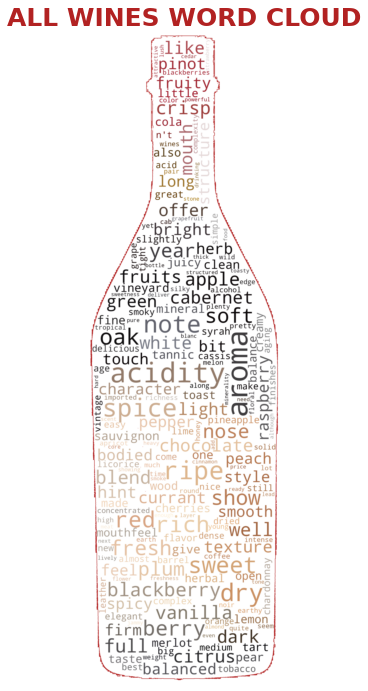

In [9]:
#MASK IMAGE
bottle = np.array(Image.open('./images/bottle.png'))

wordcloud = WordCloud(stopwords=stopwords_list,
                      collocations=False,
                     background_color = 'white',
                     mask=bottle,
                      contour_width=2,
                      contour_color='firebrick')

#GENERATE WORD CLOUD
wordcloud.generate(','.join(stopped_tokens))

#STORE TO FILE
wordcloud.to_file('./images/bottle_wc.png')

#CREATE COLORING FROM IMAGE
image_colors = ImageColorGenerator(bottle)


#PLOTTING
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.title('ALL WINES WORD CLOUD',fontdict = {'fontsize':25,'fontweight':'bold','color':'firebrick'})


plt.show()

In [10]:
#TOKENIZING WORDS FROM VERY GOOD WINES
df_vg = df[df['points'] == 'VERY GOOD']
corpus_vg = df_vg['description'].to_list()
tokens_vg = word_tokenize(','.join(corpus_vg))
stopped_tokens_vg= [w.lower() for w in tokens_vg if w.lower() not in stopwords_list]


#TOKENIZING WORDS FROM NOT RECOMMENDED WINES
df_nr = df[df['points'] == 'NOT RECOMMENDED']
corpus_nr = df_nr['description'].to_list()
tokens_nr = word_tokenize(','.join(corpus_nr))
stopped_tokens_nr= [w.lower() for w in tokens_nr if w.lower() not in stopwords_list]

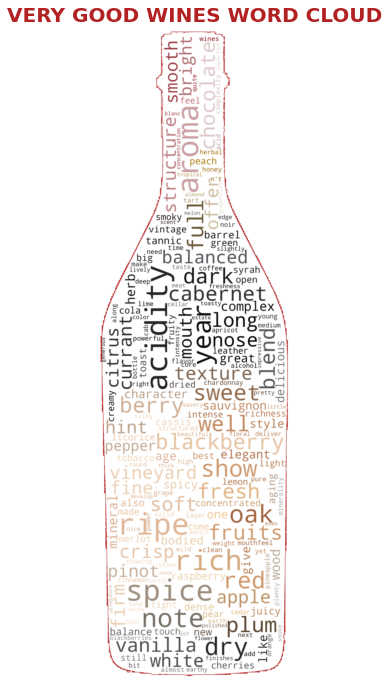

In [11]:
#CREATING WORD CLOUDS FOR VERY GOOD WINES
wordcloud.generate(','.join(stopped_tokens_vg))

#STORE TO FILE
wordcloud.to_file('./images/bottle_vg.png')

#CREATE COLORING FROM IMAGE
image_colors = ImageColorGenerator(bottle)


#PLOTTING
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.title('VERY GOOD WINES WORD CLOUD',fontdict = {'fontsize':20,'fontweight':'bold','color':'firebrick'})


plt.show()

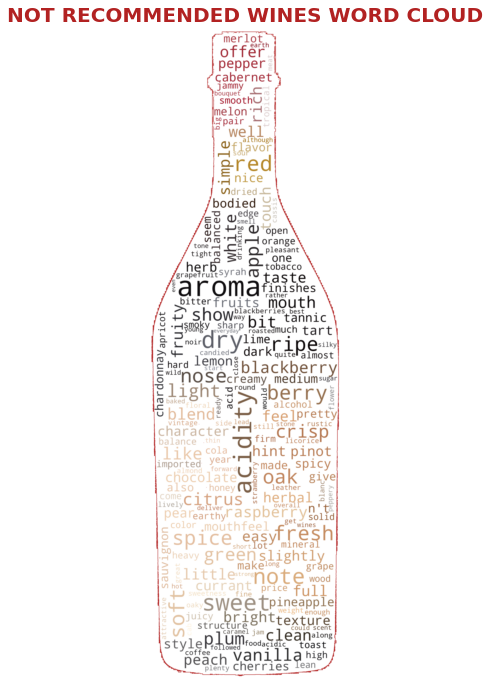

In [12]:
#CREATING WORD CLOUDS FOR NOT RECOMMENDED WINES
wordcloud.generate(','.join(stopped_tokens_nr))

#STORE TO FILE
wordcloud.to_file('./images/bottle_nr.png')

#CREATE COLORING FROM IMAGE
image_colors = ImageColorGenerator(bottle)


#PLOTTING
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.title('NOT RECOMMENDED WINES WORD CLOUD',fontdict = {'fontsize':20,'fontweight':'bold','color':'firebrick'})


plt.show()

## Bigrams

In [13]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
text_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)
review_scored = text_finder.score_ngrams(bigram_measures.raw_freq)

In [14]:
#MAKE DATA FRAME FROM BIGRAMS
pd.DataFrame(review_scored, columns=["Word","Freq"]).head(20)

Word      Freq
0   (cabernet, sauvignon)  0.001358
1           (pinot, noir)  0.001204
2      (sauvignon, blanc)  0.000761
3        (crisp, acidity)  0.000667
4          (green, apple)  0.000642
5               ('s, dry)  0.000635
6        (barrel, sample)  0.000587
7            (red, berry)  0.000561
8       (cabernet, franc)  0.000506
9       (dark, chocolate)  0.000494
10             (new, oak)  0.000476
11        (white, pepper)  0.000468
12           (smoky, oak)  0.000450
13          (red, fruits)  0.000441
14      (buttered, toast)  0.000440
15        (berry, fruits)  0.000435
16          (wild, berry)  0.000429
17             ('s, also)  0.000425
18        (berry, aromas)  0.000414
19           (winery, 's)  0.000397

# MODEL

## Creating Function to Evaluate Random Forest Model

In [16]:
#CREATING FUNCTION TO EVALUATE MODELS

def model_eval(model,X_train,y_train,X_test,y_test,classes=None,
                           normalize='true',cmap='Blues',label=''):

#         """Function with PEP 484 type annotations.

#         Args:
#             model: The Model Classifier.
#             X_train: X_train being used to fit model (could be scaled or not).
#             y_train: y_train being used to fit model and to get train accuracy.
#             X_test: X_test to get test predictions.
#             y_test: y_test used to get test accuracy
#             classes: Class labels
#             normalize: set to true
#             cmap: Color scheme for Confusion Matrix. Set to Blues
#             label: Confusion Matrix Label

#         Returns:
#             Model Accuracy. Confusion Matrix, ROC Curve, and best params for GridSearch

#     """
    
    
    #FITTING MODEL WITH TRAIN DATA
    model.fit(X_train,y_train)   
      
    #GETTING TRAIN PREDICTIONS
    y_hat_train = model.predict(X_train)
    
    #GETING TEST PREDICTIONS
    y_hat_test = model.predict(X_test)
    
    dashes = '---'*20
    
    if isinstance(model,GridSearchCV):
        grid_header = "GRID SEARCH FOUND THE FOLLOWING OPTIMAL PARAMETERS: "
        print(dashes,grid_header,dashes,sep='\n')
        best_parameters = model.best_params_
        for param_name in sorted(best_parameters.keys()):
            print("%s: %r" % (param_name, best_parameters[param_name]))
    
    #GETTING ACCURACY SCORE FOR TRAIN AND TEST
    
    if len(label)>0:
        accuracy_header = f'{label} ACCURACY'
    else:
        accuracy_header = 'MODEL ACCURACY'
    print(dashes,accuracy_header,dashes,sep='\n')
    training_accuracy = accuracy_score(y_train, y_hat_train)
    testing_accuracy = accuracy_score(y_test, y_hat_test)
    
    print(f'TRAINING ACCURACY: {round(training_accuracy*100,2)}%')
    print(f'TESTING ACCURACY: {round(testing_accuracy*100,2)}%')
          
    #CLASSIFICATION REPORT AND SCORES
    test_header = "CLASSIFICATION REPORT"
    
    #ADDING LABEL IF GIVEN
    if len(label)>0:
        test_header += f" USING {label}"
    
    # PRINT CLASSIFICATION REPORT
    
    print(dashes,test_header,dashes,sep='\n')

    print(metrics.classification_report(y_test,y_hat_test,
                                    target_names=classes))

    print(dashes+"\n\n")
    
    

    # MAKE FIGURE
    fig, axes = plt.subplots(figsize=(10,10),ncols=1)
   

    # PLOTTING CONFUSION MATRIX 
    if isinstance(model,GridSearchCV):
        metrics.plot_confusion_matrix(model.best_estimator_, X_test,y_test,
                                      display_labels=classes,
                                      normalize=normalize,
                                     cmap=cmap,ax=axes,xticks_rotation=45)
        axes.set(title='Confusion Matrix')
    else:
        metrics.plot_confusion_matrix(model, X_test,y_test,
                                      display_labels=classes,
                                      normalize=normalize,
                                     cmap=cmap,ax=axes,xticks_rotation=45)
        axes.set(title='Confusion Matrix')
    
    fig.tight_layout()
    plt.show()   

## Getting Data Ready to Model

In [17]:
#DEFINING Y (TARGET) AND X VARIABLES
y = df['points'].copy()
X=df['description'].copy()
X

0         This tremendous 100% varietal wine hails from ...
1         Ripe aromas of fig, blackberry and cassis are ...
2         Mac Watson honors the memory of a wine once ma...
3         This spent 20 months in 30% new French oak, an...
4         This is the top wine from La Bégude, named aft...
                                ...                        
150925    Many people feel Fiano represents southern Ita...
150926    Offers an intriguing nose with ginger, lime an...
150927    This classic example comes from a cru vineyard...
150928    A perfect salmon shade, with scents of peaches...
150929    More Pinot Grigios should taste like this. A r...
Name: description, Length: 150930, dtype: object

In [18]:
#TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=69)

In [19]:
# CHECKING Y_TRAIN AND Y_TEST VALUE COUNTS TO SEE IF IT MATCHES THE DF DISTRIBUTION

print(f'y_train value counts: \n {y_train.value_counts(normalize = True)}')
print('\n')
print(f'y_test value counts: \n {y_test.value_counts(normalize = True)}')

y_train value counts: 
 VERY GOOD          0.524192
NOT RECOMMENDED    0.475808
Name: points, dtype: float64


y_test value counts: 
 VERY GOOD          0.520407
NOT RECOMMENDED    0.479593
Name: points, dtype: float64


In [20]:
#MAKE TFIDFVECTORIZER USING STOPWORDS_LIST
vectorizer = TfidfVectorizer(tokenizer = word_tokenize,stop_words=stopwords_list)

# VECTORIZE DATA AND MAKE X_train_tfidf and X_test_tfidf
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_train_tfidf

<120744x41370 sparse matrix of type '<class 'numpy.float64'>'
	with 2620929 stored elements in Compressed Sparse Row format>

In [21]:
#CHECKING LENGTH OF VECTORIZER VOCABULARY
print (len(vectorizer.vocabulary_))

41370


## Evaluating Random Forest Model

In [22]:
#INITIALIZING CLASSIFIER
rf = RandomForestClassifier(class_weight='balanced',
                            max_depth=18,
                            n_estimators=250)

------------------------------------------------------------
MODEL ACCURACY
------------------------------------------------------------
TRAINING ACCURACY: 83.07%
TESTING ACCURACY: 80.78%
------------------------------------------------------------
CLASSIFICATION REPORT
------------------------------------------------------------
                 precision    recall  f1-score   support

NOT RECOMMENDED       0.79      0.82      0.80     14477
      VERY GOOD       0.83      0.79      0.81     15709

       accuracy                           0.81     30186
      macro avg       0.81      0.81      0.81     30186
   weighted avg       0.81      0.81      0.81     30186

------------------------------------------------------------




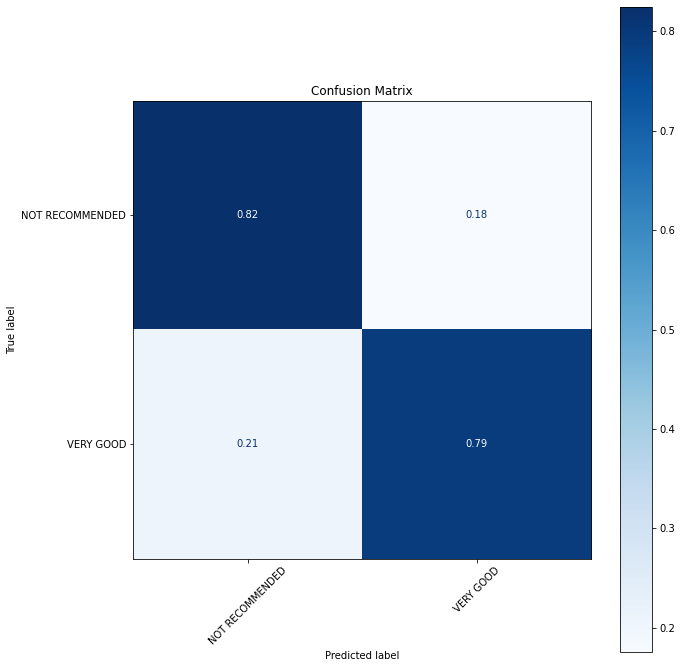

In [23]:
#EVALUATING MODEL USING FUNCTION
model_eval(rf,X_train_tfidf,y_train,X_test_tfidf,y_test)

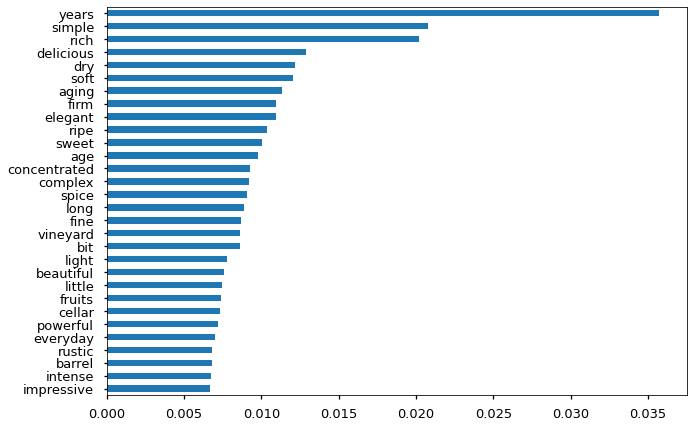

In [24]:
# PLOTTING 30 MOST IMPORTANT FEATURES
with plt.style.context('seaborn-talk'):

    #GETTING FEATURE IMPORTANCE
    importance = pd.Series(rf.feature_importances_,index=vectorizer.get_feature_names())

    # SORTING VALUES AND CREATING A BAR CHART WITH 30 MOST IMPORTANT
    importance.sort_values().tail(30).plot(kind='barh')

## Using LIME Text Explainer

In [25]:
#CREATING A PIPELINE TO GET PROBABILITIES
c = make_pipeline(vectorizer, rf)

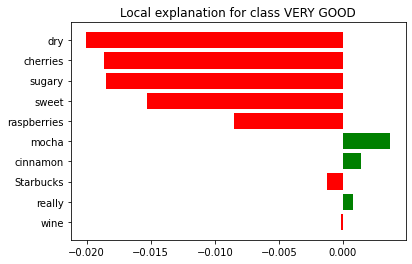

In [26]:
# INITIALIZING LIME
class_names = ['NOT RECOMMENDED', 'VERY GOOD']
explainer = LimeTextExplainer(class_names=class_names)
exp = explainer.explain_instance(X_test.iloc[1], c.predict_proba)

fig = exp.as_pyplot_figure()
exp.show_in_notebook()

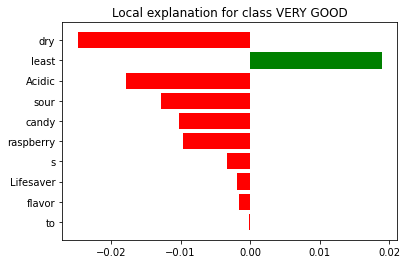

In [27]:
exp = explainer.explain_instance(X_test.iloc[47], c.predict_proba)

fig = exp.as_pyplot_figure()
exp.show_in_notebook()

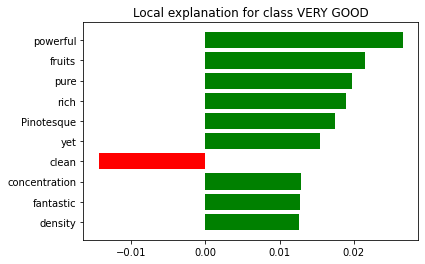

In [28]:
exp = explainer.explain_instance(X_test.iloc[7], c.predict_proba)

fig = exp.as_pyplot_figure()
exp.show_in_notebook()

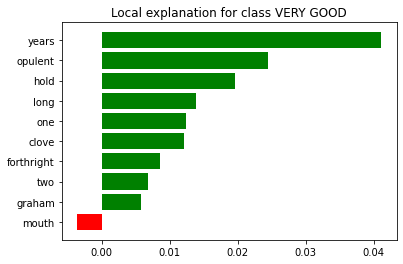

In [29]:
exp = explainer.explain_instance(X_test.iloc[38], c.predict_proba)

fig = exp.as_pyplot_figure()
exp.show_in_notebook()

## Grid Search

### CREATING A PIPELINE FOR GRIDSEARCH

In [30]:
#CREATING A PIPELINE
count_vect = CountVectorizer()
tf_transform = TfidfTransformer(use_idf=True)
lemmatizer = WordNetLemmatizer()
tokenizer = nltk.TweetTokenizer(preserve_case=False)

text_pipe = Pipeline(steps=[                       
    ('count_vectorizer',count_vect),
    ('tf_transformer',tf_transform)])

full_pipe = Pipeline(steps=[
    ('text_pipe',text_pipe),
    ('clf',RandomForestClassifier(class_weight='balanced',max_depth=18))
])
full_pipe

Pipeline(steps=[('text_pipe',
                 Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                                 ('tf_transformer', TfidfTransformer())])),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        max_depth=18))])

In [31]:
#CREATING PARAMETERS DICTIONARY FOR PIPELINE GRIDSEARCH
params = {'text_pipe__tf_transformer__use_idf':[True, False],
         'text_pipe__count_vectorizer__tokenizer':[None,tokenizer.tokenize],
          'text_pipe__count_vectorizer__preprocessor':[None,lemmatizer.lemmatize],
         'text_pipe__count_vectorizer__stop_words':[None,stopwords_list],
         'clf__criterion':['gini', 'entropy']}

### EVALUATING GRIDSEARCH

In [32]:
#INITIALIZING GRIDSEARCHCV
grid = GridSearchCV(full_pipe,params,cv=3,)

In [33]:
# #EVALUATING GRIDSEARCH MODEL
# model_eval(grid,X_train_tfidf,y_train,X_test_tfidf,y_test)

## DEEP NLP

### RNN Using Word Embeddings, Gated Recurrent Units, and Long Short Term Memory Cells

<font size = 3> **RECURRING NEURAL NETWORKS**</font>
- **Recurrent Neural Networks** are used to evaluate Sequences of data, rather than just individual data points. All text data is sequence data by default; a letter only makes sense when it's words are in the proper order. RNNs excel at NLP tasks, because they can take in text as full sequences of words, from a single sentence up to an entire document or book! Because of this, they do not suffer the same loss of information that comes from a traditional Bag-of-Words vectorization approach.

![graph2](./images/unrolled.gif)

<font size = 3> **WORD EMBEDDINGS**</font>

- **Word Embeddings** are a type of vectorization strategy that computes word vectors from a text corpus by training a neural network, which results in a high-dimensional embedding space, where each word in the corpus is a unique vector in that space. In this embedding space, the position of the vector relative to the other vectors captures semantic meaning. RNN can use word embeddings by creating an empty embedding layer at the beginning of the sequential model, by using a pre-trained **Word 2 Vec** word embedding from your own dataset, or by using **GloVe**, which is a pre-trained word embedding from a large data bank, such as Wikipedia.
![graph3](./images/embeddings.png)

<br>

<font size = 3> **GATED RECURRENT UNITS**</font>
- **Gated Recurrent Units**, or **GRUs**, are a special type of cell that passes along it's internal state at each time step. However, not every part of the internal state is passed along, but only the important stuff! GRUs make use of two "gate" functions: a **Reset Gate**, which determines what should be removed from the cell's internal state before passing itself along to the next time step, and an **Update Gate**, which determines how much of the state from the previous time step should be used in the current time step.

<img src="./images/new_gru.png" alt="drawing" style="width:400px;"/>

<font size = 3> **LONG SHORT TERM MEMORY CELLS**</font>

- **Long Short Term Memory Cells**, or **LSTMs**, are a sort of specialized neurons for use in RNNs that are able to effectively learn what to remember and what to forget in sequence models.

- LSTMs are generally like GRUs, except that they use three gates instead of two. LSTMs have:

 - an **Input Gate**, which determines how much of the cell state that was passed along should be kept
 - a **Forget Gate**, which determines how much of the current state should be forgotten
 - an **Output Gate**, which determines how much of the current state should be exposed to the next layers in the network
 
 ![graph5](./images/new_LSTM3_chain.png)
 
 <font size = 1> **Information taken from Flatiron School DEEP NLP Section.**</font>

### Deep NLP Evaluation Function

In [34]:
#CREATING MODEL EVALUATION FUNCTION FOR DEEP NLP

def model_eval_2(y_test,y_hat_test, normalize='true',cmap='Blues',label='MODEL',
                           title='Confusion matrix',classes= [0,1]):

#         """Function with PEP 484 type annotations.

#         Args:
#             model: The Model Classifier.
#             X_train: X_train being used to fit model (could be scaled or not).
#             y_train: y_train being used to fit model and to get train accuracy.
#             X_test: X_test to get test predictions.
#             y_test: y_test used to get test accuracy
#             classes: Class labels
#             normalize: set to true
#             cmap: Color scheme for Confusion Matrix. Set to Blues
#             label: Confusion Matrix Label

#         Returns:
#             Model Accuracy. Confusion Matrix, ROC Curve, and best params for GridSearch

#     """
    
    dashes = '---'*20

    #GETTING ACCURACY SCORE FOR TRAIN AND TEST    
    accuracy_header = f'{label} ACCURACY'
    print(dashes,accuracy_header,dashes,sep='\n')
    testing_accuracy = accuracy_score(y_test, y_hat_test)
    
    print(f'TESTING ACCURACY: {round(testing_accuracy*100,2)}%')
          
        
    #CLASSIFICATION REPORT AND SCORES
    test_header = f"{label} CLASSIFICATION REPORT"
    
    
    # PRINT CLASSIFICATION REPORT    
    print(dashes,test_header,dashes,sep='\n')

    print(metrics.classification_report(y_test,y_hat_test,
                                    target_names=classes))

    print(dashes+"\n\n")
        
        
    # MAKE FIGURE
    fig, axes = plt.subplots(figsize=(15,5),ncols=3)      
   

    # PLOTTING CONFUSION MATRIX 

    cm = confusion_matrix(y_true=y_test, y_pred=y_hat_test,normalize=normalize)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(ax=axes[2])
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],2),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    #PLOTTING  LOSS VS. VAL_LOSS AND ACCURACY VS. VAL_ACCURACY
    history_df = pd.DataFrame(history.history)

    loss_df = history_df[[col for col in history_df.columns if 'loss' in col]]
    loss_df = loss_df.reset_index()
    
    acc_df = history_df[[col for col in history_df.columns if 'acc' in col]]
    acc_df = acc_df.reset_index()
    
    sns.lineplot(x='index',y='val_loss',data=loss_df,marker='o',ax=axes[0],label='val_loss')
    sns.lineplot(x='index',y='loss',data=loss_df,marker='o',ax=axes[0],label='train_loss')
    axes[0].set_title('Training Loss vs. Validation Loss')
    axes[0].set_ylabel('Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(loc="upper right")
    
    sns.lineplot(x='index',y='val_accuracy',data=acc_df,marker='o',ax=axes[1],label= 'val_accuracy')
    sns.lineplot(x='index',y='accuracy',data=acc_df,marker='o',ax=axes[1],label= 'train_accuracy')
    axes[1].set_title('Training Accuracy vs. Validation Accuracy')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[0].legend(loc="upper right")
    
    fig.tight_layout()
    plt.show()

   

### Training Word 2 Vec

In [35]:
#TRAINING WORD2VEC FROM FULL DF AND APPLYING SIMPLE PREPROCESSING
lower_df=df['description'].map(lambda x: simple_preprocess(x.lower(),deacc=True,
                                                         max_len=200))

print(df['description'][0])
print('/n')
print(lower_df[0])

This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.
/n
['this', 'tremendous', 'varietal', 'wine', 'hails', 'from', 'oakville', 'and', 'was', 'aged', 'over', 'three', 'years', 'in', 'oak', 'juicy', 'red', 'cherry', 'fruit', 'and', 'compelling', 'hint', 'of', 'caramel', 'greet', 'the', 'palate', 'framed', 'by', 'elegant', 'fine', 'tannins', 'and', 'subtle', 'minty', 'tone', 'in', 'the', 'background', 'balanced', 'and', 'rewarding', 'from', 'start', 'to', 'finish', 'it', 'has', 'years', 'ahead', 'of', 'it', 'to', 'develop', 'further', 'nuance', 'enjoy']


In [36]:
#INITIALIZING W2V MODEL
wv_model = Word2Vec(lower_df,size=128,window=6,min_count=1)

#TRAINING W2V MODEL
wv_model.train(lower_df,total_examples=wv_model.corpus_count,epochs=100)

W0131 20:59:31.277364 15844 base_any2vec.py:1168] Effective 'alpha' higher than previous training cycles


(429802469, 588305500)

In [37]:
#GET KEYED VECTOR
wv=wv_model.wv
wv

In [38]:
#CHECKING THE VECTOR OF THE WORD FLAVOR
wv['flavor']

array([ 2.05229545e+00,  3.27248502e+00,  3.32588840e+00,  4.59099483e+00,
       -1.38386941e+00, -5.61049366e+00,  2.76616025e+00, -3.01950669e+00,
       -4.71358442e+00, -1.63842022e+00, -6.27478838e-01, -2.05108976e+00,
        1.12649553e-01,  1.83026719e+00, -2.31930542e+00,  3.10475636e+00,
       -1.24903016e-01, -4.00166363e-01,  1.12854421e+00, -2.84072304e+00,
        1.53446329e+00, -7.00438559e-01,  2.53172445e+00, -7.88176239e-01,
       -2.82799274e-01, -3.57135248e+00, -4.02676076e-01, -5.42629957e+00,
       -2.16712999e+00,  1.73395324e+00,  4.46730137e+00, -2.43780923e+00,
       -2.47102284e+00, -7.27855086e-01, -5.04171252e-01, -2.54832101e+00,
        1.62386870e+00, -1.80408478e+00,  1.03830453e-02,  1.60977471e+00,
        1.39881837e+00, -9.78956282e-01,  3.24131846e+00, -3.08487272e+00,
       -9.80616510e-01,  5.58011949e-01,  1.00746524e+00,  3.27584386e+00,
        3.70507383e+00, -3.24954677e+00, -3.20110738e-01, -6.29865050e-01,
       -4.15624428e+00, -

In [39]:
#CHECKING THE LENGTH OF W2V VOCAB
len(wv.vocab)

29870

In [40]:
#CHECKING IF W2V LEARNED THE PROPER MEANING OF WORDS
wv.most_similar('fruity')

[('fruited', 0.49810194969177246),
 ('perfumed', 0.4852205216884613),
 ('flavored', 0.47741806507110596),
 ('fruitiness', 0.44886332750320435),
 ('juicy', 0.44788122177124023),
 ('fragrant', 0.4076288044452667),
 ('extravagant', 0.40323543548583984),
 ('superfruity', 0.3996756076812744),
 ('attractive', 0.3857845962047577),
 ('herbaceous', 0.3810972571372986)]

### Getting Ready to Model

In [41]:
y = df['points'].replace({'NOT RECOMMENDED':0,
                          'VERY GOOD':1})
X=df['description'].copy()

In [42]:
#TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=69)

In [43]:
#CREATING CLASS WEIGHTS TO BE USED IN DEEP NLP MODEL
weights = compute_class_weight('balanced',np.unique(y_train),y_train)

weights_dict = dict(zip(np.unique(y_train),weights))
weights_dict

{0: 1.0508433273572262, 1: 0.9538495568230294}

In [44]:
#ONE HOT ENCODE
y_train_seq=to_categorical(y_train)
y_test_seq=to_categorical(y_test)

print(f'y_train shape: {y_train_seq.shape}')
y_test_seq

y_train shape: (120744, 2)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [45]:
#TOKENIZE TEXT
MAX_WORDS=20000
tokenizer = text.Tokenizer(num_words = MAX_WORDS)
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

#FIND LONGEST SEQUENCE
MAX_SEQUENCE_LENGTH= max(list(map(lambda x:len(x),[*train_sequences,*test_sequences])))
MAX_SEQUENCE_LENGTH

136

In [46]:
X_train_seq = sequence.pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH)
X_test_seq = sequence.pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH)

X_train_seq

array([[   0,    0,    0, ..., 5086,    8, 1862],
       [   0,    0,    0, ...,    1,   33,    9],
       [   0,    0,    0, ...,    1,   80,  664],
       ...,
       [   0,    0,    0, ...,    1,   93,   22],
       [   0,    0,    0, ...,    3,  542,  185],
       [   0,    0,    0, ...,    1, 1595,   18]])

In [47]:
len(tokenizer.index_word)

34861

In [48]:
#GOT FROM JAMES IRVING
def get_earlystop(monitor='val_loss',patience=4, restore_best_weights=True):
    """"""""
    args = locals()
    return EarlyStopping(**args)

### Model with Regular Embeddings using LSTM layer

In [49]:
def make_model(EMBEDDING_SIZE=136):
    model=Sequential()
    
    model.add(Embedding(MAX_WORDS,EMBEDDING_SIZE))    
    model.add(LSTM(32,return_sequences=False,recurrent_dropout=0.5))
    model.add(Dropout(0.5))
    model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(),kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    

    model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
    display(model.summary())
    
    return model

model = make_model()

history = model.fit(X_train_seq, y_train_seq, epochs=20,batch_size=64, 
                    validation_split = 0.2, callbacks=get_earlystop(),
                   class_weight=weights_dict,
                    workers=3)

y_hat_test = model.predict(X_test_seq).argmax(axis=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 136)         2720000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                21632     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
Total params: 2,742,194
Trainable params: 2,742,194
Non-trainable params: 0
______________________________________________

None

Epoch 1/20


 185/1510 [==>...........................] - ETA: 0s - loss: 0.7159 - accuracy: 0.51 - ETA: 1:51 - loss: 0.7174 - accuracy: 0.50 - ETA: 2:12 - loss: 0.7212 - accuracy: 0.48 - ETA: 2:19 - loss: 0.7199 - accuracy: 0.50 - ETA: 2:24 - loss: 0.7185 - accuracy: 0.51 - ETA: 2:27 - loss: 0.7172 - accuracy: 0.50 - ETA: 2:29 - loss: 0.7156 - accuracy: 0.51 - ETA: 2:31 - loss: 0.7150 - accuracy: 0.50 - ETA: 2:32 - loss: 0.7160 - accuracy: 0.48 - ETA: 2:33 - loss: 0.7164 - accuracy: 0.49 - ETA: 2:34 - loss: 0.7164 - accuracy: 0.49 - ETA: 2:35 - loss: 0.7166 - accuracy: 0.49 - ETA: 2:35 - loss: 0.7161 - accuracy: 0.50 - ETA: 2:35 - loss: 0.7158 - accuracy: 0.50 - ETA: 2:36 - loss: 0.7154 - accuracy: 0.50 - ETA: 2:35 - loss: 0.7150 - accuracy: 0.49 - ETA: 2:35 - loss: 0.7149 - accuracy: 0.49 - ETA: 2:36 - loss: 0.7146 - accuracy: 0.49 - ETA: 2:36 - loss: 0.7141 - accuracy: 0.50 - ETA: 2:36 - loss: 0.7139 - accuracy: 0.50 - ETA: 2:37 - loss: 0.7136 - accuracy: 0.50 - ETA: 2:37 - loss: 0.7133 - accura

 371/1510 [======>.......................] - ETA: 2:31 - loss: 0.5580 - accuracy: 0.72 - ETA: 2:31 - loss: 0.5578 - accuracy: 0.72 - ETA: 2:31 - loss: 0.5574 - accuracy: 0.72 - ETA: 2:30 - loss: 0.5570 - accuracy: 0.72 - ETA: 2:30 - loss: 0.5560 - accuracy: 0.72 - ETA: 2:30 - loss: 0.5559 - accuracy: 0.72 - ETA: 2:30 - loss: 0.5557 - accuracy: 0.72 - ETA: 2:30 - loss: 0.5548 - accuracy: 0.72 - ETA: 2:30 - loss: 0.5538 - accuracy: 0.72 - ETA: 2:30 - loss: 0.5532 - accuracy: 0.73 - ETA: 2:30 - loss: 0.5528 - accuracy: 0.73 - ETA: 2:30 - loss: 0.5519 - accuracy: 0.73 - ETA: 2:29 - loss: 0.5520 - accuracy: 0.73 - ETA: 2:29 - loss: 0.5522 - accuracy: 0.73 - ETA: 2:29 - loss: 0.5514 - accuracy: 0.73 - ETA: 2:29 - loss: 0.5507 - accuracy: 0.73 - ETA: 2:29 - loss: 0.5511 - accuracy: 0.73 - ETA: 2:29 - loss: 0.5509 - accuracy: 0.73 - ETA: 2:29 - loss: 0.5507 - accuracy: 0.73 - ETA: 2:29 - loss: 0.5505 - accuracy: 0.73 - ETA: 2:28 - loss: 0.5498 - accuracy: 0.73 - ETA: 2:28 - loss: 0.5487 - accu

 557/1510 [==========>...................] - ETA: 2:09 - loss: 0.4973 - accuracy: 0.77 - ETA: 2:09 - loss: 0.4973 - accuracy: 0.77 - ETA: 2:09 - loss: 0.4972 - accuracy: 0.77 - ETA: 2:09 - loss: 0.4968 - accuracy: 0.77 - ETA: 2:09 - loss: 0.4967 - accuracy: 0.77 - ETA: 2:08 - loss: 0.4964 - accuracy: 0.77 - ETA: 2:08 - loss: 0.4964 - accuracy: 0.77 - ETA: 2:08 - loss: 0.4962 - accuracy: 0.77 - ETA: 2:08 - loss: 0.4962 - accuracy: 0.77 - ETA: 2:08 - loss: 0.4960 - accuracy: 0.77 - ETA: 2:08 - loss: 0.4960 - accuracy: 0.77 - ETA: 2:08 - loss: 0.4955 - accuracy: 0.77 - ETA: 2:08 - loss: 0.4952 - accuracy: 0.77 - ETA: 2:08 - loss: 0.4950 - accuracy: 0.77 - ETA: 2:07 - loss: 0.4949 - accuracy: 0.77 - ETA: 2:07 - loss: 0.4949 - accuracy: 0.77 - ETA: 2:07 - loss: 0.4945 - accuracy: 0.77 - ETA: 2:07 - loss: 0.4942 - accuracy: 0.77 - ETA: 2:07 - loss: 0.4941 - accuracy: 0.77 - ETA: 2:07 - loss: 0.4938 - accuracy: 0.77 - ETA: 2:07 - loss: 0.4935 - accuracy: 0.77 - ETA: 2:07 - loss: 0.4937 - accu

 743/1510 [=============>................] - ETA: 1:48 - loss: 0.4707 - accuracy: 0.78 - ETA: 1:48 - loss: 0.4704 - accuracy: 0.78 - ETA: 1:48 - loss: 0.4702 - accuracy: 0.78 - ETA: 1:47 - loss: 0.4700 - accuracy: 0.78 - ETA: 1:47 - loss: 0.4700 - accuracy: 0.78 - ETA: 1:47 - loss: 0.4700 - accuracy: 0.78 - ETA: 1:47 - loss: 0.4700 - accuracy: 0.78 - ETA: 1:47 - loss: 0.4698 - accuracy: 0.79 - ETA: 1:47 - loss: 0.4697 - accuracy: 0.79 - ETA: 1:47 - loss: 0.4693 - accuracy: 0.79 - ETA: 1:47 - loss: 0.4692 - accuracy: 0.79 - ETA: 1:47 - loss: 0.4692 - accuracy: 0.79 - ETA: 1:46 - loss: 0.4691 - accuracy: 0.79 - ETA: 1:46 - loss: 0.4689 - accuracy: 0.79 - ETA: 1:46 - loss: 0.4688 - accuracy: 0.79 - ETA: 1:46 - loss: 0.4687 - accuracy: 0.79 - ETA: 1:46 - loss: 0.4685 - accuracy: 0.79 - ETA: 1:46 - loss: 0.4682 - accuracy: 0.79 - ETA: 1:46 - loss: 0.4680 - accuracy: 0.79 - ETA: 1:46 - loss: 0.4679 - accuracy: 0.79 - ETA: 1:45 - loss: 0.4679 - accuracy: 0.79 - ETA: 1:45 - loss: 0.4677 - accu

 929/1510 [=================>............] - ETA: 1:27 - loss: 0.4519 - accuracy: 0.79 - ETA: 1:26 - loss: 0.4518 - accuracy: 0.79 - ETA: 1:26 - loss: 0.4518 - accuracy: 0.79 - ETA: 1:26 - loss: 0.4518 - accuracy: 0.79 - ETA: 1:26 - loss: 0.4518 - accuracy: 0.79 - ETA: 1:26 - loss: 0.4517 - accuracy: 0.80 - ETA: 1:26 - loss: 0.4516 - accuracy: 0.80 - ETA: 1:26 - loss: 0.4514 - accuracy: 0.80 - ETA: 1:26 - loss: 0.4515 - accuracy: 0.80 - ETA: 1:26 - loss: 0.4514 - accuracy: 0.80 - ETA: 1:25 - loss: 0.4513 - accuracy: 0.80 - ETA: 1:25 - loss: 0.4513 - accuracy: 0.80 - ETA: 1:25 - loss: 0.4512 - accuracy: 0.80 - ETA: 1:25 - loss: 0.4511 - accuracy: 0.80 - ETA: 1:25 - loss: 0.4510 - accuracy: 0.80 - ETA: 1:25 - loss: 0.4509 - accuracy: 0.80 - ETA: 1:25 - loss: 0.4508 - accuracy: 0.80 - ETA: 1:25 - loss: 0.4506 - accuracy: 0.80 - ETA: 1:25 - loss: 0.4505 - accuracy: 0.80 - ETA: 1:24 - loss: 0.4503 - accuracy: 0.80 - ETA: 1:24 - loss: 0.4503 - accuracy: 0.80 - ETA: 1:24 - loss: 0.4502 - accu

1115/1510 [=====================>........] - ETA: 1:06 - loss: 0.4395 - accuracy: 0.80 - ETA: 1:05 - loss: 0.4393 - accuracy: 0.80 - ETA: 1:05 - loss: 0.4393 - accuracy: 0.80 - ETA: 1:05 - loss: 0.4392 - accuracy: 0.80 - ETA: 1:05 - loss: 0.4391 - accuracy: 0.80 - ETA: 1:05 - loss: 0.4390 - accuracy: 0.80 - ETA: 1:05 - loss: 0.4391 - accuracy: 0.80 - ETA: 1:05 - loss: 0.4390 - accuracy: 0.80 - ETA: 1:05 - loss: 0.4389 - accuracy: 0.80 - ETA: 1:05 - loss: 0.4387 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4385 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4384 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4384 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4382 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4380 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4380 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4378 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4376 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4376 - accuracy: 0.80 - ETA: 1:03 - loss: 0.4375 - accuracy: 0.80 - ETA: 1:03 - loss: 0.4374 - accuracy: 0.80 - ETA: 1:03 - loss: 0.4375 - accu

1301/1510 [========================>.....] - ETA: 45s - loss: 0.4287 - accuracy: 0.813 - ETA: 45s - loss: 0.4286 - accuracy: 0.813 - ETA: 44s - loss: 0.4285 - accuracy: 0.813 - ETA: 44s - loss: 0.4284 - accuracy: 0.813 - ETA: 44s - loss: 0.4283 - accuracy: 0.813 - ETA: 44s - loss: 0.4282 - accuracy: 0.813 - ETA: 44s - loss: 0.4282 - accuracy: 0.813 - ETA: 44s - loss: 0.4281 - accuracy: 0.813 - ETA: 44s - loss: 0.4281 - accuracy: 0.813 - ETA: 44s - loss: 0.4280 - accuracy: 0.813 - ETA: 44s - loss: 0.4279 - accuracy: 0.813 - ETA: 43s - loss: 0.4278 - accuracy: 0.813 - ETA: 43s - loss: 0.4278 - accuracy: 0.813 - ETA: 43s - loss: 0.4277 - accuracy: 0.813 - ETA: 43s - loss: 0.4276 - accuracy: 0.813 - ETA: 43s - loss: 0.4275 - accuracy: 0.813 - ETA: 43s - loss: 0.4276 - accuracy: 0.813 - ETA: 43s - loss: 0.4275 - accuracy: 0.813 - ETA: 43s - loss: 0.4274 - accuracy: 0.813 - ETA: 43s - loss: 0.4274 - accuracy: 0.813 - ETA: 42s - loss: 0.4273 - accuracy: 0.813 - ETA: 42s - loss: 0.4271 - accur

1490/1510 [============================>.] - ETA: 24s - loss: 0.4210 - accuracy: 0.816 - ETA: 23s - loss: 0.4209 - accuracy: 0.816 - ETA: 23s - loss: 0.4209 - accuracy: 0.816 - ETA: 23s - loss: 0.4208 - accuracy: 0.817 - ETA: 23s - loss: 0.4207 - accuracy: 0.817 - ETA: 23s - loss: 0.4208 - accuracy: 0.816 - ETA: 23s - loss: 0.4208 - accuracy: 0.816 - ETA: 23s - loss: 0.4206 - accuracy: 0.817 - ETA: 23s - loss: 0.4205 - accuracy: 0.817 - ETA: 22s - loss: 0.4206 - accuracy: 0.817 - ETA: 22s - loss: 0.4208 - accuracy: 0.817 - ETA: 22s - loss: 0.4207 - accuracy: 0.817 - ETA: 22s - loss: 0.4207 - accuracy: 0.817 - ETA: 22s - loss: 0.4206 - accuracy: 0.817 - ETA: 22s - loss: 0.4205 - accuracy: 0.817 - ETA: 22s - loss: 0.4205 - accuracy: 0.817 - ETA: 22s - loss: 0.4205 - accuracy: 0.817 - ETA: 22s - loss: 0.4204 - accuracy: 0.817 - ETA: 21s - loss: 0.4204 - accuracy: 0.817 - ETA: 21s - loss: 0.4204 - accuracy: 0.817 - ETA: 21s - loss: 0.4203 - accuracy: 0.817 - ETA: 21s - loss: 0.4203 - accur

1510/1510 [==============================] - ETA: 2s - loss: 0.4136 - accuracy: 0.82 - ETA: 2s - loss: 0.4136 - accuracy: 0.82 - ETA: 1s - loss: 0.4135 - accuracy: 0.82 - ETA: 1s - loss: 0.4135 - accuracy: 0.82 - ETA: 1s - loss: 0.4134 - accuracy: 0.82 - ETA: 1s - loss: 0.4134 - accuracy: 0.82 - ETA: 1s - loss: 0.4133 - accuracy: 0.82 - ETA: 1s - loss: 0.4132 - accuracy: 0.82 - ETA: 1s - loss: 0.4132 - accuracy: 0.82 - ETA: 1s - loss: 0.4132 - accuracy: 0.82 - ETA: 1s - loss: 0.4132 - accuracy: 0.82 - ETA: 0s - loss: 0.4132 - accuracy: 0.82 - ETA: 0s - loss: 0.4131 - accuracy: 0.82 - ETA: 0s - loss: 0.4130 - accuracy: 0.82 - ETA: 0s - loss: 0.4130 - accuracy: 0.82 - ETA: 0s - loss: 0.4130 - accuracy: 0.82 - ETA: 0s - loss: 0.4130 - accuracy: 0.82 - ETA: 0s - loss: 0.4129 - accuracy: 0.82 - ETA: 0s - loss: 0.4130 - accuracy: 0.82 - ETA: 0s - loss: 0.4130 - accuracy: 0.82 - 181s 120ms/step - loss: 0.4130 - accuracy: 0.8203 - val_loss: 0.3466 - val_accuracy: 0.8432
Epoch 2/20


 186/1510 [==>...........................] - ETA: 0s - loss: 0.2554 - accuracy: 0.87 - ETA: 1:32 - loss: 0.2752 - accuracy: 0.86 - ETA: 1:59 - loss: 0.2997 - accuracy: 0.86 - ETA: 2:12 - loss: 0.3042 - accuracy: 0.86 - ETA: 2:19 - loss: 0.3173 - accuracy: 0.86 - ETA: 2:25 - loss: 0.2976 - accuracy: 0.88 - ETA: 2:29 - loss: 0.2918 - accuracy: 0.88 - ETA: 2:33 - loss: 0.2920 - accuracy: 0.88 - ETA: 2:35 - loss: 0.2981 - accuracy: 0.87 - ETA: 2:37 - loss: 0.2943 - accuracy: 0.87 - ETA: 2:38 - loss: 0.2952 - accuracy: 0.87 - ETA: 2:39 - loss: 0.2981 - accuracy: 0.87 - ETA: 2:39 - loss: 0.3093 - accuracy: 0.86 - ETA: 2:40 - loss: 0.3076 - accuracy: 0.86 - ETA: 2:40 - loss: 0.3158 - accuracy: 0.86 - ETA: 2:41 - loss: 0.3166 - accuracy: 0.86 - ETA: 2:42 - loss: 0.3141 - accuracy: 0.86 - ETA: 2:43 - loss: 0.3085 - accuracy: 0.86 - ETA: 2:43 - loss: 0.3067 - accuracy: 0.87 - ETA: 2:43 - loss: 0.3099 - accuracy: 0.86 - ETA: 2:43 - loss: 0.3062 - accuracy: 0.86 - ETA: 2:43 - loss: 0.3108 - accura

 372/1510 [======>.......................] - ETA: 2:38 - loss: 0.3160 - accuracy: 0.87 - ETA: 2:37 - loss: 0.3165 - accuracy: 0.87 - ETA: 2:37 - loss: 0.3162 - accuracy: 0.87 - ETA: 2:37 - loss: 0.3160 - accuracy: 0.87 - ETA: 2:37 - loss: 0.3158 - accuracy: 0.87 - ETA: 2:37 - loss: 0.3162 - accuracy: 0.87 - ETA: 2:37 - loss: 0.3162 - accuracy: 0.87 - ETA: 2:37 - loss: 0.3160 - accuracy: 0.87 - ETA: 2:37 - loss: 0.3159 - accuracy: 0.87 - ETA: 2:37 - loss: 0.3153 - accuracy: 0.87 - ETA: 2:36 - loss: 0.3147 - accuracy: 0.87 - ETA: 2:36 - loss: 0.3144 - accuracy: 0.87 - ETA: 2:36 - loss: 0.3147 - accuracy: 0.87 - ETA: 2:36 - loss: 0.3147 - accuracy: 0.87 - ETA: 2:36 - loss: 0.3149 - accuracy: 0.87 - ETA: 2:36 - loss: 0.3153 - accuracy: 0.87 - ETA: 2:35 - loss: 0.3149 - accuracy: 0.87 - ETA: 2:35 - loss: 0.3148 - accuracy: 0.87 - ETA: 2:35 - loss: 0.3152 - accuracy: 0.87 - ETA: 2:35 - loss: 0.3152 - accuracy: 0.87 - ETA: 2:35 - loss: 0.3149 - accuracy: 0.87 - ETA: 2:35 - loss: 0.3157 - accu

 558/1510 [==========>...................] - ETA: 2:14 - loss: 0.3175 - accuracy: 0.86 - ETA: 2:14 - loss: 0.3175 - accuracy: 0.86 - ETA: 2:14 - loss: 0.3173 - accuracy: 0.86 - ETA: 2:14 - loss: 0.3176 - accuracy: 0.86 - ETA: 2:14 - loss: 0.3178 - accuracy: 0.86 - ETA: 2:14 - loss: 0.3176 - accuracy: 0.86 - ETA: 2:14 - loss: 0.3176 - accuracy: 0.86 - ETA: 2:14 - loss: 0.3178 - accuracy: 0.86 - ETA: 2:13 - loss: 0.3178 - accuracy: 0.86 - ETA: 2:13 - loss: 0.3179 - accuracy: 0.86 - ETA: 2:13 - loss: 0.3179 - accuracy: 0.86 - ETA: 2:13 - loss: 0.3178 - accuracy: 0.86 - ETA: 2:13 - loss: 0.3178 - accuracy: 0.86 - ETA: 2:13 - loss: 0.3177 - accuracy: 0.86 - ETA: 2:13 - loss: 0.3176 - accuracy: 0.86 - ETA: 2:13 - loss: 0.3181 - accuracy: 0.86 - ETA: 2:12 - loss: 0.3180 - accuracy: 0.86 - ETA: 2:12 - loss: 0.3181 - accuracy: 0.86 - ETA: 2:12 - loss: 0.3182 - accuracy: 0.86 - ETA: 2:12 - loss: 0.3181 - accuracy: 0.86 - ETA: 2:12 - loss: 0.3183 - accuracy: 0.86 - ETA: 2:12 - loss: 0.3182 - accu

 744/1510 [=============>................] - ETA: 1:52 - loss: 0.3181 - accuracy: 0.86 - ETA: 1:52 - loss: 0.3181 - accuracy: 0.86 - ETA: 1:52 - loss: 0.3181 - accuracy: 0.86 - ETA: 1:52 - loss: 0.3182 - accuracy: 0.86 - ETA: 1:52 - loss: 0.3181 - accuracy: 0.86 - ETA: 1:52 - loss: 0.3180 - accuracy: 0.86 - ETA: 1:52 - loss: 0.3182 - accuracy: 0.86 - ETA: 1:52 - loss: 0.3183 - accuracy: 0.86 - ETA: 1:51 - loss: 0.3183 - accuracy: 0.86 - ETA: 1:51 - loss: 0.3182 - accuracy: 0.86 - ETA: 1:51 - loss: 0.3181 - accuracy: 0.86 - ETA: 1:51 - loss: 0.3181 - accuracy: 0.86 - ETA: 1:51 - loss: 0.3179 - accuracy: 0.86 - ETA: 1:51 - loss: 0.3178 - accuracy: 0.86 - ETA: 1:51 - loss: 0.3181 - accuracy: 0.86 - ETA: 1:51 - loss: 0.3180 - accuracy: 0.86 - ETA: 1:50 - loss: 0.3181 - accuracy: 0.86 - ETA: 1:50 - loss: 0.3180 - accuracy: 0.86 - ETA: 1:50 - loss: 0.3179 - accuracy: 0.86 - ETA: 1:50 - loss: 0.3178 - accuracy: 0.86 - ETA: 1:50 - loss: 0.3177 - accuracy: 0.86 - ETA: 1:50 - loss: 0.3176 - accu

 930/1510 [=================>............] - ETA: 1:30 - loss: 0.3208 - accuracy: 0.86 - ETA: 1:30 - loss: 0.3208 - accuracy: 0.86 - ETA: 1:30 - loss: 0.3208 - accuracy: 0.86 - ETA: 1:30 - loss: 0.3210 - accuracy: 0.86 - ETA: 1:30 - loss: 0.3209 - accuracy: 0.86 - ETA: 1:30 - loss: 0.3209 - accuracy: 0.86 - ETA: 1:30 - loss: 0.3207 - accuracy: 0.86 - ETA: 1:30 - loss: 0.3206 - accuracy: 0.86 - ETA: 1:29 - loss: 0.3207 - accuracy: 0.86 - ETA: 1:29 - loss: 0.3209 - accuracy: 0.86 - ETA: 1:29 - loss: 0.3210 - accuracy: 0.86 - ETA: 1:29 - loss: 0.3210 - accuracy: 0.86 - ETA: 1:29 - loss: 0.3211 - accuracy: 0.86 - ETA: 1:29 - loss: 0.3210 - accuracy: 0.86 - ETA: 1:29 - loss: 0.3211 - accuracy: 0.86 - ETA: 1:29 - loss: 0.3213 - accuracy: 0.86 - ETA: 1:29 - loss: 0.3213 - accuracy: 0.86 - ETA: 1:28 - loss: 0.3214 - accuracy: 0.86 - ETA: 1:28 - loss: 0.3214 - accuracy: 0.86 - ETA: 1:28 - loss: 0.3214 - accuracy: 0.86 - ETA: 1:28 - loss: 0.3214 - accuracy: 0.86 - ETA: 1:28 - loss: 0.3214 - accu

1116/1510 [=====================>........] - ETA: 1:08 - loss: 0.3216 - accuracy: 0.86 - ETA: 1:08 - loss: 0.3217 - accuracy: 0.86 - ETA: 1:08 - loss: 0.3216 - accuracy: 0.86 - ETA: 1:08 - loss: 0.3216 - accuracy: 0.86 - ETA: 1:08 - loss: 0.3217 - accuracy: 0.86 - ETA: 1:08 - loss: 0.3217 - accuracy: 0.86 - ETA: 1:07 - loss: 0.3220 - accuracy: 0.86 - ETA: 1:07 - loss: 0.3219 - accuracy: 0.86 - ETA: 1:07 - loss: 0.3218 - accuracy: 0.86 - ETA: 1:07 - loss: 0.3217 - accuracy: 0.86 - ETA: 1:07 - loss: 0.3217 - accuracy: 0.86 - ETA: 1:07 - loss: 0.3218 - accuracy: 0.86 - ETA: 1:07 - loss: 0.3218 - accuracy: 0.86 - ETA: 1:07 - loss: 0.3218 - accuracy: 0.86 - ETA: 1:06 - loss: 0.3217 - accuracy: 0.86 - ETA: 1:06 - loss: 0.3218 - accuracy: 0.86 - ETA: 1:06 - loss: 0.3218 - accuracy: 0.86 - ETA: 1:06 - loss: 0.3218 - accuracy: 0.86 - ETA: 1:06 - loss: 0.3217 - accuracy: 0.86 - ETA: 1:06 - loss: 0.3216 - accuracy: 0.86 - ETA: 1:06 - loss: 0.3216 - accuracy: 0.86 - ETA: 1:06 - loss: 0.3215 - accu

1302/1510 [========================>.....] - ETA: 46s - loss: 0.3202 - accuracy: 0.865 - ETA: 46s - loss: 0.3202 - accuracy: 0.865 - ETA: 46s - loss: 0.3201 - accuracy: 0.865 - ETA: 46s - loss: 0.3200 - accuracy: 0.865 - ETA: 46s - loss: 0.3199 - accuracy: 0.865 - ETA: 46s - loss: 0.3200 - accuracy: 0.865 - ETA: 46s - loss: 0.3200 - accuracy: 0.865 - ETA: 45s - loss: 0.3199 - accuracy: 0.865 - ETA: 45s - loss: 0.3199 - accuracy: 0.866 - ETA: 45s - loss: 0.3198 - accuracy: 0.866 - ETA: 45s - loss: 0.3197 - accuracy: 0.866 - ETA: 45s - loss: 0.3197 - accuracy: 0.866 - ETA: 45s - loss: 0.3196 - accuracy: 0.866 - ETA: 45s - loss: 0.3195 - accuracy: 0.866 - ETA: 45s - loss: 0.3195 - accuracy: 0.866 - ETA: 45s - loss: 0.3195 - accuracy: 0.866 - ETA: 44s - loss: 0.3196 - accuracy: 0.866 - ETA: 44s - loss: 0.3195 - accuracy: 0.866 - ETA: 44s - loss: 0.3196 - accuracy: 0.866 - ETA: 44s - loss: 0.3196 - accuracy: 0.866 - ETA: 44s - loss: 0.3195 - accuracy: 0.866 - ETA: 44s - loss: 0.3194 - accur

1491/1510 [============================>.] - ETA: 24s - loss: 0.3193 - accuracy: 0.865 - ETA: 24s - loss: 0.3194 - accuracy: 0.865 - ETA: 24s - loss: 0.3193 - accuracy: 0.865 - ETA: 24s - loss: 0.3193 - accuracy: 0.865 - ETA: 24s - loss: 0.3193 - accuracy: 0.865 - ETA: 24s - loss: 0.3193 - accuracy: 0.865 - ETA: 23s - loss: 0.3192 - accuracy: 0.865 - ETA: 23s - loss: 0.3193 - accuracy: 0.865 - ETA: 23s - loss: 0.3192 - accuracy: 0.865 - ETA: 23s - loss: 0.3192 - accuracy: 0.865 - ETA: 23s - loss: 0.3192 - accuracy: 0.865 - ETA: 23s - loss: 0.3191 - accuracy: 0.865 - ETA: 23s - loss: 0.3191 - accuracy: 0.865 - ETA: 23s - loss: 0.3191 - accuracy: 0.865 - ETA: 22s - loss: 0.3192 - accuracy: 0.865 - ETA: 22s - loss: 0.3193 - accuracy: 0.865 - ETA: 22s - loss: 0.3193 - accuracy: 0.865 - ETA: 22s - loss: 0.3194 - accuracy: 0.865 - ETA: 22s - loss: 0.3194 - accuracy: 0.865 - ETA: 22s - loss: 0.3195 - accuracy: 0.865 - ETA: 22s - loss: 0.3195 - accuracy: 0.865 - ETA: 22s - loss: 0.3195 - accur

1510/1510 [==============================] - ETA: 2s - loss: 0.3183 - accuracy: 0.86 - ETA: 2s - loss: 0.3184 - accuracy: 0.86 - ETA: 1s - loss: 0.3184 - accuracy: 0.86 - ETA: 1s - loss: 0.3184 - accuracy: 0.86 - ETA: 1s - loss: 0.3184 - accuracy: 0.86 - ETA: 1s - loss: 0.3184 - accuracy: 0.86 - ETA: 1s - loss: 0.3183 - accuracy: 0.86 - ETA: 1s - loss: 0.3183 - accuracy: 0.86 - ETA: 1s - loss: 0.3182 - accuracy: 0.86 - ETA: 1s - loss: 0.3183 - accuracy: 0.86 - ETA: 0s - loss: 0.3183 - accuracy: 0.86 - ETA: 0s - loss: 0.3183 - accuracy: 0.86 - ETA: 0s - loss: 0.3184 - accuracy: 0.86 - ETA: 0s - loss: 0.3184 - accuracy: 0.86 - ETA: 0s - loss: 0.3184 - accuracy: 0.86 - ETA: 0s - loss: 0.3184 - accuracy: 0.86 - ETA: 0s - loss: 0.3185 - accuracy: 0.86 - ETA: 0s - loss: 0.3185 - accuracy: 0.86 - ETA: 0s - loss: 0.3185 - accuracy: 0.86 - 185s 123ms/step - loss: 0.3185 - accuracy: 0.8661 - val_loss: 0.3331 - val_accuracy: 0.8534
Epoch 3/20


 186/1510 [==>...........................] - ETA: 0s - loss: 0.2167 - accuracy: 0.90 - ETA: 1:25 - loss: 0.2431 - accuracy: 0.89 - ETA: 1:53 - loss: 0.2333 - accuracy: 0.91 - ETA: 2:06 - loss: 0.2367 - accuracy: 0.91 - ETA: 2:13 - loss: 0.2406 - accuracy: 0.90 - ETA: 2:19 - loss: 0.2369 - accuracy: 0.90 - ETA: 2:29 - loss: 0.2394 - accuracy: 0.91 - ETA: 2:34 - loss: 0.2512 - accuracy: 0.91 - ETA: 2:35 - loss: 0.2468 - accuracy: 0.91 - ETA: 2:36 - loss: 0.2425 - accuracy: 0.91 - ETA: 2:36 - loss: 0.2447 - accuracy: 0.91 - ETA: 2:37 - loss: 0.2449 - accuracy: 0.91 - ETA: 2:38 - loss: 0.2504 - accuracy: 0.91 - ETA: 2:38 - loss: 0.2443 - accuracy: 0.91 - ETA: 2:39 - loss: 0.2480 - accuracy: 0.91 - ETA: 2:40 - loss: 0.2539 - accuracy: 0.91 - ETA: 2:40 - loss: 0.2565 - accuracy: 0.91 - ETA: 2:41 - loss: 0.2538 - accuracy: 0.91 - ETA: 2:41 - loss: 0.2617 - accuracy: 0.90 - ETA: 2:41 - loss: 0.2624 - accuracy: 0.90 - ETA: 2:41 - loss: 0.2598 - accuracy: 0.90 - ETA: 2:41 - loss: 0.2605 - accura

 372/1510 [======>.......................] - ETA: 2:36 - loss: 0.2666 - accuracy: 0.89 - ETA: 2:36 - loss: 0.2664 - accuracy: 0.89 - ETA: 2:36 - loss: 0.2662 - accuracy: 0.89 - ETA: 2:36 - loss: 0.2665 - accuracy: 0.89 - ETA: 2:36 - loss: 0.2668 - accuracy: 0.89 - ETA: 2:36 - loss: 0.2675 - accuracy: 0.89 - ETA: 2:36 - loss: 0.2677 - accuracy: 0.89 - ETA: 2:36 - loss: 0.2675 - accuracy: 0.89 - ETA: 2:36 - loss: 0.2673 - accuracy: 0.89 - ETA: 2:36 - loss: 0.2669 - accuracy: 0.89 - ETA: 2:36 - loss: 0.2665 - accuracy: 0.89 - ETA: 2:36 - loss: 0.2668 - accuracy: 0.89 - ETA: 2:36 - loss: 0.2663 - accuracy: 0.89 - ETA: 2:36 - loss: 0.2667 - accuracy: 0.89 - ETA: 2:36 - loss: 0.2668 - accuracy: 0.89 - ETA: 2:36 - loss: 0.2667 - accuracy: 0.89 - ETA: 2:36 - loss: 0.2670 - accuracy: 0.89 - ETA: 2:36 - loss: 0.2667 - accuracy: 0.89 - ETA: 2:35 - loss: 0.2670 - accuracy: 0.89 - ETA: 2:35 - loss: 0.2668 - accuracy: 0.89 - ETA: 2:35 - loss: 0.2679 - accuracy: 0.89 - ETA: 2:35 - loss: 0.2677 - accu

 558/1510 [==========>...................] - ETA: 2:16 - loss: 0.2659 - accuracy: 0.89 - ETA: 2:16 - loss: 0.2658 - accuracy: 0.89 - ETA: 2:16 - loss: 0.2659 - accuracy: 0.89 - ETA: 2:15 - loss: 0.2656 - accuracy: 0.89 - ETA: 2:15 - loss: 0.2658 - accuracy: 0.89 - ETA: 2:15 - loss: 0.2657 - accuracy: 0.89 - ETA: 2:15 - loss: 0.2655 - accuracy: 0.89 - ETA: 2:15 - loss: 0.2654 - accuracy: 0.89 - ETA: 2:15 - loss: 0.2652 - accuracy: 0.89 - ETA: 2:15 - loss: 0.2651 - accuracy: 0.89 - ETA: 2:15 - loss: 0.2650 - accuracy: 0.89 - ETA: 2:14 - loss: 0.2652 - accuracy: 0.89 - ETA: 2:14 - loss: 0.2649 - accuracy: 0.89 - ETA: 2:14 - loss: 0.2649 - accuracy: 0.89 - ETA: 2:14 - loss: 0.2648 - accuracy: 0.89 - ETA: 2:14 - loss: 0.2648 - accuracy: 0.89 - ETA: 2:14 - loss: 0.2649 - accuracy: 0.89 - ETA: 2:14 - loss: 0.2648 - accuracy: 0.89 - ETA: 2:14 - loss: 0.2649 - accuracy: 0.89 - ETA: 2:14 - loss: 0.2648 - accuracy: 0.89 - ETA: 2:14 - loss: 0.2648 - accuracy: 0.89 - ETA: 2:14 - loss: 0.2648 - accu

 744/1510 [=============>................] - ETA: 1:55 - loss: 0.2661 - accuracy: 0.89 - ETA: 1:55 - loss: 0.2662 - accuracy: 0.89 - ETA: 1:55 - loss: 0.2662 - accuracy: 0.89 - ETA: 1:55 - loss: 0.2660 - accuracy: 0.89 - ETA: 1:55 - loss: 0.2659 - accuracy: 0.89 - ETA: 1:55 - loss: 0.2661 - accuracy: 0.89 - ETA: 1:55 - loss: 0.2660 - accuracy: 0.89 - ETA: 1:54 - loss: 0.2662 - accuracy: 0.89 - ETA: 1:54 - loss: 0.2663 - accuracy: 0.89 - ETA: 1:54 - loss: 0.2661 - accuracy: 0.89 - ETA: 1:54 - loss: 0.2661 - accuracy: 0.89 - ETA: 1:54 - loss: 0.2661 - accuracy: 0.89 - ETA: 1:54 - loss: 0.2662 - accuracy: 0.89 - ETA: 1:54 - loss: 0.2660 - accuracy: 0.89 - ETA: 1:54 - loss: 0.2658 - accuracy: 0.89 - ETA: 1:54 - loss: 0.2658 - accuracy: 0.89 - ETA: 1:54 - loss: 0.2657 - accuracy: 0.89 - ETA: 1:54 - loss: 0.2656 - accuracy: 0.89 - ETA: 1:53 - loss: 0.2654 - accuracy: 0.89 - ETA: 1:53 - loss: 0.2654 - accuracy: 0.89 - ETA: 1:53 - loss: 0.2654 - accuracy: 0.89 - ETA: 1:53 - loss: 0.2655 - accu

 930/1510 [=================>............] - ETA: 1:35 - loss: 0.2656 - accuracy: 0.89 - ETA: 1:35 - loss: 0.2655 - accuracy: 0.89 - ETA: 1:35 - loss: 0.2654 - accuracy: 0.89 - ETA: 1:35 - loss: 0.2653 - accuracy: 0.89 - ETA: 1:35 - loss: 0.2654 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2653 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2652 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2652 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2651 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2650 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2649 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2650 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2648 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2648 - accuracy: 0.89 - ETA: 1:33 - loss: 0.2648 - accuracy: 0.89 - ETA: 1:33 - loss: 0.2648 - accuracy: 0.89 - ETA: 1:33 - loss: 0.2647 - accuracy: 0.89 - ETA: 1:33 - loss: 0.2647 - accuracy: 0.89 - ETA: 1:33 - loss: 0.2648 - accuracy: 0.89 - ETA: 1:33 - loss: 0.2649 - accuracy: 0.89 - ETA: 1:33 - loss: 0.2650 - accuracy: 0.89 - ETA: 1:33 - loss: 0.2650 - accu

1116/1510 [=====================>........] - ETA: 1:13 - loss: 0.2673 - accuracy: 0.89 - ETA: 1:13 - loss: 0.2674 - accuracy: 0.89 - ETA: 1:13 - loss: 0.2675 - accuracy: 0.89 - ETA: 1:13 - loss: 0.2675 - accuracy: 0.89 - ETA: 1:13 - loss: 0.2675 - accuracy: 0.89 - ETA: 1:13 - loss: 0.2674 - accuracy: 0.89 - ETA: 1:12 - loss: 0.2675 - accuracy: 0.89 - ETA: 1:12 - loss: 0.2675 - accuracy: 0.89 - ETA: 1:12 - loss: 0.2676 - accuracy: 0.89 - ETA: 1:12 - loss: 0.2676 - accuracy: 0.89 - ETA: 1:12 - loss: 0.2676 - accuracy: 0.89 - ETA: 1:12 - loss: 0.2677 - accuracy: 0.89 - ETA: 1:12 - loss: 0.2677 - accuracy: 0.89 - ETA: 1:11 - loss: 0.2677 - accuracy: 0.89 - ETA: 1:11 - loss: 0.2676 - accuracy: 0.89 - ETA: 1:11 - loss: 0.2677 - accuracy: 0.89 - ETA: 1:11 - loss: 0.2678 - accuracy: 0.89 - ETA: 1:11 - loss: 0.2678 - accuracy: 0.89 - ETA: 1:11 - loss: 0.2678 - accuracy: 0.89 - ETA: 1:11 - loss: 0.2679 - accuracy: 0.89 - ETA: 1:11 - loss: 0.2681 - accuracy: 0.89 - ETA: 1:11 - loss: 0.2681 - accu

1302/1510 [========================>.....] - ETA: 50s - loss: 0.2704 - accuracy: 0.888 - ETA: 50s - loss: 0.2704 - accuracy: 0.888 - ETA: 50s - loss: 0.2704 - accuracy: 0.888 - ETA: 50s - loss: 0.2704 - accuracy: 0.888 - ETA: 49s - loss: 0.2705 - accuracy: 0.888 - ETA: 49s - loss: 0.2705 - accuracy: 0.888 - ETA: 49s - loss: 0.2705 - accuracy: 0.888 - ETA: 49s - loss: 0.2704 - accuracy: 0.889 - ETA: 49s - loss: 0.2704 - accuracy: 0.889 - ETA: 49s - loss: 0.2704 - accuracy: 0.889 - ETA: 49s - loss: 0.2703 - accuracy: 0.889 - ETA: 48s - loss: 0.2703 - accuracy: 0.889 - ETA: 48s - loss: 0.2703 - accuracy: 0.889 - ETA: 48s - loss: 0.2703 - accuracy: 0.889 - ETA: 48s - loss: 0.2702 - accuracy: 0.889 - ETA: 48s - loss: 0.2702 - accuracy: 0.889 - ETA: 48s - loss: 0.2702 - accuracy: 0.889 - ETA: 48s - loss: 0.2703 - accuracy: 0.889 - ETA: 48s - loss: 0.2703 - accuracy: 0.889 - ETA: 47s - loss: 0.2702 - accuracy: 0.889 - ETA: 47s - loss: 0.2704 - accuracy: 0.889 - ETA: 47s - loss: 0.2704 - accur

1490/1510 [============================>.] - ETA: 26s - loss: 0.2704 - accuracy: 0.888 - ETA: 26s - loss: 0.2704 - accuracy: 0.888 - ETA: 26s - loss: 0.2704 - accuracy: 0.888 - ETA: 25s - loss: 0.2703 - accuracy: 0.888 - ETA: 25s - loss: 0.2703 - accuracy: 0.888 - ETA: 25s - loss: 0.2703 - accuracy: 0.888 - ETA: 25s - loss: 0.2703 - accuracy: 0.888 - ETA: 25s - loss: 0.2703 - accuracy: 0.888 - ETA: 25s - loss: 0.2703 - accuracy: 0.888 - ETA: 25s - loss: 0.2703 - accuracy: 0.888 - ETA: 25s - loss: 0.2703 - accuracy: 0.888 - ETA: 24s - loss: 0.2703 - accuracy: 0.888 - ETA: 24s - loss: 0.2703 - accuracy: 0.888 - ETA: 24s - loss: 0.2703 - accuracy: 0.888 - ETA: 24s - loss: 0.2703 - accuracy: 0.888 - ETA: 24s - loss: 0.2704 - accuracy: 0.888 - ETA: 24s - loss: 0.2703 - accuracy: 0.888 - ETA: 24s - loss: 0.2704 - accuracy: 0.888 - ETA: 24s - loss: 0.2704 - accuracy: 0.888 - ETA: 23s - loss: 0.2704 - accuracy: 0.888 - ETA: 23s - loss: 0.2704 - accuracy: 0.888 - ETA: 23s - loss: 0.2704 - accur

1510/1510 [==============================] - ETA: 2s - loss: 0.2709 - accuracy: 0.88 - ETA: 2s - loss: 0.2710 - accuracy: 0.88 - ETA: 2s - loss: 0.2711 - accuracy: 0.88 - ETA: 2s - loss: 0.2710 - accuracy: 0.88 - ETA: 1s - loss: 0.2710 - accuracy: 0.88 - ETA: 1s - loss: 0.2710 - accuracy: 0.88 - ETA: 1s - loss: 0.2710 - accuracy: 0.88 - ETA: 1s - loss: 0.2711 - accuracy: 0.88 - ETA: 1s - loss: 0.2711 - accuracy: 0.88 - ETA: 1s - loss: 0.2710 - accuracy: 0.88 - ETA: 1s - loss: 0.2711 - accuracy: 0.88 - ETA: 1s - loss: 0.2710 - accuracy: 0.88 - ETA: 0s - loss: 0.2710 - accuracy: 0.88 - ETA: 0s - loss: 0.2710 - accuracy: 0.88 - ETA: 0s - loss: 0.2711 - accuracy: 0.88 - ETA: 0s - loss: 0.2711 - accuracy: 0.88 - ETA: 0s - loss: 0.2711 - accuracy: 0.88 - ETA: 0s - loss: 0.2711 - accuracy: 0.88 - ETA: 0s - loss: 0.2711 - accuracy: 0.88 - ETA: 0s - loss: 0.2710 - accuracy: 0.88 - 199s 132ms/step - loss: 0.2710 - accuracy: 0.8880 - val_loss: 0.3381 - val_accuracy: 0.8558
Epoch 4/20


 186/1510 [==>...........................] - ETA: 0s - loss: 0.1387 - accuracy: 0.95 - ETA: 1:49 - loss: 0.1483 - accuracy: 0.93 - ETA: 2:30 - loss: 0.1573 - accuracy: 0.93 - ETA: 2:56 - loss: 0.1930 - accuracy: 0.89 - ETA: 3:24 - loss: 0.1883 - accuracy: 0.90 - ETA: 3:35 - loss: 0.1829 - accuracy: 0.91 - ETA: 3:39 - loss: 0.1832 - accuracy: 0.91 - ETA: 3:46 - loss: 0.1916 - accuracy: 0.91 - ETA: 3:48 - loss: 0.1868 - accuracy: 0.92 - ETA: 3:52 - loss: 0.2044 - accuracy: 0.91 - ETA: 4:02 - loss: 0.2047 - accuracy: 0.91 - ETA: 4:03 - loss: 0.2045 - accuracy: 0.91 - ETA: 4:01 - loss: 0.2114 - accuracy: 0.91 - ETA: 4:00 - loss: 0.2111 - accuracy: 0.91 - ETA: 4:00 - loss: 0.2158 - accuracy: 0.91 - ETA: 3:57 - loss: 0.2171 - accuracy: 0.91 - ETA: 3:54 - loss: 0.2163 - accuracy: 0.91 - ETA: 3:54 - loss: 0.2190 - accuracy: 0.91 - ETA: 3:52 - loss: 0.2176 - accuracy: 0.91 - ETA: 3:50 - loss: 0.2209 - accuracy: 0.90 - ETA: 3:48 - loss: 0.2210 - accuracy: 0.90 - ETA: 3:46 - loss: 0.2229 - accura

 372/1510 [======>.......................] - ETA: 2:45 - loss: 0.2271 - accuracy: 0.90 - ETA: 2:45 - loss: 0.2273 - accuracy: 0.90 - ETA: 2:45 - loss: 0.2275 - accuracy: 0.90 - ETA: 2:45 - loss: 0.2278 - accuracy: 0.90 - ETA: 2:44 - loss: 0.2280 - accuracy: 0.90 - ETA: 2:44 - loss: 0.2281 - accuracy: 0.90 - ETA: 2:44 - loss: 0.2274 - accuracy: 0.90 - ETA: 2:44 - loss: 0.2270 - accuracy: 0.90 - ETA: 2:44 - loss: 0.2270 - accuracy: 0.90 - ETA: 2:44 - loss: 0.2275 - accuracy: 0.90 - ETA: 2:44 - loss: 0.2278 - accuracy: 0.90 - ETA: 2:43 - loss: 0.2286 - accuracy: 0.90 - ETA: 2:43 - loss: 0.2280 - accuracy: 0.90 - ETA: 2:43 - loss: 0.2279 - accuracy: 0.90 - ETA: 2:43 - loss: 0.2275 - accuracy: 0.90 - ETA: 2:43 - loss: 0.2272 - accuracy: 0.90 - ETA: 2:43 - loss: 0.2272 - accuracy: 0.90 - ETA: 2:42 - loss: 0.2273 - accuracy: 0.90 - ETA: 2:42 - loss: 0.2270 - accuracy: 0.90 - ETA: 2:42 - loss: 0.2268 - accuracy: 0.90 - ETA: 2:42 - loss: 0.2270 - accuracy: 0.90 - ETA: 2:42 - loss: 0.2267 - accu

 558/1510 [==========>...................] - ETA: 2:19 - loss: 0.2235 - accuracy: 0.90 - ETA: 2:18 - loss: 0.2233 - accuracy: 0.90 - ETA: 2:18 - loss: 0.2232 - accuracy: 0.90 - ETA: 2:18 - loss: 0.2230 - accuracy: 0.90 - ETA: 2:18 - loss: 0.2231 - accuracy: 0.90 - ETA: 2:18 - loss: 0.2232 - accuracy: 0.90 - ETA: 2:18 - loss: 0.2236 - accuracy: 0.90 - ETA: 2:18 - loss: 0.2240 - accuracy: 0.90 - ETA: 2:17 - loss: 0.2239 - accuracy: 0.90 - ETA: 2:17 - loss: 0.2241 - accuracy: 0.90 - ETA: 2:17 - loss: 0.2240 - accuracy: 0.90 - ETA: 2:17 - loss: 0.2243 - accuracy: 0.90 - ETA: 2:17 - loss: 0.2240 - accuracy: 0.90 - ETA: 2:17 - loss: 0.2242 - accuracy: 0.90 - ETA: 2:17 - loss: 0.2242 - accuracy: 0.90 - ETA: 2:16 - loss: 0.2242 - accuracy: 0.90 - ETA: 2:16 - loss: 0.2243 - accuracy: 0.90 - ETA: 2:16 - loss: 0.2242 - accuracy: 0.90 - ETA: 2:16 - loss: 0.2242 - accuracy: 0.90 - ETA: 2:16 - loss: 0.2243 - accuracy: 0.90 - ETA: 2:16 - loss: 0.2243 - accuracy: 0.90 - ETA: 2:16 - loss: 0.2244 - accu

 744/1510 [=============>................] - ETA: 1:56 - loss: 0.2289 - accuracy: 0.90 - ETA: 1:56 - loss: 0.2289 - accuracy: 0.90 - ETA: 1:56 - loss: 0.2290 - accuracy: 0.90 - ETA: 1:56 - loss: 0.2290 - accuracy: 0.90 - ETA: 1:56 - loss: 0.2292 - accuracy: 0.90 - ETA: 1:56 - loss: 0.2292 - accuracy: 0.90 - ETA: 1:56 - loss: 0.2292 - accuracy: 0.90 - ETA: 1:56 - loss: 0.2292 - accuracy: 0.90 - ETA: 1:55 - loss: 0.2294 - accuracy: 0.90 - ETA: 1:55 - loss: 0.2294 - accuracy: 0.90 - ETA: 1:55 - loss: 0.2294 - accuracy: 0.90 - ETA: 1:55 - loss: 0.2294 - accuracy: 0.90 - ETA: 1:55 - loss: 0.2294 - accuracy: 0.90 - ETA: 1:55 - loss: 0.2294 - accuracy: 0.90 - ETA: 1:55 - loss: 0.2294 - accuracy: 0.90 - ETA: 1:55 - loss: 0.2293 - accuracy: 0.90 - ETA: 1:54 - loss: 0.2292 - accuracy: 0.90 - ETA: 1:54 - loss: 0.2291 - accuracy: 0.90 - ETA: 1:54 - loss: 0.2290 - accuracy: 0.90 - ETA: 1:54 - loss: 0.2292 - accuracy: 0.90 - ETA: 1:54 - loss: 0.2293 - accuracy: 0.90 - ETA: 1:54 - loss: 0.2292 - accu

 930/1510 [=================>............] - ETA: 1:35 - loss: 0.2306 - accuracy: 0.90 - ETA: 1:34 - loss: 0.2306 - accuracy: 0.90 - ETA: 1:34 - loss: 0.2307 - accuracy: 0.90 - ETA: 1:34 - loss: 0.2307 - accuracy: 0.90 - ETA: 1:34 - loss: 0.2308 - accuracy: 0.90 - ETA: 1:34 - loss: 0.2308 - accuracy: 0.90 - ETA: 1:34 - loss: 0.2310 - accuracy: 0.90 - ETA: 1:34 - loss: 0.2310 - accuracy: 0.90 - ETA: 1:34 - loss: 0.2311 - accuracy: 0.90 - ETA: 1:33 - loss: 0.2309 - accuracy: 0.90 - ETA: 1:33 - loss: 0.2308 - accuracy: 0.90 - ETA: 1:33 - loss: 0.2308 - accuracy: 0.90 - ETA: 1:33 - loss: 0.2307 - accuracy: 0.90 - ETA: 1:33 - loss: 0.2306 - accuracy: 0.90 - ETA: 1:33 - loss: 0.2306 - accuracy: 0.90 - ETA: 1:33 - loss: 0.2305 - accuracy: 0.90 - ETA: 1:33 - loss: 0.2305 - accuracy: 0.90 - ETA: 1:32 - loss: 0.2305 - accuracy: 0.90 - ETA: 1:32 - loss: 0.2306 - accuracy: 0.90 - ETA: 1:32 - loss: 0.2307 - accuracy: 0.90 - ETA: 1:32 - loss: 0.2306 - accuracy: 0.90 - ETA: 1:32 - loss: 0.2307 - accu

1116/1510 [=====================>........] - ETA: 1:11 - loss: 0.2316 - accuracy: 0.90 - ETA: 1:11 - loss: 0.2316 - accuracy: 0.90 - ETA: 1:10 - loss: 0.2317 - accuracy: 0.90 - ETA: 1:10 - loss: 0.2318 - accuracy: 0.90 - ETA: 1:10 - loss: 0.2318 - accuracy: 0.90 - ETA: 1:10 - loss: 0.2318 - accuracy: 0.90 - ETA: 1:10 - loss: 0.2319 - accuracy: 0.90 - ETA: 1:10 - loss: 0.2318 - accuracy: 0.90 - ETA: 1:10 - loss: 0.2319 - accuracy: 0.90 - ETA: 1:10 - loss: 0.2318 - accuracy: 0.90 - ETA: 1:10 - loss: 0.2318 - accuracy: 0.90 - ETA: 1:09 - loss: 0.2318 - accuracy: 0.90 - ETA: 1:09 - loss: 0.2317 - accuracy: 0.90 - ETA: 1:09 - loss: 0.2318 - accuracy: 0.90 - ETA: 1:09 - loss: 0.2318 - accuracy: 0.90 - ETA: 1:09 - loss: 0.2319 - accuracy: 0.90 - ETA: 1:09 - loss: 0.2319 - accuracy: 0.90 - ETA: 1:09 - loss: 0.2318 - accuracy: 0.90 - ETA: 1:09 - loss: 0.2318 - accuracy: 0.90 - ETA: 1:08 - loss: 0.2319 - accuracy: 0.90 - ETA: 1:08 - loss: 0.2319 - accuracy: 0.90 - ETA: 1:08 - loss: 0.2320 - accu

1302/1510 [========================>.....] - ETA: 48s - loss: 0.2331 - accuracy: 0.904 - ETA: 48s - loss: 0.2330 - accuracy: 0.904 - ETA: 47s - loss: 0.2330 - accuracy: 0.904 - ETA: 47s - loss: 0.2329 - accuracy: 0.904 - ETA: 47s - loss: 0.2329 - accuracy: 0.904 - ETA: 47s - loss: 0.2330 - accuracy: 0.904 - ETA: 47s - loss: 0.2329 - accuracy: 0.904 - ETA: 47s - loss: 0.2330 - accuracy: 0.904 - ETA: 47s - loss: 0.2329 - accuracy: 0.904 - ETA: 47s - loss: 0.2330 - accuracy: 0.904 - ETA: 46s - loss: 0.2329 - accuracy: 0.904 - ETA: 46s - loss: 0.2330 - accuracy: 0.904 - ETA: 46s - loss: 0.2330 - accuracy: 0.904 - ETA: 46s - loss: 0.2329 - accuracy: 0.904 - ETA: 46s - loss: 0.2329 - accuracy: 0.904 - ETA: 46s - loss: 0.2330 - accuracy: 0.904 - ETA: 46s - loss: 0.2330 - accuracy: 0.904 - ETA: 46s - loss: 0.2329 - accuracy: 0.904 - ETA: 45s - loss: 0.2331 - accuracy: 0.904 - ETA: 45s - loss: 0.2333 - accuracy: 0.904 - ETA: 45s - loss: 0.2333 - accuracy: 0.904 - ETA: 45s - loss: 0.2333 - accur

1490/1510 [============================>.] - ETA: 25s - loss: 0.2352 - accuracy: 0.903 - ETA: 25s - loss: 0.2351 - accuracy: 0.903 - ETA: 25s - loss: 0.2352 - accuracy: 0.903 - ETA: 24s - loss: 0.2352 - accuracy: 0.903 - ETA: 24s - loss: 0.2352 - accuracy: 0.903 - ETA: 24s - loss: 0.2353 - accuracy: 0.903 - ETA: 24s - loss: 0.2353 - accuracy: 0.903 - ETA: 24s - loss: 0.2352 - accuracy: 0.903 - ETA: 24s - loss: 0.2352 - accuracy: 0.903 - ETA: 24s - loss: 0.2352 - accuracy: 0.903 - ETA: 24s - loss: 0.2353 - accuracy: 0.903 - ETA: 24s - loss: 0.2353 - accuracy: 0.903 - ETA: 23s - loss: 0.2353 - accuracy: 0.903 - ETA: 23s - loss: 0.2353 - accuracy: 0.903 - ETA: 23s - loss: 0.2353 - accuracy: 0.903 - ETA: 23s - loss: 0.2353 - accuracy: 0.903 - ETA: 23s - loss: 0.2355 - accuracy: 0.903 - ETA: 23s - loss: 0.2354 - accuracy: 0.903 - ETA: 23s - loss: 0.2354 - accuracy: 0.903 - ETA: 23s - loss: 0.2354 - accuracy: 0.903 - ETA: 22s - loss: 0.2355 - accuracy: 0.903 - ETA: 22s - loss: 0.2355 - accur

1510/1510 [==============================] - ETA: 2s - loss: 0.2363 - accuracy: 0.90 - ETA: 2s - loss: 0.2364 - accuracy: 0.90 - ETA: 2s - loss: 0.2363 - accuracy: 0.90 - ETA: 1s - loss: 0.2363 - accuracy: 0.90 - ETA: 1s - loss: 0.2363 - accuracy: 0.90 - ETA: 1s - loss: 0.2363 - accuracy: 0.90 - ETA: 1s - loss: 0.2363 - accuracy: 0.90 - ETA: 1s - loss: 0.2363 - accuracy: 0.90 - ETA: 1s - loss: 0.2363 - accuracy: 0.90 - ETA: 1s - loss: 0.2364 - accuracy: 0.90 - ETA: 1s - loss: 0.2365 - accuracy: 0.90 - ETA: 0s - loss: 0.2365 - accuracy: 0.90 - ETA: 0s - loss: 0.2365 - accuracy: 0.90 - ETA: 0s - loss: 0.2364 - accuracy: 0.90 - ETA: 0s - loss: 0.2363 - accuracy: 0.90 - ETA: 0s - loss: 0.2365 - accuracy: 0.90 - ETA: 0s - loss: 0.2365 - accuracy: 0.90 - ETA: 0s - loss: 0.2365 - accuracy: 0.90 - ETA: 0s - loss: 0.2365 - accuracy: 0.90 - ETA: 0s - loss: 0.2365 - accuracy: 0.90 - 192s 127ms/step - loss: 0.2365 - accuracy: 0.9030 - val_loss: 0.3401 - val_accuracy: 0.8660
Epoch 5/20


 186/1510 [==>...........................] - ETA: 0s - loss: 0.2957 - accuracy: 0.87 - ETA: 1:36 - loss: 0.2361 - accuracy: 0.89 - ETA: 2:04 - loss: 0.2108 - accuracy: 0.90 - ETA: 2:18 - loss: 0.2015 - accuracy: 0.90 - ETA: 2:26 - loss: 0.2330 - accuracy: 0.89 - ETA: 2:32 - loss: 0.2294 - accuracy: 0.90 - ETA: 2:35 - loss: 0.2235 - accuracy: 0.90 - ETA: 2:37 - loss: 0.2099 - accuracy: 0.91 - ETA: 2:38 - loss: 0.2082 - accuracy: 0.91 - ETA: 2:40 - loss: 0.2072 - accuracy: 0.91 - ETA: 2:41 - loss: 0.2125 - accuracy: 0.91 - ETA: 2:43 - loss: 0.2108 - accuracy: 0.91 - ETA: 2:45 - loss: 0.2142 - accuracy: 0.90 - ETA: 2:46 - loss: 0.2188 - accuracy: 0.90 - ETA: 2:47 - loss: 0.2198 - accuracy: 0.90 - ETA: 2:47 - loss: 0.2186 - accuracy: 0.90 - ETA: 2:47 - loss: 0.2154 - accuracy: 0.90 - ETA: 2:48 - loss: 0.2110 - accuracy: 0.90 - ETA: 2:48 - loss: 0.2135 - accuracy: 0.90 - ETA: 2:48 - loss: 0.2149 - accuracy: 0.90 - ETA: 2:48 - loss: 0.2117 - accuracy: 0.90 - ETA: 2:49 - loss: 0.2115 - accura

 372/1510 [======>.......................] - ETA: 2:34 - loss: 0.1925 - accuracy: 0.92 - ETA: 2:34 - loss: 0.1927 - accuracy: 0.92 - ETA: 2:34 - loss: 0.1924 - accuracy: 0.92 - ETA: 2:34 - loss: 0.1928 - accuracy: 0.92 - ETA: 2:34 - loss: 0.1928 - accuracy: 0.92 - ETA: 2:34 - loss: 0.1928 - accuracy: 0.92 - ETA: 2:34 - loss: 0.1925 - accuracy: 0.92 - ETA: 2:33 - loss: 0.1921 - accuracy: 0.92 - ETA: 2:33 - loss: 0.1928 - accuracy: 0.92 - ETA: 2:33 - loss: 0.1934 - accuracy: 0.92 - ETA: 2:33 - loss: 0.1931 - accuracy: 0.92 - ETA: 2:33 - loss: 0.1930 - accuracy: 0.92 - ETA: 2:33 - loss: 0.1927 - accuracy: 0.92 - ETA: 2:33 - loss: 0.1924 - accuracy: 0.92 - ETA: 2:32 - loss: 0.1924 - accuracy: 0.92 - ETA: 2:32 - loss: 0.1923 - accuracy: 0.92 - ETA: 2:32 - loss: 0.1925 - accuracy: 0.92 - ETA: 2:32 - loss: 0.1922 - accuracy: 0.92 - ETA: 2:32 - loss: 0.1926 - accuracy: 0.92 - ETA: 2:32 - loss: 0.1929 - accuracy: 0.92 - ETA: 2:32 - loss: 0.1924 - accuracy: 0.92 - ETA: 2:32 - loss: 0.1923 - accu

 558/1510 [==========>...................] - ETA: 2:13 - loss: 0.1960 - accuracy: 0.92 - ETA: 2:13 - loss: 0.1960 - accuracy: 0.92 - ETA: 2:12 - loss: 0.1961 - accuracy: 0.92 - ETA: 2:12 - loss: 0.1960 - accuracy: 0.92 - ETA: 2:12 - loss: 0.1957 - accuracy: 0.92 - ETA: 2:12 - loss: 0.1956 - accuracy: 0.92 - ETA: 2:12 - loss: 0.1953 - accuracy: 0.92 - ETA: 2:12 - loss: 0.1952 - accuracy: 0.92 - ETA: 2:12 - loss: 0.1951 - accuracy: 0.92 - ETA: 2:12 - loss: 0.1951 - accuracy: 0.92 - ETA: 2:11 - loss: 0.1950 - accuracy: 0.92 - ETA: 2:11 - loss: 0.1950 - accuracy: 0.92 - ETA: 2:11 - loss: 0.1951 - accuracy: 0.92 - ETA: 2:11 - loss: 0.1951 - accuracy: 0.92 - ETA: 2:11 - loss: 0.1952 - accuracy: 0.92 - ETA: 2:11 - loss: 0.1953 - accuracy: 0.92 - ETA: 2:11 - loss: 0.1953 - accuracy: 0.92 - ETA: 2:11 - loss: 0.1952 - accuracy: 0.92 - ETA: 2:11 - loss: 0.1952 - accuracy: 0.92 - ETA: 2:10 - loss: 0.1952 - accuracy: 0.92 - ETA: 2:10 - loss: 0.1957 - accuracy: 0.92 - ETA: 2:10 - loss: 0.1954 - accu

 744/1510 [=============>................] - ETA: 1:52 - loss: 0.1989 - accuracy: 0.91 - ETA: 1:52 - loss: 0.1990 - accuracy: 0.91 - ETA: 1:51 - loss: 0.1990 - accuracy: 0.91 - ETA: 1:51 - loss: 0.1991 - accuracy: 0.91 - ETA: 1:51 - loss: 0.1991 - accuracy: 0.91 - ETA: 1:51 - loss: 0.1991 - accuracy: 0.91 - ETA: 1:51 - loss: 0.1992 - accuracy: 0.91 - ETA: 1:51 - loss: 0.1992 - accuracy: 0.91 - ETA: 1:51 - loss: 0.1993 - accuracy: 0.91 - ETA: 1:51 - loss: 0.1994 - accuracy: 0.91 - ETA: 1:50 - loss: 0.1995 - accuracy: 0.91 - ETA: 1:50 - loss: 0.1994 - accuracy: 0.91 - ETA: 1:50 - loss: 0.1995 - accuracy: 0.91 - ETA: 1:50 - loss: 0.1994 - accuracy: 0.91 - ETA: 1:50 - loss: 0.1994 - accuracy: 0.91 - ETA: 1:50 - loss: 0.1994 - accuracy: 0.91 - ETA: 1:50 - loss: 0.1994 - accuracy: 0.91 - ETA: 1:50 - loss: 0.1993 - accuracy: 0.91 - ETA: 1:50 - loss: 0.1995 - accuracy: 0.91 - ETA: 1:49 - loss: 0.1995 - accuracy: 0.91 - ETA: 1:49 - loss: 0.1996 - accuracy: 0.91 - ETA: 1:49 - loss: 0.1996 - accu

 930/1510 [=================>............] - ETA: 1:30 - loss: 0.1997 - accuracy: 0.91 - ETA: 1:30 - loss: 0.1997 - accuracy: 0.91 - ETA: 1:29 - loss: 0.1996 - accuracy: 0.91 - ETA: 1:29 - loss: 0.1998 - accuracy: 0.91 - ETA: 1:29 - loss: 0.1998 - accuracy: 0.91 - ETA: 1:29 - loss: 0.1998 - accuracy: 0.91 - ETA: 1:29 - loss: 0.2000 - accuracy: 0.91 - ETA: 1:29 - loss: 0.2001 - accuracy: 0.91 - ETA: 1:29 - loss: 0.2000 - accuracy: 0.91 - ETA: 1:29 - loss: 0.2000 - accuracy: 0.91 - ETA: 1:28 - loss: 0.2001 - accuracy: 0.91 - ETA: 1:28 - loss: 0.2001 - accuracy: 0.91 - ETA: 1:28 - loss: 0.2005 - accuracy: 0.91 - ETA: 1:28 - loss: 0.2005 - accuracy: 0.91 - ETA: 1:28 - loss: 0.2005 - accuracy: 0.91 - ETA: 1:28 - loss: 0.2005 - accuracy: 0.91 - ETA: 1:28 - loss: 0.2004 - accuracy: 0.91 - ETA: 1:28 - loss: 0.2004 - accuracy: 0.91 - ETA: 1:27 - loss: 0.2005 - accuracy: 0.91 - ETA: 1:27 - loss: 0.2005 - accuracy: 0.91 - ETA: 1:27 - loss: 0.2004 - accuracy: 0.91 - ETA: 1:27 - loss: 0.2006 - accu

1116/1510 [=====================>........] - ETA: 1:08 - loss: 0.2031 - accuracy: 0.91 - ETA: 1:08 - loss: 0.2032 - accuracy: 0.91 - ETA: 1:08 - loss: 0.2033 - accuracy: 0.91 - ETA: 1:08 - loss: 0.2033 - accuracy: 0.91 - ETA: 1:07 - loss: 0.2033 - accuracy: 0.91 - ETA: 1:07 - loss: 0.2034 - accuracy: 0.91 - ETA: 1:07 - loss: 0.2033 - accuracy: 0.91 - ETA: 1:07 - loss: 0.2034 - accuracy: 0.91 - ETA: 1:07 - loss: 0.2034 - accuracy: 0.91 - ETA: 1:07 - loss: 0.2034 - accuracy: 0.91 - ETA: 1:07 - loss: 0.2034 - accuracy: 0.91 - ETA: 1:07 - loss: 0.2034 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2034 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2035 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2035 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2037 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2036 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2036 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2035 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2036 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2037 - accuracy: 0.91 - ETA: 1:05 - loss: 0.2037 - accu

1302/1510 [========================>.....] - ETA: 46s - loss: 0.2049 - accuracy: 0.915 - ETA: 46s - loss: 0.2048 - accuracy: 0.915 - ETA: 46s - loss: 0.2049 - accuracy: 0.915 - ETA: 46s - loss: 0.2048 - accuracy: 0.915 - ETA: 45s - loss: 0.2048 - accuracy: 0.915 - ETA: 45s - loss: 0.2048 - accuracy: 0.915 - ETA: 45s - loss: 0.2047 - accuracy: 0.915 - ETA: 45s - loss: 0.2048 - accuracy: 0.915 - ETA: 45s - loss: 0.2048 - accuracy: 0.915 - ETA: 45s - loss: 0.2048 - accuracy: 0.915 - ETA: 45s - loss: 0.2048 - accuracy: 0.915 - ETA: 45s - loss: 0.2047 - accuracy: 0.915 - ETA: 45s - loss: 0.2047 - accuracy: 0.915 - ETA: 44s - loss: 0.2047 - accuracy: 0.915 - ETA: 44s - loss: 0.2046 - accuracy: 0.915 - ETA: 44s - loss: 0.2046 - accuracy: 0.915 - ETA: 44s - loss: 0.2047 - accuracy: 0.915 - ETA: 44s - loss: 0.2047 - accuracy: 0.915 - ETA: 44s - loss: 0.2047 - accuracy: 0.915 - ETA: 44s - loss: 0.2047 - accuracy: 0.915 - ETA: 44s - loss: 0.2047 - accuracy: 0.915 - ETA: 43s - loss: 0.2048 - accur

1491/1510 [============================>.] - ETA: 24s - loss: 0.2061 - accuracy: 0.914 - ETA: 24s - loss: 0.2060 - accuracy: 0.914 - ETA: 24s - loss: 0.2060 - accuracy: 0.914 - ETA: 24s - loss: 0.2060 - accuracy: 0.914 - ETA: 23s - loss: 0.2060 - accuracy: 0.914 - ETA: 23s - loss: 0.2060 - accuracy: 0.914 - ETA: 23s - loss: 0.2060 - accuracy: 0.914 - ETA: 23s - loss: 0.2060 - accuracy: 0.914 - ETA: 23s - loss: 0.2059 - accuracy: 0.914 - ETA: 23s - loss: 0.2060 - accuracy: 0.914 - ETA: 23s - loss: 0.2061 - accuracy: 0.914 - ETA: 23s - loss: 0.2062 - accuracy: 0.914 - ETA: 22s - loss: 0.2062 - accuracy: 0.914 - ETA: 22s - loss: 0.2063 - accuracy: 0.914 - ETA: 22s - loss: 0.2062 - accuracy: 0.914 - ETA: 22s - loss: 0.2062 - accuracy: 0.914 - ETA: 22s - loss: 0.2063 - accuracy: 0.914 - ETA: 22s - loss: 0.2062 - accuracy: 0.914 - ETA: 22s - loss: 0.2063 - accuracy: 0.914 - ETA: 22s - loss: 0.2063 - accuracy: 0.914 - ETA: 22s - loss: 0.2063 - accuracy: 0.914 - ETA: 21s - loss: 0.2062 - accur

1510/1510 [==============================] - ETA: 2s - loss: 0.2073 - accuracy: 0.91 - ETA: 2s - loss: 0.2073 - accuracy: 0.91 - ETA: 1s - loss: 0.2073 - accuracy: 0.91 - ETA: 1s - loss: 0.2073 - accuracy: 0.91 - ETA: 1s - loss: 0.2073 - accuracy: 0.91 - ETA: 1s - loss: 0.2074 - accuracy: 0.91 - ETA: 1s - loss: 0.2073 - accuracy: 0.91 - ETA: 1s - loss: 0.2074 - accuracy: 0.91 - ETA: 1s - loss: 0.2074 - accuracy: 0.91 - ETA: 1s - loss: 0.2074 - accuracy: 0.91 - ETA: 0s - loss: 0.2074 - accuracy: 0.91 - ETA: 0s - loss: 0.2074 - accuracy: 0.91 - ETA: 0s - loss: 0.2074 - accuracy: 0.91 - ETA: 0s - loss: 0.2074 - accuracy: 0.91 - ETA: 0s - loss: 0.2075 - accuracy: 0.91 - ETA: 0s - loss: 0.2075 - accuracy: 0.91 - ETA: 0s - loss: 0.2075 - accuracy: 0.91 - ETA: 0s - loss: 0.2075 - accuracy: 0.91 - ETA: 0s - loss: 0.2074 - accuracy: 0.91 - 184s 122ms/step - loss: 0.2074 - accuracy: 0.9139 - val_loss: 0.3711 - val_accuracy: 0.8677
Epoch 6/20


 186/1510 [==>...........................] - ETA: 0s - loss: 0.1115 - accuracy: 0.93 - ETA: 1:29 - loss: 0.1307 - accuracy: 0.94 - ETA: 2:03 - loss: 0.1317 - accuracy: 0.95 - ETA: 2:17 - loss: 0.1551 - accuracy: 0.94 - ETA: 2:26 - loss: 0.1571 - accuracy: 0.94 - ETA: 2:32 - loss: 0.1737 - accuracy: 0.93 - ETA: 2:38 - loss: 0.1638 - accuracy: 0.93 - ETA: 2:41 - loss: 0.1591 - accuracy: 0.93 - ETA: 2:45 - loss: 0.1605 - accuracy: 0.93 - ETA: 2:52 - loss: 0.1575 - accuracy: 0.94 - ETA: 2:59 - loss: 0.1573 - accuracy: 0.93 - ETA: 3:03 - loss: 0.1532 - accuracy: 0.94 - ETA: 3:07 - loss: 0.1514 - accuracy: 0.93 - ETA: 3:11 - loss: 0.1525 - accuracy: 0.93 - ETA: 3:14 - loss: 0.1517 - accuracy: 0.94 - ETA: 3:16 - loss: 0.1610 - accuracy: 0.93 - ETA: 3:19 - loss: 0.1607 - accuracy: 0.94 - ETA: 3:19 - loss: 0.1595 - accuracy: 0.94 - ETA: 3:21 - loss: 0.1593 - accuracy: 0.94 - ETA: 3:22 - loss: 0.1620 - accuracy: 0.94 - ETA: 3:23 - loss: 0.1603 - accuracy: 0.94 - ETA: 3:25 - loss: 0.1609 - accura

 372/1510 [======>.......................] - ETA: 2:46 - loss: 0.1646 - accuracy: 0.93 - ETA: 2:45 - loss: 0.1643 - accuracy: 0.93 - ETA: 2:45 - loss: 0.1645 - accuracy: 0.93 - ETA: 2:45 - loss: 0.1641 - accuracy: 0.93 - ETA: 2:45 - loss: 0.1646 - accuracy: 0.93 - ETA: 2:45 - loss: 0.1645 - accuracy: 0.93 - ETA: 2:44 - loss: 0.1642 - accuracy: 0.93 - ETA: 2:44 - loss: 0.1639 - accuracy: 0.93 - ETA: 2:44 - loss: 0.1646 - accuracy: 0.93 - ETA: 2:44 - loss: 0.1641 - accuracy: 0.93 - ETA: 2:44 - loss: 0.1636 - accuracy: 0.93 - ETA: 2:43 - loss: 0.1643 - accuracy: 0.93 - ETA: 2:43 - loss: 0.1644 - accuracy: 0.93 - ETA: 2:43 - loss: 0.1642 - accuracy: 0.93 - ETA: 2:43 - loss: 0.1642 - accuracy: 0.93 - ETA: 2:43 - loss: 0.1643 - accuracy: 0.93 - ETA: 2:43 - loss: 0.1645 - accuracy: 0.93 - ETA: 2:42 - loss: 0.1648 - accuracy: 0.93 - ETA: 2:42 - loss: 0.1646 - accuracy: 0.93 - ETA: 2:42 - loss: 0.1646 - accuracy: 0.93 - ETA: 2:42 - loss: 0.1644 - accuracy: 0.93 - ETA: 2:42 - loss: 0.1640 - accu

 558/1510 [==========>...................] - ETA: 2:19 - loss: 0.1693 - accuracy: 0.93 - ETA: 2:19 - loss: 0.1696 - accuracy: 0.93 - ETA: 2:18 - loss: 0.1695 - accuracy: 0.93 - ETA: 2:18 - loss: 0.1696 - accuracy: 0.93 - ETA: 2:18 - loss: 0.1696 - accuracy: 0.93 - ETA: 2:18 - loss: 0.1697 - accuracy: 0.93 - ETA: 2:18 - loss: 0.1697 - accuracy: 0.93 - ETA: 2:18 - loss: 0.1699 - accuracy: 0.93 - ETA: 2:18 - loss: 0.1697 - accuracy: 0.93 - ETA: 2:18 - loss: 0.1698 - accuracy: 0.93 - ETA: 2:17 - loss: 0.1698 - accuracy: 0.93 - ETA: 2:17 - loss: 0.1699 - accuracy: 0.93 - ETA: 2:17 - loss: 0.1698 - accuracy: 0.93 - ETA: 2:17 - loss: 0.1696 - accuracy: 0.93 - ETA: 2:17 - loss: 0.1698 - accuracy: 0.93 - ETA: 2:17 - loss: 0.1702 - accuracy: 0.93 - ETA: 2:17 - loss: 0.1702 - accuracy: 0.93 - ETA: 2:17 - loss: 0.1700 - accuracy: 0.93 - ETA: 2:16 - loss: 0.1701 - accuracy: 0.93 - ETA: 2:16 - loss: 0.1702 - accuracy: 0.93 - ETA: 2:16 - loss: 0.1703 - accuracy: 0.93 - ETA: 2:16 - loss: 0.1702 - accu

 744/1510 [=============>................] - ETA: 1:55 - loss: 0.1727 - accuracy: 0.92 - ETA: 1:55 - loss: 0.1726 - accuracy: 0.92 - ETA: 1:55 - loss: 0.1725 - accuracy: 0.92 - ETA: 1:54 - loss: 0.1725 - accuracy: 0.92 - ETA: 1:54 - loss: 0.1725 - accuracy: 0.92 - ETA: 1:54 - loss: 0.1725 - accuracy: 0.92 - ETA: 1:54 - loss: 0.1725 - accuracy: 0.92 - ETA: 1:54 - loss: 0.1724 - accuracy: 0.92 - ETA: 1:54 - loss: 0.1724 - accuracy: 0.92 - ETA: 1:54 - loss: 0.1724 - accuracy: 0.92 - ETA: 1:54 - loss: 0.1724 - accuracy: 0.92 - ETA: 1:53 - loss: 0.1723 - accuracy: 0.92 - ETA: 1:53 - loss: 0.1722 - accuracy: 0.92 - ETA: 1:53 - loss: 0.1724 - accuracy: 0.92 - ETA: 1:53 - loss: 0.1724 - accuracy: 0.92 - ETA: 1:53 - loss: 0.1723 - accuracy: 0.92 - ETA: 1:53 - loss: 0.1725 - accuracy: 0.92 - ETA: 1:53 - loss: 0.1725 - accuracy: 0.92 - ETA: 1:53 - loss: 0.1726 - accuracy: 0.92 - ETA: 1:52 - loss: 0.1726 - accuracy: 0.92 - ETA: 1:52 - loss: 0.1725 - accuracy: 0.92 - ETA: 1:52 - loss: 0.1725 - accu

 930/1510 [=================>............] - ETA: 1:32 - loss: 0.1764 - accuracy: 0.92 - ETA: 1:32 - loss: 0.1764 - accuracy: 0.92 - ETA: 1:32 - loss: 0.1763 - accuracy: 0.92 - ETA: 1:32 - loss: 0.1764 - accuracy: 0.92 - ETA: 1:31 - loss: 0.1763 - accuracy: 0.92 - ETA: 1:31 - loss: 0.1764 - accuracy: 0.92 - ETA: 1:31 - loss: 0.1764 - accuracy: 0.92 - ETA: 1:31 - loss: 0.1765 - accuracy: 0.92 - ETA: 1:31 - loss: 0.1765 - accuracy: 0.92 - ETA: 1:31 - loss: 0.1764 - accuracy: 0.92 - ETA: 1:31 - loss: 0.1764 - accuracy: 0.92 - ETA: 1:31 - loss: 0.1764 - accuracy: 0.92 - ETA: 1:30 - loss: 0.1763 - accuracy: 0.92 - ETA: 1:30 - loss: 0.1763 - accuracy: 0.92 - ETA: 1:30 - loss: 0.1762 - accuracy: 0.92 - ETA: 1:30 - loss: 0.1762 - accuracy: 0.92 - ETA: 1:30 - loss: 0.1762 - accuracy: 0.92 - ETA: 1:30 - loss: 0.1762 - accuracy: 0.92 - ETA: 1:30 - loss: 0.1763 - accuracy: 0.92 - ETA: 1:30 - loss: 0.1763 - accuracy: 0.92 - ETA: 1:29 - loss: 0.1763 - accuracy: 0.92 - ETA: 1:29 - loss: 0.1764 - accu

1116/1510 [=====================>........] - ETA: 1:09 - loss: 0.1771 - accuracy: 0.92 - ETA: 1:09 - loss: 0.1772 - accuracy: 0.92 - ETA: 1:09 - loss: 0.1771 - accuracy: 0.92 - ETA: 1:09 - loss: 0.1772 - accuracy: 0.92 - ETA: 1:09 - loss: 0.1771 - accuracy: 0.92 - ETA: 1:08 - loss: 0.1770 - accuracy: 0.92 - ETA: 1:08 - loss: 0.1770 - accuracy: 0.92 - ETA: 1:08 - loss: 0.1770 - accuracy: 0.92 - ETA: 1:08 - loss: 0.1769 - accuracy: 0.92 - ETA: 1:08 - loss: 0.1769 - accuracy: 0.92 - ETA: 1:08 - loss: 0.1769 - accuracy: 0.92 - ETA: 1:08 - loss: 0.1768 - accuracy: 0.92 - ETA: 1:08 - loss: 0.1768 - accuracy: 0.92 - ETA: 1:07 - loss: 0.1768 - accuracy: 0.92 - ETA: 1:07 - loss: 0.1768 - accuracy: 0.92 - ETA: 1:07 - loss: 0.1768 - accuracy: 0.92 - ETA: 1:07 - loss: 0.1768 - accuracy: 0.92 - ETA: 1:07 - loss: 0.1768 - accuracy: 0.92 - ETA: 1:07 - loss: 0.1768 - accuracy: 0.92 - ETA: 1:07 - loss: 0.1769 - accuracy: 0.92 - ETA: 1:07 - loss: 0.1769 - accuracy: 0.92 - ETA: 1:06 - loss: 0.1770 - accu

1302/1510 [========================>.....] - ETA: 47s - loss: 0.1787 - accuracy: 0.926 - ETA: 46s - loss: 0.1787 - accuracy: 0.926 - ETA: 46s - loss: 0.1789 - accuracy: 0.926 - ETA: 46s - loss: 0.1789 - accuracy: 0.926 - ETA: 46s - loss: 0.1790 - accuracy: 0.926 - ETA: 46s - loss: 0.1790 - accuracy: 0.926 - ETA: 46s - loss: 0.1790 - accuracy: 0.926 - ETA: 46s - loss: 0.1791 - accuracy: 0.926 - ETA: 46s - loss: 0.1792 - accuracy: 0.926 - ETA: 46s - loss: 0.1791 - accuracy: 0.926 - ETA: 45s - loss: 0.1791 - accuracy: 0.926 - ETA: 45s - loss: 0.1792 - accuracy: 0.926 - ETA: 45s - loss: 0.1791 - accuracy: 0.926 - ETA: 45s - loss: 0.1792 - accuracy: 0.926 - ETA: 45s - loss: 0.1791 - accuracy: 0.926 - ETA: 45s - loss: 0.1791 - accuracy: 0.926 - ETA: 45s - loss: 0.1791 - accuracy: 0.926 - ETA: 45s - loss: 0.1791 - accuracy: 0.926 - ETA: 44s - loss: 0.1791 - accuracy: 0.926 - ETA: 44s - loss: 0.1791 - accuracy: 0.926 - ETA: 44s - loss: 0.1791 - accuracy: 0.926 - ETA: 44s - loss: 0.1791 - accur

1491/1510 [============================>.] - ETA: 24s - loss: 0.1806 - accuracy: 0.925 - ETA: 24s - loss: 0.1807 - accuracy: 0.925 - ETA: 24s - loss: 0.1808 - accuracy: 0.925 - ETA: 24s - loss: 0.1808 - accuracy: 0.925 - ETA: 24s - loss: 0.1808 - accuracy: 0.925 - ETA: 24s - loss: 0.1808 - accuracy: 0.925 - ETA: 24s - loss: 0.1808 - accuracy: 0.925 - ETA: 23s - loss: 0.1808 - accuracy: 0.925 - ETA: 23s - loss: 0.1809 - accuracy: 0.925 - ETA: 23s - loss: 0.1809 - accuracy: 0.925 - ETA: 23s - loss: 0.1809 - accuracy: 0.925 - ETA: 23s - loss: 0.1810 - accuracy: 0.925 - ETA: 23s - loss: 0.1810 - accuracy: 0.925 - ETA: 23s - loss: 0.1811 - accuracy: 0.925 - ETA: 23s - loss: 0.1812 - accuracy: 0.925 - ETA: 22s - loss: 0.1812 - accuracy: 0.925 - ETA: 22s - loss: 0.1812 - accuracy: 0.925 - ETA: 22s - loss: 0.1812 - accuracy: 0.925 - ETA: 22s - loss: 0.1812 - accuracy: 0.925 - ETA: 22s - loss: 0.1814 - accuracy: 0.925 - ETA: 22s - loss: 0.1814 - accuracy: 0.925 - ETA: 22s - loss: 0.1815 - accur

1510/1510 [==============================] - ETA: 2s - loss: 0.1836 - accuracy: 0.92 - ETA: 2s - loss: 0.1836 - accuracy: 0.92 - ETA: 1s - loss: 0.1835 - accuracy: 0.92 - ETA: 1s - loss: 0.1835 - accuracy: 0.92 - ETA: 1s - loss: 0.1836 - accuracy: 0.92 - ETA: 1s - loss: 0.1836 - accuracy: 0.92 - ETA: 1s - loss: 0.1835 - accuracy: 0.92 - ETA: 1s - loss: 0.1836 - accuracy: 0.92 - ETA: 1s - loss: 0.1836 - accuracy: 0.92 - ETA: 1s - loss: 0.1836 - accuracy: 0.92 - ETA: 0s - loss: 0.1837 - accuracy: 0.92 - ETA: 0s - loss: 0.1837 - accuracy: 0.92 - ETA: 0s - loss: 0.1837 - accuracy: 0.92 - ETA: 0s - loss: 0.1837 - accuracy: 0.92 - ETA: 0s - loss: 0.1837 - accuracy: 0.92 - ETA: 0s - loss: 0.1837 - accuracy: 0.92 - ETA: 0s - loss: 0.1837 - accuracy: 0.92 - ETA: 0s - loss: 0.1837 - accuracy: 0.92 - ETA: 0s - loss: 0.1837 - accuracy: 0.92 - 187s 124ms/step - loss: 0.1837 - accuracy: 0.9245 - val_loss: 0.3720 - val_accuracy: 0.8665


------------------------------------------------------------
REGULAR EMBEDDING MODEL ACCURACY
------------------------------------------------------------
TESTING ACCURACY: 84.96%
------------------------------------------------------------
REGULAR EMBEDDING MODEL CLASSIFICATION REPORT
------------------------------------------------------------
                 precision    recall  f1-score   support

NOT RECOMMENDED       0.81      0.90      0.85     14477
      VERY GOOD       0.90      0.80      0.85     15709

       accuracy                           0.85     30186
      macro avg       0.85      0.85      0.85     30186
   weighted avg       0.85      0.85      0.85     30186

------------------------------------------------------------




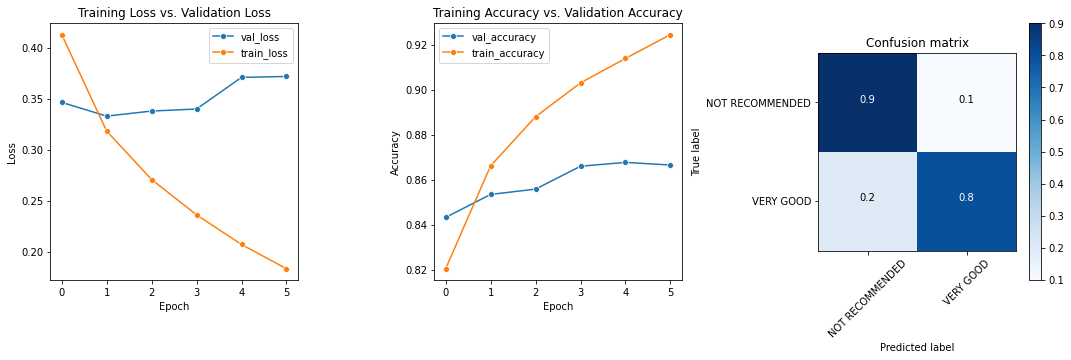

In [50]:
model_eval_2(y_test,y_hat_test,classes=['NOT RECOMMENDED',"VERY GOOD"],
             label= 'REGULAR EMBEDDING MODEL')

### Model with Word 2 Vec Embedding using LSTM layer

In [51]:
def make_model_w2v(wv):
    model=Sequential()
    
    model.add(wv.get_keras_embedding())
    
    model.add(LSTM(32,return_sequences=False,
                   recurrent_dropout=0.5))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(),
                    kernel_regularizer=regularizers.l2(0.001)))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(2, activation='softmax'))
    

    model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
    display(model.summary())
    
    return model

model = make_model_w2v(wv)

history = model.fit(X_train_seq, y_train_seq, epochs=20,batch_size=64, 
                    validation_split = 0.2, callbacks=get_earlystop(),
                   class_weight=weights_dict,workers=3)

y_hat_test = model.predict(X_test_seq).argmax(axis=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         3823360   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 34        
Total params: 3,844,530
Trainable params: 21,170
Non-trainable params: 3,823,360
_______________________________________

None

Epoch 1/20


 185/1510 [==>...........................] - ETA: 0s - loss: 0.8033 - accuracy: 0.39 - ETA: 1:13 - loss: 0.8047 - accuracy: 0.42 - ETA: 1:30 - loss: 0.7916 - accuracy: 0.43 - ETA: 1:40 - loss: 0.7828 - accuracy: 0.44 - ETA: 1:46 - loss: 0.7886 - accuracy: 0.45 - ETA: 1:51 - loss: 0.7729 - accuracy: 0.48 - ETA: 1:53 - loss: 0.7825 - accuracy: 0.46 - ETA: 1:55 - loss: 0.7840 - accuracy: 0.46 - ETA: 1:58 - loss: 0.7792 - accuracy: 0.47 - ETA: 2:00 - loss: 0.7715 - accuracy: 0.48 - ETA: 2:02 - loss: 0.7703 - accuracy: 0.48 - ETA: 2:04 - loss: 0.7666 - accuracy: 0.49 - ETA: 2:06 - loss: 0.7618 - accuracy: 0.49 - ETA: 2:07 - loss: 0.7644 - accuracy: 0.50 - ETA: 2:08 - loss: 0.7604 - accuracy: 0.50 - ETA: 2:10 - loss: 0.7602 - accuracy: 0.50 - ETA: 2:11 - loss: 0.7546 - accuracy: 0.51 - ETA: 2:11 - loss: 0.7548 - accuracy: 0.50 - ETA: 2:11 - loss: 0.7551 - accuracy: 0.51 - ETA: 2:12 - loss: 0.7533 - accuracy: 0.51 - ETA: 2:13 - loss: 0.7525 - accuracy: 0.51 - ETA: 2:13 - loss: 0.7528 - accura

 371/1510 [======>.......................] - ETA: 2:03 - loss: 0.7160 - accuracy: 0.53 - ETA: 2:03 - loss: 0.7159 - accuracy: 0.53 - ETA: 2:03 - loss: 0.7157 - accuracy: 0.53 - ETA: 2:03 - loss: 0.7156 - accuracy: 0.53 - ETA: 2:02 - loss: 0.7154 - accuracy: 0.53 - ETA: 2:02 - loss: 0.7154 - accuracy: 0.53 - ETA: 2:02 - loss: 0.7153 - accuracy: 0.54 - ETA: 2:02 - loss: 0.7150 - accuracy: 0.54 - ETA: 2:02 - loss: 0.7147 - accuracy: 0.54 - ETA: 2:02 - loss: 0.7146 - accuracy: 0.54 - ETA: 2:02 - loss: 0.7144 - accuracy: 0.54 - ETA: 2:02 - loss: 0.7143 - accuracy: 0.54 - ETA: 2:02 - loss: 0.7143 - accuracy: 0.54 - ETA: 2:02 - loss: 0.7141 - accuracy: 0.54 - ETA: 2:01 - loss: 0.7141 - accuracy: 0.54 - ETA: 2:01 - loss: 0.7141 - accuracy: 0.54 - ETA: 2:01 - loss: 0.7143 - accuracy: 0.54 - ETA: 2:01 - loss: 0.7142 - accuracy: 0.54 - ETA: 2:01 - loss: 0.7141 - accuracy: 0.53 - ETA: 2:01 - loss: 0.7139 - accuracy: 0.53 - ETA: 2:01 - loss: 0.7140 - accuracy: 0.53 - ETA: 2:01 - loss: 0.7139 - accu

 557/1510 [==========>...................] - ETA: 1:44 - loss: 0.6994 - accuracy: 0.55 - ETA: 1:44 - loss: 0.6994 - accuracy: 0.55 - ETA: 1:44 - loss: 0.6994 - accuracy: 0.55 - ETA: 1:44 - loss: 0.6994 - accuracy: 0.55 - ETA: 1:44 - loss: 0.6992 - accuracy: 0.55 - ETA: 1:44 - loss: 0.6990 - accuracy: 0.55 - ETA: 1:44 - loss: 0.6988 - accuracy: 0.55 - ETA: 1:44 - loss: 0.6987 - accuracy: 0.55 - ETA: 1:44 - loss: 0.6985 - accuracy: 0.55 - ETA: 1:43 - loss: 0.6986 - accuracy: 0.55 - ETA: 1:43 - loss: 0.6985 - accuracy: 0.55 - ETA: 1:43 - loss: 0.6984 - accuracy: 0.55 - ETA: 1:43 - loss: 0.6983 - accuracy: 0.55 - ETA: 1:43 - loss: 0.6983 - accuracy: 0.56 - ETA: 1:43 - loss: 0.6981 - accuracy: 0.56 - ETA: 1:43 - loss: 0.6981 - accuracy: 0.56 - ETA: 1:43 - loss: 0.6981 - accuracy: 0.56 - ETA: 1:43 - loss: 0.6981 - accuracy: 0.56 - ETA: 1:43 - loss: 0.6981 - accuracy: 0.56 - ETA: 1:43 - loss: 0.6979 - accuracy: 0.56 - ETA: 1:42 - loss: 0.6978 - accuracy: 0.56 - ETA: 1:42 - loss: 0.6977 - accu

 743/1510 [=============>................] - ETA: 1:26 - loss: 0.6892 - accuracy: 0.57 - ETA: 1:26 - loss: 0.6893 - accuracy: 0.57 - ETA: 1:26 - loss: 0.6892 - accuracy: 0.57 - ETA: 1:26 - loss: 0.6891 - accuracy: 0.57 - ETA: 1:25 - loss: 0.6890 - accuracy: 0.57 - ETA: 1:25 - loss: 0.6889 - accuracy: 0.57 - ETA: 1:25 - loss: 0.6888 - accuracy: 0.57 - ETA: 1:25 - loss: 0.6887 - accuracy: 0.57 - ETA: 1:25 - loss: 0.6887 - accuracy: 0.57 - ETA: 1:25 - loss: 0.6887 - accuracy: 0.57 - ETA: 1:25 - loss: 0.6886 - accuracy: 0.57 - ETA: 1:25 - loss: 0.6886 - accuracy: 0.57 - ETA: 1:25 - loss: 0.6885 - accuracy: 0.57 - ETA: 1:25 - loss: 0.6885 - accuracy: 0.57 - ETA: 1:25 - loss: 0.6884 - accuracy: 0.57 - ETA: 1:24 - loss: 0.6884 - accuracy: 0.57 - ETA: 1:24 - loss: 0.6884 - accuracy: 0.57 - ETA: 1:24 - loss: 0.6885 - accuracy: 0.57 - ETA: 1:24 - loss: 0.6884 - accuracy: 0.57 - ETA: 1:24 - loss: 0.6883 - accuracy: 0.57 - ETA: 1:24 - loss: 0.6882 - accuracy: 0.57 - ETA: 1:24 - loss: 0.6882 - accu

 929/1510 [=================>............] - ETA: 1:09 - loss: 0.6800 - accuracy: 0.58 - ETA: 1:09 - loss: 0.6800 - accuracy: 0.58 - ETA: 1:09 - loss: 0.6800 - accuracy: 0.58 - ETA: 1:09 - loss: 0.6799 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6798 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6797 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6796 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6795 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6795 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6795 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6795 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6794 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6793 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6793 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6793 - accuracy: 0.58 - ETA: 1:07 - loss: 0.6793 - accuracy: 0.58 - ETA: 1:07 - loss: 0.6792 - accuracy: 0.58 - ETA: 1:07 - loss: 0.6791 - accuracy: 0.58 - ETA: 1:07 - loss: 0.6790 - accuracy: 0.58 - ETA: 1:07 - loss: 0.6789 - accuracy: 0.58 - ETA: 1:07 - loss: 0.6788 - accuracy: 0.58 - ETA: 1:07 - loss: 0.6789 - accu

1115/1510 [=====================>........] - ETA: 52s - loss: 0.6671 - accuracy: 0.601 - ETA: 52s - loss: 0.6672 - accuracy: 0.601 - ETA: 52s - loss: 0.6671 - accuracy: 0.601 - ETA: 52s - loss: 0.6671 - accuracy: 0.602 - ETA: 52s - loss: 0.6672 - accuracy: 0.602 - ETA: 52s - loss: 0.6670 - accuracy: 0.602 - ETA: 51s - loss: 0.6669 - accuracy: 0.602 - ETA: 51s - loss: 0.6667 - accuracy: 0.602 - ETA: 51s - loss: 0.6667 - accuracy: 0.602 - ETA: 51s - loss: 0.6667 - accuracy: 0.602 - ETA: 51s - loss: 0.6667 - accuracy: 0.602 - ETA: 51s - loss: 0.6666 - accuracy: 0.602 - ETA: 51s - loss: 0.6665 - accuracy: 0.602 - ETA: 51s - loss: 0.6664 - accuracy: 0.603 - ETA: 51s - loss: 0.6664 - accuracy: 0.603 - ETA: 51s - loss: 0.6663 - accuracy: 0.603 - ETA: 51s - loss: 0.6663 - accuracy: 0.603 - ETA: 51s - loss: 0.6663 - accuracy: 0.603 - ETA: 50s - loss: 0.6663 - accuracy: 0.603 - ETA: 50s - loss: 0.6663 - accuracy: 0.603 - ETA: 50s - loss: 0.6662 - accuracy: 0.603 - ETA: 50s - loss: 0.6661 - accur

1301/1510 [========================>.....] - ETA: 35s - loss: 0.6535 - accuracy: 0.620 - ETA: 35s - loss: 0.6533 - accuracy: 0.620 - ETA: 35s - loss: 0.6532 - accuracy: 0.620 - ETA: 35s - loss: 0.6532 - accuracy: 0.620 - ETA: 35s - loss: 0.6531 - accuracy: 0.621 - ETA: 35s - loss: 0.6530 - accuracy: 0.621 - ETA: 35s - loss: 0.6529 - accuracy: 0.621 - ETA: 35s - loss: 0.6529 - accuracy: 0.621 - ETA: 35s - loss: 0.6528 - accuracy: 0.621 - ETA: 34s - loss: 0.6526 - accuracy: 0.621 - ETA: 34s - loss: 0.6525 - accuracy: 0.621 - ETA: 34s - loss: 0.6524 - accuracy: 0.621 - ETA: 34s - loss: 0.6523 - accuracy: 0.621 - ETA: 34s - loss: 0.6523 - accuracy: 0.621 - ETA: 34s - loss: 0.6522 - accuracy: 0.621 - ETA: 34s - loss: 0.6520 - accuracy: 0.622 - ETA: 34s - loss: 0.6519 - accuracy: 0.622 - ETA: 34s - loss: 0.6518 - accuracy: 0.622 - ETA: 34s - loss: 0.6516 - accuracy: 0.622 - ETA: 34s - loss: 0.6516 - accuracy: 0.622 - ETA: 33s - loss: 0.6514 - accuracy: 0.622 - ETA: 33s - loss: 0.6514 - accur

1491/1510 [============================>.] - ETA: 18s - loss: 0.6370 - accuracy: 0.638 - ETA: 18s - loss: 0.6369 - accuracy: 0.639 - ETA: 18s - loss: 0.6368 - accuracy: 0.639 - ETA: 18s - loss: 0.6367 - accuracy: 0.639 - ETA: 18s - loss: 0.6367 - accuracy: 0.639 - ETA: 18s - loss: 0.6366 - accuracy: 0.639 - ETA: 18s - loss: 0.6365 - accuracy: 0.639 - ETA: 18s - loss: 0.6365 - accuracy: 0.639 - ETA: 18s - loss: 0.6364 - accuracy: 0.639 - ETA: 18s - loss: 0.6364 - accuracy: 0.639 - ETA: 17s - loss: 0.6364 - accuracy: 0.639 - ETA: 17s - loss: 0.6362 - accuracy: 0.639 - ETA: 17s - loss: 0.6361 - accuracy: 0.639 - ETA: 17s - loss: 0.6360 - accuracy: 0.639 - ETA: 17s - loss: 0.6360 - accuracy: 0.640 - ETA: 17s - loss: 0.6359 - accuracy: 0.640 - ETA: 17s - loss: 0.6359 - accuracy: 0.640 - ETA: 17s - loss: 0.6358 - accuracy: 0.640 - ETA: 17s - loss: 0.6358 - accuracy: 0.640 - ETA: 17s - loss: 0.6356 - accuracy: 0.640 - ETA: 17s - loss: 0.6355 - accuracy: 0.640 - ETA: 16s - loss: 0.6354 - accur

1510/1510 [==============================] - ETA: 1s - loss: 0.6230 - accuracy: 0.65 - ETA: 1s - loss: 0.6229 - accuracy: 0.65 - ETA: 1s - loss: 0.6228 - accuracy: 0.65 - ETA: 1s - loss: 0.6228 - accuracy: 0.65 - ETA: 1s - loss: 0.6226 - accuracy: 0.65 - ETA: 1s - loss: 0.6225 - accuracy: 0.65 - ETA: 1s - loss: 0.6224 - accuracy: 0.65 - ETA: 1s - loss: 0.6224 - accuracy: 0.65 - ETA: 0s - loss: 0.6223 - accuracy: 0.65 - ETA: 0s - loss: 0.6223 - accuracy: 0.65 - ETA: 0s - loss: 0.6222 - accuracy: 0.65 - ETA: 0s - loss: 0.6221 - accuracy: 0.65 - ETA: 0s - loss: 0.6220 - accuracy: 0.65 - ETA: 0s - loss: 0.6219 - accuracy: 0.65 - ETA: 0s - loss: 0.6218 - accuracy: 0.65 - ETA: 0s - loss: 0.6217 - accuracy: 0.65 - ETA: 0s - loss: 0.6216 - accuracy: 0.65 - ETA: 0s - loss: 0.6216 - accuracy: 0.65 - ETA: 0s - loss: 0.6215 - accuracy: 0.65 - 144s 95ms/step - loss: 0.6215 - accuracy: 0.6556 - val_loss: 0.4913 - val_accuracy: 0.7693
Epoch 2/20


 186/1510 [==>...........................] - ETA: 0s - loss: 0.4003 - accuracy: 0.82 - ETA: 1:04 - loss: 0.4636 - accuracy: 0.80 - ETA: 1:28 - loss: 0.4692 - accuracy: 0.80 - ETA: 1:42 - loss: 0.5025 - accuracy: 0.78 - ETA: 1:50 - loss: 0.5031 - accuracy: 0.78 - ETA: 1:54 - loss: 0.4916 - accuracy: 0.79 - ETA: 1:57 - loss: 0.4932 - accuracy: 0.78 - ETA: 1:59 - loss: 0.5152 - accuracy: 0.76 - ETA: 2:01 - loss: 0.5118 - accuracy: 0.77 - ETA: 2:02 - loss: 0.5165 - accuracy: 0.77 - ETA: 2:03 - loss: 0.5093 - accuracy: 0.77 - ETA: 2:04 - loss: 0.5075 - accuracy: 0.77 - ETA: 2:05 - loss: 0.5058 - accuracy: 0.78 - ETA: 2:06 - loss: 0.5059 - accuracy: 0.78 - ETA: 2:07 - loss: 0.5060 - accuracy: 0.78 - ETA: 2:07 - loss: 0.5073 - accuracy: 0.78 - ETA: 2:07 - loss: 0.5138 - accuracy: 0.78 - ETA: 2:07 - loss: 0.5138 - accuracy: 0.78 - ETA: 2:07 - loss: 0.5206 - accuracy: 0.77 - ETA: 2:07 - loss: 0.5182 - accuracy: 0.78 - ETA: 2:07 - loss: 0.5117 - accuracy: 0.78 - ETA: 2:07 - loss: 0.5134 - accura

 372/1510 [======>.......................] - ETA: 1:57 - loss: 0.5097 - accuracy: 0.77 - ETA: 1:57 - loss: 0.5096 - accuracy: 0.77 - ETA: 1:57 - loss: 0.5096 - accuracy: 0.77 - ETA: 1:57 - loss: 0.5097 - accuracy: 0.77 - ETA: 1:57 - loss: 0.5100 - accuracy: 0.77 - ETA: 1:56 - loss: 0.5098 - accuracy: 0.77 - ETA: 1:56 - loss: 0.5102 - accuracy: 0.77 - ETA: 1:56 - loss: 0.5105 - accuracy: 0.77 - ETA: 1:56 - loss: 0.5103 - accuracy: 0.77 - ETA: 1:56 - loss: 0.5098 - accuracy: 0.77 - ETA: 1:56 - loss: 0.5099 - accuracy: 0.77 - ETA: 1:56 - loss: 0.5101 - accuracy: 0.77 - ETA: 1:56 - loss: 0.5100 - accuracy: 0.77 - ETA: 1:56 - loss: 0.5105 - accuracy: 0.77 - ETA: 1:56 - loss: 0.5105 - accuracy: 0.77 - ETA: 1:56 - loss: 0.5103 - accuracy: 0.77 - ETA: 1:56 - loss: 0.5105 - accuracy: 0.77 - ETA: 1:56 - loss: 0.5103 - accuracy: 0.77 - ETA: 1:56 - loss: 0.5108 - accuracy: 0.77 - ETA: 1:56 - loss: 0.5108 - accuracy: 0.77 - ETA: 1:55 - loss: 0.5108 - accuracy: 0.77 - ETA: 1:55 - loss: 0.5108 - accu

 558/1510 [==========>...................] - ETA: 1:42 - loss: 0.5076 - accuracy: 0.77 - ETA: 1:42 - loss: 0.5076 - accuracy: 0.77 - ETA: 1:42 - loss: 0.5077 - accuracy: 0.77 - ETA: 1:42 - loss: 0.5076 - accuracy: 0.77 - ETA: 1:42 - loss: 0.5078 - accuracy: 0.77 - ETA: 1:42 - loss: 0.5077 - accuracy: 0.77 - ETA: 1:42 - loss: 0.5076 - accuracy: 0.77 - ETA: 1:41 - loss: 0.5075 - accuracy: 0.77 - ETA: 1:41 - loss: 0.5074 - accuracy: 0.77 - ETA: 1:41 - loss: 0.5076 - accuracy: 0.77 - ETA: 1:41 - loss: 0.5076 - accuracy: 0.77 - ETA: 1:41 - loss: 0.5077 - accuracy: 0.77 - ETA: 1:41 - loss: 0.5075 - accuracy: 0.77 - ETA: 1:41 - loss: 0.5073 - accuracy: 0.77 - ETA: 1:41 - loss: 0.5073 - accuracy: 0.77 - ETA: 1:41 - loss: 0.5072 - accuracy: 0.77 - ETA: 1:41 - loss: 0.5070 - accuracy: 0.77 - ETA: 1:41 - loss: 0.5071 - accuracy: 0.77 - ETA: 1:40 - loss: 0.5069 - accuracy: 0.77 - ETA: 1:40 - loss: 0.5066 - accuracy: 0.77 - ETA: 1:40 - loss: 0.5065 - accuracy: 0.77 - ETA: 1:40 - loss: 0.5063 - accu

 744/1510 [=============>................] - ETA: 1:26 - loss: 0.5022 - accuracy: 0.77 - ETA: 1:26 - loss: 0.5023 - accuracy: 0.77 - ETA: 1:26 - loss: 0.5025 - accuracy: 0.77 - ETA: 1:26 - loss: 0.5023 - accuracy: 0.77 - ETA: 1:26 - loss: 0.5021 - accuracy: 0.77 - ETA: 1:25 - loss: 0.5021 - accuracy: 0.77 - ETA: 1:25 - loss: 0.5019 - accuracy: 0.77 - ETA: 1:25 - loss: 0.5019 - accuracy: 0.77 - ETA: 1:25 - loss: 0.5017 - accuracy: 0.77 - ETA: 1:25 - loss: 0.5014 - accuracy: 0.77 - ETA: 1:25 - loss: 0.5014 - accuracy: 0.77 - ETA: 1:25 - loss: 0.5016 - accuracy: 0.77 - ETA: 1:25 - loss: 0.5013 - accuracy: 0.77 - ETA: 1:25 - loss: 0.5013 - accuracy: 0.77 - ETA: 1:25 - loss: 0.5013 - accuracy: 0.77 - ETA: 1:25 - loss: 0.5012 - accuracy: 0.77 - ETA: 1:24 - loss: 0.5009 - accuracy: 0.77 - ETA: 1:24 - loss: 0.5013 - accuracy: 0.77 - ETA: 1:24 - loss: 0.5012 - accuracy: 0.77 - ETA: 1:24 - loss: 0.5011 - accuracy: 0.77 - ETA: 1:24 - loss: 0.5011 - accuracy: 0.77 - ETA: 1:24 - loss: 0.5008 - accu

 930/1510 [=================>............] - ETA: 1:09 - loss: 0.4967 - accuracy: 0.78 - ETA: 1:09 - loss: 0.4968 - accuracy: 0.78 - ETA: 1:09 - loss: 0.4967 - accuracy: 0.77 - ETA: 1:09 - loss: 0.4965 - accuracy: 0.78 - ETA: 1:09 - loss: 0.4965 - accuracy: 0.78 - ETA: 1:09 - loss: 0.4964 - accuracy: 0.78 - ETA: 1:08 - loss: 0.4964 - accuracy: 0.78 - ETA: 1:08 - loss: 0.4965 - accuracy: 0.78 - ETA: 1:08 - loss: 0.4965 - accuracy: 0.78 - ETA: 1:08 - loss: 0.4965 - accuracy: 0.78 - ETA: 1:08 - loss: 0.4965 - accuracy: 0.78 - ETA: 1:08 - loss: 0.4964 - accuracy: 0.78 - ETA: 1:08 - loss: 0.4966 - accuracy: 0.78 - ETA: 1:08 - loss: 0.4966 - accuracy: 0.78 - ETA: 1:08 - loss: 0.4966 - accuracy: 0.78 - ETA: 1:08 - loss: 0.4965 - accuracy: 0.78 - ETA: 1:08 - loss: 0.4965 - accuracy: 0.78 - ETA: 1:07 - loss: 0.4964 - accuracy: 0.78 - ETA: 1:07 - loss: 0.4962 - accuracy: 0.78 - ETA: 1:07 - loss: 0.4961 - accuracy: 0.78 - ETA: 1:07 - loss: 0.4961 - accuracy: 0.78 - ETA: 1:07 - loss: 0.4961 - accu

1116/1510 [=====================>........] - ETA: 52s - loss: 0.4927 - accuracy: 0.781 - ETA: 52s - loss: 0.4927 - accuracy: 0.781 - ETA: 52s - loss: 0.4928 - accuracy: 0.781 - ETA: 52s - loss: 0.4929 - accuracy: 0.781 - ETA: 52s - loss: 0.4930 - accuracy: 0.781 - ETA: 51s - loss: 0.4929 - accuracy: 0.781 - ETA: 51s - loss: 0.4929 - accuracy: 0.781 - ETA: 51s - loss: 0.4929 - accuracy: 0.781 - ETA: 51s - loss: 0.4929 - accuracy: 0.781 - ETA: 51s - loss: 0.4929 - accuracy: 0.781 - ETA: 51s - loss: 0.4928 - accuracy: 0.781 - ETA: 51s - loss: 0.4928 - accuracy: 0.781 - ETA: 51s - loss: 0.4929 - accuracy: 0.781 - ETA: 51s - loss: 0.4928 - accuracy: 0.781 - ETA: 51s - loss: 0.4928 - accuracy: 0.781 - ETA: 51s - loss: 0.4927 - accuracy: 0.781 - ETA: 50s - loss: 0.4926 - accuracy: 0.782 - ETA: 50s - loss: 0.4925 - accuracy: 0.782 - ETA: 50s - loss: 0.4926 - accuracy: 0.781 - ETA: 50s - loss: 0.4927 - accuracy: 0.781 - ETA: 50s - loss: 0.4926 - accuracy: 0.782 - ETA: 50s - loss: 0.4927 - accur

1302/1510 [========================>.....] - ETA: 35s - loss: 0.4898 - accuracy: 0.783 - ETA: 35s - loss: 0.4897 - accuracy: 0.783 - ETA: 35s - loss: 0.4897 - accuracy: 0.784 - ETA: 35s - loss: 0.4897 - accuracy: 0.783 - ETA: 35s - loss: 0.4897 - accuracy: 0.783 - ETA: 35s - loss: 0.4896 - accuracy: 0.783 - ETA: 35s - loss: 0.4896 - accuracy: 0.784 - ETA: 34s - loss: 0.4895 - accuracy: 0.784 - ETA: 34s - loss: 0.4895 - accuracy: 0.784 - ETA: 34s - loss: 0.4895 - accuracy: 0.783 - ETA: 34s - loss: 0.4895 - accuracy: 0.783 - ETA: 34s - loss: 0.4895 - accuracy: 0.784 - ETA: 34s - loss: 0.4894 - accuracy: 0.784 - ETA: 34s - loss: 0.4894 - accuracy: 0.784 - ETA: 34s - loss: 0.4893 - accuracy: 0.784 - ETA: 34s - loss: 0.4893 - accuracy: 0.784 - ETA: 34s - loss: 0.4893 - accuracy: 0.784 - ETA: 34s - loss: 0.4893 - accuracy: 0.784 - ETA: 33s - loss: 0.4892 - accuracy: 0.784 - ETA: 33s - loss: 0.4891 - accuracy: 0.784 - ETA: 33s - loss: 0.4890 - accuracy: 0.784 - ETA: 33s - loss: 0.4889 - accur

1492/1510 [============================>.] - ETA: 18s - loss: 0.4874 - accuracy: 0.784 - ETA: 18s - loss: 0.4874 - accuracy: 0.784 - ETA: 18s - loss: 0.4875 - accuracy: 0.784 - ETA: 18s - loss: 0.4874 - accuracy: 0.784 - ETA: 18s - loss: 0.4874 - accuracy: 0.784 - ETA: 18s - loss: 0.4875 - accuracy: 0.784 - ETA: 18s - loss: 0.4874 - accuracy: 0.784 - ETA: 18s - loss: 0.4873 - accuracy: 0.784 - ETA: 18s - loss: 0.4875 - accuracy: 0.784 - ETA: 17s - loss: 0.4875 - accuracy: 0.784 - ETA: 17s - loss: 0.4875 - accuracy: 0.784 - ETA: 17s - loss: 0.4875 - accuracy: 0.784 - ETA: 17s - loss: 0.4875 - accuracy: 0.784 - ETA: 17s - loss: 0.4874 - accuracy: 0.784 - ETA: 17s - loss: 0.4874 - accuracy: 0.784 - ETA: 17s - loss: 0.4874 - accuracy: 0.784 - ETA: 17s - loss: 0.4873 - accuracy: 0.784 - ETA: 17s - loss: 0.4873 - accuracy: 0.784 - ETA: 17s - loss: 0.4873 - accuracy: 0.784 - ETA: 17s - loss: 0.4872 - accuracy: 0.784 - ETA: 16s - loss: 0.4872 - accuracy: 0.784 - ETA: 16s - loss: 0.4872 - accur

1510/1510 [==============================] - ETA: 1s - loss: 0.4858 - accuracy: 0.78 - ETA: 1s - loss: 0.4857 - accuracy: 0.78 - ETA: 1s - loss: 0.4857 - accuracy: 0.78 - ETA: 1s - loss: 0.4857 - accuracy: 0.78 - ETA: 1s - loss: 0.4856 - accuracy: 0.78 - ETA: 1s - loss: 0.4856 - accuracy: 0.78 - ETA: 0s - loss: 0.4857 - accuracy: 0.78 - ETA: 0s - loss: 0.4856 - accuracy: 0.78 - ETA: 0s - loss: 0.4857 - accuracy: 0.78 - ETA: 0s - loss: 0.4856 - accuracy: 0.78 - ETA: 0s - loss: 0.4856 - accuracy: 0.78 - ETA: 0s - loss: 0.4855 - accuracy: 0.78 - ETA: 0s - loss: 0.4855 - accuracy: 0.78 - ETA: 0s - loss: 0.4856 - accuracy: 0.78 - ETA: 0s - loss: 0.4856 - accuracy: 0.78 - ETA: 0s - loss: 0.4855 - accuracy: 0.78 - ETA: 0s - loss: 0.4855 - accuracy: 0.78 - ETA: 0s - loss: 0.4856 - accuracy: 0.78 - 143s 95ms/step - loss: 0.4856 - accuracy: 0.7852 - val_loss: 0.4291 - val_accuracy: 0.8054
Epoch 3/20


 186/1510 [==>...........................] - ETA: 0s - loss: 0.4913 - accuracy: 0.79 - ETA: 1:11 - loss: 0.4524 - accuracy: 0.80 - ETA: 1:35 - loss: 0.4520 - accuracy: 0.80 - ETA: 1:49 - loss: 0.4626 - accuracy: 0.78 - ETA: 1:57 - loss: 0.4466 - accuracy: 0.79 - ETA: 2:02 - loss: 0.4504 - accuracy: 0.79 - ETA: 2:08 - loss: 0.4503 - accuracy: 0.79 - ETA: 2:12 - loss: 0.4641 - accuracy: 0.79 - ETA: 2:14 - loss: 0.4683 - accuracy: 0.79 - ETA: 2:15 - loss: 0.4693 - accuracy: 0.79 - ETA: 2:15 - loss: 0.4629 - accuracy: 0.79 - ETA: 2:15 - loss: 0.4685 - accuracy: 0.79 - ETA: 2:14 - loss: 0.4618 - accuracy: 0.80 - ETA: 2:15 - loss: 0.4557 - accuracy: 0.80 - ETA: 2:15 - loss: 0.4568 - accuracy: 0.80 - ETA: 2:15 - loss: 0.4601 - accuracy: 0.80 - ETA: 2:15 - loss: 0.4605 - accuracy: 0.80 - ETA: 2:16 - loss: 0.4567 - accuracy: 0.80 - ETA: 2:16 - loss: 0.4561 - accuracy: 0.80 - ETA: 2:16 - loss: 0.4514 - accuracy: 0.80 - ETA: 2:16 - loss: 0.4539 - accuracy: 0.79 - ETA: 2:16 - loss: 0.4556 - accura

 372/1510 [======>.......................] - ETA: 2:00 - loss: 0.4613 - accuracy: 0.79 - ETA: 1:59 - loss: 0.4613 - accuracy: 0.79 - ETA: 1:59 - loss: 0.4610 - accuracy: 0.79 - ETA: 1:59 - loss: 0.4608 - accuracy: 0.79 - ETA: 1:59 - loss: 0.4608 - accuracy: 0.79 - ETA: 1:59 - loss: 0.4609 - accuracy: 0.79 - ETA: 1:59 - loss: 0.4610 - accuracy: 0.79 - ETA: 1:59 - loss: 0.4610 - accuracy: 0.79 - ETA: 1:59 - loss: 0.4616 - accuracy: 0.79 - ETA: 1:58 - loss: 0.4613 - accuracy: 0.79 - ETA: 1:58 - loss: 0.4611 - accuracy: 0.79 - ETA: 1:58 - loss: 0.4618 - accuracy: 0.79 - ETA: 1:58 - loss: 0.4618 - accuracy: 0.79 - ETA: 1:58 - loss: 0.4619 - accuracy: 0.79 - ETA: 1:58 - loss: 0.4621 - accuracy: 0.79 - ETA: 1:58 - loss: 0.4616 - accuracy: 0.79 - ETA: 1:58 - loss: 0.4612 - accuracy: 0.79 - ETA: 1:58 - loss: 0.4613 - accuracy: 0.79 - ETA: 1:57 - loss: 0.4612 - accuracy: 0.79 - ETA: 1:57 - loss: 0.4614 - accuracy: 0.79 - ETA: 1:57 - loss: 0.4609 - accuracy: 0.79 - ETA: 1:57 - loss: 0.4609 - accu

 558/1510 [==========>...................] - ETA: 1:43 - loss: 0.4586 - accuracy: 0.79 - ETA: 1:43 - loss: 0.4585 - accuracy: 0.79 - ETA: 1:43 - loss: 0.4589 - accuracy: 0.79 - ETA: 1:42 - loss: 0.4590 - accuracy: 0.79 - ETA: 1:42 - loss: 0.4595 - accuracy: 0.79 - ETA: 1:42 - loss: 0.4597 - accuracy: 0.79 - ETA: 1:42 - loss: 0.4594 - accuracy: 0.79 - ETA: 1:42 - loss: 0.4595 - accuracy: 0.79 - ETA: 1:42 - loss: 0.4594 - accuracy: 0.79 - ETA: 1:42 - loss: 0.4590 - accuracy: 0.79 - ETA: 1:42 - loss: 0.4588 - accuracy: 0.79 - ETA: 1:42 - loss: 0.4589 - accuracy: 0.79 - ETA: 1:42 - loss: 0.4586 - accuracy: 0.79 - ETA: 1:42 - loss: 0.4587 - accuracy: 0.79 - ETA: 1:41 - loss: 0.4585 - accuracy: 0.79 - ETA: 1:41 - loss: 0.4584 - accuracy: 0.79 - ETA: 1:41 - loss: 0.4586 - accuracy: 0.79 - ETA: 1:41 - loss: 0.4588 - accuracy: 0.79 - ETA: 1:41 - loss: 0.4587 - accuracy: 0.79 - ETA: 1:41 - loss: 0.4585 - accuracy: 0.79 - ETA: 1:41 - loss: 0.4587 - accuracy: 0.79 - ETA: 1:41 - loss: 0.4587 - accu

 744/1510 [=============>................] - ETA: 1:25 - loss: 0.4552 - accuracy: 0.79 - ETA: 1:25 - loss: 0.4553 - accuracy: 0.79 - ETA: 1:25 - loss: 0.4553 - accuracy: 0.79 - ETA: 1:25 - loss: 0.4553 - accuracy: 0.79 - ETA: 1:25 - loss: 0.4552 - accuracy: 0.79 - ETA: 1:25 - loss: 0.4553 - accuracy: 0.79 - ETA: 1:25 - loss: 0.4552 - accuracy: 0.79 - ETA: 1:25 - loss: 0.4549 - accuracy: 0.79 - ETA: 1:25 - loss: 0.4547 - accuracy: 0.79 - ETA: 1:24 - loss: 0.4549 - accuracy: 0.79 - ETA: 1:24 - loss: 0.4548 - accuracy: 0.79 - ETA: 1:24 - loss: 0.4549 - accuracy: 0.79 - ETA: 1:24 - loss: 0.4546 - accuracy: 0.79 - ETA: 1:24 - loss: 0.4545 - accuracy: 0.79 - ETA: 1:24 - loss: 0.4545 - accuracy: 0.79 - ETA: 1:24 - loss: 0.4544 - accuracy: 0.79 - ETA: 1:24 - loss: 0.4545 - accuracy: 0.79 - ETA: 1:24 - loss: 0.4546 - accuracy: 0.79 - ETA: 1:24 - loss: 0.4545 - accuracy: 0.79 - ETA: 1:24 - loss: 0.4545 - accuracy: 0.79 - ETA: 1:24 - loss: 0.4543 - accuracy: 0.79 - ETA: 1:23 - loss: 0.4542 - accu

 930/1510 [=================>............] - ETA: 1:09 - loss: 0.4534 - accuracy: 0.80 - ETA: 1:09 - loss: 0.4534 - accuracy: 0.80 - ETA: 1:09 - loss: 0.4534 - accuracy: 0.80 - ETA: 1:08 - loss: 0.4535 - accuracy: 0.79 - ETA: 1:08 - loss: 0.4534 - accuracy: 0.79 - ETA: 1:08 - loss: 0.4534 - accuracy: 0.79 - ETA: 1:08 - loss: 0.4535 - accuracy: 0.79 - ETA: 1:08 - loss: 0.4534 - accuracy: 0.79 - ETA: 1:08 - loss: 0.4533 - accuracy: 0.79 - ETA: 1:08 - loss: 0.4533 - accuracy: 0.79 - ETA: 1:08 - loss: 0.4533 - accuracy: 0.79 - ETA: 1:08 - loss: 0.4531 - accuracy: 0.80 - ETA: 1:08 - loss: 0.4530 - accuracy: 0.80 - ETA: 1:08 - loss: 0.4532 - accuracy: 0.80 - ETA: 1:07 - loss: 0.4531 - accuracy: 0.80 - ETA: 1:07 - loss: 0.4531 - accuracy: 0.80 - ETA: 1:07 - loss: 0.4531 - accuracy: 0.80 - ETA: 1:07 - loss: 0.4533 - accuracy: 0.80 - ETA: 1:07 - loss: 0.4532 - accuracy: 0.80 - ETA: 1:07 - loss: 0.4532 - accuracy: 0.80 - ETA: 1:07 - loss: 0.4532 - accuracy: 0.79 - ETA: 1:07 - loss: 0.4533 - accu

1116/1510 [=====================>........] - ETA: 51s - loss: 0.4534 - accuracy: 0.799 - ETA: 51s - loss: 0.4534 - accuracy: 0.799 - ETA: 51s - loss: 0.4536 - accuracy: 0.799 - ETA: 51s - loss: 0.4536 - accuracy: 0.799 - ETA: 51s - loss: 0.4536 - accuracy: 0.799 - ETA: 51s - loss: 0.4536 - accuracy: 0.799 - ETA: 51s - loss: 0.4536 - accuracy: 0.799 - ETA: 51s - loss: 0.4537 - accuracy: 0.799 - ETA: 51s - loss: 0.4539 - accuracy: 0.799 - ETA: 51s - loss: 0.4538 - accuracy: 0.799 - ETA: 51s - loss: 0.4538 - accuracy: 0.799 - ETA: 51s - loss: 0.4539 - accuracy: 0.799 - ETA: 50s - loss: 0.4539 - accuracy: 0.799 - ETA: 50s - loss: 0.4538 - accuracy: 0.799 - ETA: 50s - loss: 0.4538 - accuracy: 0.799 - ETA: 50s - loss: 0.4538 - accuracy: 0.799 - ETA: 50s - loss: 0.4537 - accuracy: 0.799 - ETA: 50s - loss: 0.4538 - accuracy: 0.799 - ETA: 50s - loss: 0.4539 - accuracy: 0.799 - ETA: 50s - loss: 0.4539 - accuracy: 0.799 - ETA: 50s - loss: 0.4539 - accuracy: 0.799 - ETA: 50s - loss: 0.4539 - accur

1302/1510 [========================>.....] - ETA: 35s - loss: 0.4516 - accuracy: 0.800 - ETA: 35s - loss: 0.4516 - accuracy: 0.800 - ETA: 35s - loss: 0.4516 - accuracy: 0.800 - ETA: 34s - loss: 0.4517 - accuracy: 0.800 - ETA: 34s - loss: 0.4517 - accuracy: 0.800 - ETA: 34s - loss: 0.4516 - accuracy: 0.800 - ETA: 34s - loss: 0.4516 - accuracy: 0.800 - ETA: 34s - loss: 0.4516 - accuracy: 0.800 - ETA: 34s - loss: 0.4515 - accuracy: 0.800 - ETA: 34s - loss: 0.4514 - accuracy: 0.800 - ETA: 34s - loss: 0.4515 - accuracy: 0.800 - ETA: 34s - loss: 0.4515 - accuracy: 0.800 - ETA: 34s - loss: 0.4516 - accuracy: 0.800 - ETA: 34s - loss: 0.4516 - accuracy: 0.800 - ETA: 33s - loss: 0.4516 - accuracy: 0.800 - ETA: 33s - loss: 0.4515 - accuracy: 0.800 - ETA: 33s - loss: 0.4516 - accuracy: 0.800 - ETA: 33s - loss: 0.4516 - accuracy: 0.800 - ETA: 33s - loss: 0.4516 - accuracy: 0.800 - ETA: 33s - loss: 0.4515 - accuracy: 0.800 - ETA: 33s - loss: 0.4516 - accuracy: 0.800 - ETA: 33s - loss: 0.4517 - accur

1492/1510 [============================>.] - ETA: 18s - loss: 0.4510 - accuracy: 0.800 - ETA: 18s - loss: 0.4510 - accuracy: 0.800 - ETA: 18s - loss: 0.4509 - accuracy: 0.801 - ETA: 18s - loss: 0.4508 - accuracy: 0.801 - ETA: 18s - loss: 0.4509 - accuracy: 0.800 - ETA: 18s - loss: 0.4508 - accuracy: 0.801 - ETA: 18s - loss: 0.4508 - accuracy: 0.801 - ETA: 17s - loss: 0.4509 - accuracy: 0.801 - ETA: 17s - loss: 0.4509 - accuracy: 0.800 - ETA: 17s - loss: 0.4509 - accuracy: 0.800 - ETA: 17s - loss: 0.4509 - accuracy: 0.800 - ETA: 17s - loss: 0.4508 - accuracy: 0.800 - ETA: 17s - loss: 0.4508 - accuracy: 0.800 - ETA: 17s - loss: 0.4508 - accuracy: 0.801 - ETA: 17s - loss: 0.4508 - accuracy: 0.801 - ETA: 17s - loss: 0.4508 - accuracy: 0.801 - ETA: 17s - loss: 0.4510 - accuracy: 0.800 - ETA: 17s - loss: 0.4509 - accuracy: 0.800 - ETA: 16s - loss: 0.4509 - accuracy: 0.801 - ETA: 16s - loss: 0.4509 - accuracy: 0.801 - ETA: 16s - loss: 0.4508 - accuracy: 0.801 - ETA: 16s - loss: 0.4509 - accur

1510/1510 [==============================] - ETA: 1s - loss: 0.4500 - accuracy: 0.80 - ETA: 1s - loss: 0.4500 - accuracy: 0.80 - ETA: 1s - loss: 0.4500 - accuracy: 0.80 - ETA: 1s - loss: 0.4500 - accuracy: 0.80 - ETA: 1s - loss: 0.4500 - accuracy: 0.80 - ETA: 1s - loss: 0.4499 - accuracy: 0.80 - ETA: 0s - loss: 0.4500 - accuracy: 0.80 - ETA: 0s - loss: 0.4500 - accuracy: 0.80 - ETA: 0s - loss: 0.4499 - accuracy: 0.80 - ETA: 0s - loss: 0.4499 - accuracy: 0.80 - ETA: 0s - loss: 0.4498 - accuracy: 0.80 - ETA: 0s - loss: 0.4498 - accuracy: 0.80 - ETA: 0s - loss: 0.4496 - accuracy: 0.80 - ETA: 0s - loss: 0.4496 - accuracy: 0.80 - ETA: 0s - loss: 0.4496 - accuracy: 0.80 - ETA: 0s - loss: 0.4495 - accuracy: 0.80 - ETA: 0s - loss: 0.4495 - accuracy: 0.80 - ETA: 0s - loss: 0.4495 - accuracy: 0.80 - 141s 93ms/step - loss: 0.4495 - accuracy: 0.8019 - val_loss: 0.4277 - val_accuracy: 0.8056
Epoch 4/20


 186/1510 [==>...........................] - ETA: 0s - loss: 0.4206 - accuracy: 0.78 - ETA: 1:05 - loss: 0.4566 - accuracy: 0.79 - ETA: 1:29 - loss: 0.4334 - accuracy: 0.80 - ETA: 1:39 - loss: 0.4600 - accuracy: 0.79 - ETA: 1:45 - loss: 0.4314 - accuracy: 0.80 - ETA: 1:49 - loss: 0.4195 - accuracy: 0.81 - ETA: 1:52 - loss: 0.4291 - accuracy: 0.80 - ETA: 1:55 - loss: 0.4457 - accuracy: 0.80 - ETA: 1:56 - loss: 0.4349 - accuracy: 0.80 - ETA: 1:58 - loss: 0.4453 - accuracy: 0.79 - ETA: 2:00 - loss: 0.4315 - accuracy: 0.80 - ETA: 2:07 - loss: 0.4351 - accuracy: 0.80 - ETA: 2:10 - loss: 0.4352 - accuracy: 0.79 - ETA: 2:11 - loss: 0.4275 - accuracy: 0.80 - ETA: 2:12 - loss: 0.4231 - accuracy: 0.80 - ETA: 2:12 - loss: 0.4222 - accuracy: 0.80 - ETA: 2:12 - loss: 0.4190 - accuracy: 0.80 - ETA: 2:13 - loss: 0.4338 - accuracy: 0.80 - ETA: 2:13 - loss: 0.4319 - accuracy: 0.80 - ETA: 2:13 - loss: 0.4284 - accuracy: 0.80 - ETA: 2:13 - loss: 0.4320 - accuracy: 0.80 - ETA: 2:13 - loss: 0.4390 - accura

 372/1510 [======>.......................] - ETA: 1:56 - loss: 0.4216 - accuracy: 0.81 - ETA: 1:56 - loss: 0.4221 - accuracy: 0.81 - ETA: 1:56 - loss: 0.4222 - accuracy: 0.81 - ETA: 1:56 - loss: 0.4231 - accuracy: 0.81 - ETA: 1:56 - loss: 0.4226 - accuracy: 0.81 - ETA: 1:56 - loss: 0.4228 - accuracy: 0.81 - ETA: 1:56 - loss: 0.4228 - accuracy: 0.81 - ETA: 1:56 - loss: 0.4223 - accuracy: 0.81 - ETA: 1:56 - loss: 0.4231 - accuracy: 0.81 - ETA: 1:56 - loss: 0.4239 - accuracy: 0.81 - ETA: 1:56 - loss: 0.4241 - accuracy: 0.81 - ETA: 1:56 - loss: 0.4247 - accuracy: 0.81 - ETA: 1:56 - loss: 0.4243 - accuracy: 0.81 - ETA: 1:56 - loss: 0.4242 - accuracy: 0.81 - ETA: 1:56 - loss: 0.4248 - accuracy: 0.81 - ETA: 1:55 - loss: 0.4247 - accuracy: 0.81 - ETA: 1:55 - loss: 0.4249 - accuracy: 0.81 - ETA: 1:55 - loss: 0.4255 - accuracy: 0.81 - ETA: 1:55 - loss: 0.4255 - accuracy: 0.81 - ETA: 1:55 - loss: 0.4254 - accuracy: 0.81 - ETA: 1:55 - loss: 0.4256 - accuracy: 0.81 - ETA: 1:55 - loss: 0.4253 - accu

 558/1510 [==========>...................] - ETA: 1:41 - loss: 0.4269 - accuracy: 0.81 - ETA: 1:41 - loss: 0.4272 - accuracy: 0.81 - ETA: 1:41 - loss: 0.4280 - accuracy: 0.81 - ETA: 1:41 - loss: 0.4281 - accuracy: 0.81 - ETA: 1:40 - loss: 0.4281 - accuracy: 0.81 - ETA: 1:40 - loss: 0.4281 - accuracy: 0.81 - ETA: 1:40 - loss: 0.4280 - accuracy: 0.81 - ETA: 1:40 - loss: 0.4281 - accuracy: 0.81 - ETA: 1:40 - loss: 0.4284 - accuracy: 0.81 - ETA: 1:40 - loss: 0.4286 - accuracy: 0.81 - ETA: 1:40 - loss: 0.4287 - accuracy: 0.81 - ETA: 1:40 - loss: 0.4287 - accuracy: 0.81 - ETA: 1:40 - loss: 0.4285 - accuracy: 0.81 - ETA: 1:40 - loss: 0.4281 - accuracy: 0.81 - ETA: 1:40 - loss: 0.4282 - accuracy: 0.81 - ETA: 1:40 - loss: 0.4284 - accuracy: 0.81 - ETA: 1:39 - loss: 0.4284 - accuracy: 0.81 - ETA: 1:39 - loss: 0.4288 - accuracy: 0.81 - ETA: 1:39 - loss: 0.4286 - accuracy: 0.81 - ETA: 1:39 - loss: 0.4283 - accuracy: 0.81 - ETA: 1:39 - loss: 0.4285 - accuracy: 0.81 - ETA: 1:39 - loss: 0.4285 - accu

 744/1510 [=============>................] - ETA: 1:25 - loss: 0.4332 - accuracy: 0.81 - ETA: 1:25 - loss: 0.4333 - accuracy: 0.81 - ETA: 1:25 - loss: 0.4333 - accuracy: 0.81 - ETA: 1:25 - loss: 0.4332 - accuracy: 0.81 - ETA: 1:24 - loss: 0.4331 - accuracy: 0.81 - ETA: 1:24 - loss: 0.4331 - accuracy: 0.81 - ETA: 1:24 - loss: 0.4330 - accuracy: 0.81 - ETA: 1:24 - loss: 0.4331 - accuracy: 0.81 - ETA: 1:24 - loss: 0.4330 - accuracy: 0.81 - ETA: 1:24 - loss: 0.4331 - accuracy: 0.81 - ETA: 1:24 - loss: 0.4330 - accuracy: 0.81 - ETA: 1:24 - loss: 0.4329 - accuracy: 0.81 - ETA: 1:24 - loss: 0.4328 - accuracy: 0.81 - ETA: 1:24 - loss: 0.4329 - accuracy: 0.81 - ETA: 1:24 - loss: 0.4329 - accuracy: 0.81 - ETA: 1:23 - loss: 0.4329 - accuracy: 0.81 - ETA: 1:23 - loss: 0.4328 - accuracy: 0.81 - ETA: 1:23 - loss: 0.4328 - accuracy: 0.81 - ETA: 1:23 - loss: 0.4330 - accuracy: 0.81 - ETA: 1:23 - loss: 0.4329 - accuracy: 0.81 - ETA: 1:23 - loss: 0.4329 - accuracy: 0.81 - ETA: 1:23 - loss: 0.4327 - accu

 930/1510 [=================>............] - ETA: 1:07 - loss: 0.4304 - accuracy: 0.81 - ETA: 1:07 - loss: 0.4304 - accuracy: 0.81 - ETA: 1:07 - loss: 0.4303 - accuracy: 0.81 - ETA: 1:07 - loss: 0.4303 - accuracy: 0.81 - ETA: 1:07 - loss: 0.4304 - accuracy: 0.81 - ETA: 1:07 - loss: 0.4304 - accuracy: 0.81 - ETA: 1:07 - loss: 0.4305 - accuracy: 0.81 - ETA: 1:07 - loss: 0.4304 - accuracy: 0.81 - ETA: 1:07 - loss: 0.4303 - accuracy: 0.81 - ETA: 1:07 - loss: 0.4302 - accuracy: 0.81 - ETA: 1:07 - loss: 0.4303 - accuracy: 0.81 - ETA: 1:06 - loss: 0.4304 - accuracy: 0.81 - ETA: 1:06 - loss: 0.4305 - accuracy: 0.81 - ETA: 1:06 - loss: 0.4306 - accuracy: 0.81 - ETA: 1:06 - loss: 0.4306 - accuracy: 0.81 - ETA: 1:06 - loss: 0.4305 - accuracy: 0.81 - ETA: 1:06 - loss: 0.4306 - accuracy: 0.81 - ETA: 1:06 - loss: 0.4306 - accuracy: 0.81 - ETA: 1:06 - loss: 0.4306 - accuracy: 0.81 - ETA: 1:06 - loss: 0.4308 - accuracy: 0.81 - ETA: 1:06 - loss: 0.4309 - accuracy: 0.81 - ETA: 1:06 - loss: 0.4309 - accu

1116/1510 [=====================>........] - ETA: 51s - loss: 0.4303 - accuracy: 0.811 - ETA: 51s - loss: 0.4303 - accuracy: 0.811 - ETA: 51s - loss: 0.4303 - accuracy: 0.811 - ETA: 51s - loss: 0.4303 - accuracy: 0.811 - ETA: 51s - loss: 0.4304 - accuracy: 0.811 - ETA: 51s - loss: 0.4303 - accuracy: 0.811 - ETA: 50s - loss: 0.4303 - accuracy: 0.811 - ETA: 50s - loss: 0.4302 - accuracy: 0.811 - ETA: 50s - loss: 0.4302 - accuracy: 0.811 - ETA: 50s - loss: 0.4303 - accuracy: 0.811 - ETA: 50s - loss: 0.4302 - accuracy: 0.811 - ETA: 50s - loss: 0.4301 - accuracy: 0.812 - ETA: 50s - loss: 0.4302 - accuracy: 0.811 - ETA: 50s - loss: 0.4302 - accuracy: 0.811 - ETA: 50s - loss: 0.4302 - accuracy: 0.812 - ETA: 50s - loss: 0.4302 - accuracy: 0.812 - ETA: 50s - loss: 0.4304 - accuracy: 0.811 - ETA: 49s - loss: 0.4304 - accuracy: 0.811 - ETA: 49s - loss: 0.4303 - accuracy: 0.811 - ETA: 49s - loss: 0.4303 - accuracy: 0.811 - ETA: 49s - loss: 0.4302 - accuracy: 0.811 - ETA: 49s - loss: 0.4303 - accur

1302/1510 [========================>.....] - ETA: 35s - loss: 0.4295 - accuracy: 0.811 - ETA: 34s - loss: 0.4294 - accuracy: 0.811 - ETA: 34s - loss: 0.4294 - accuracy: 0.811 - ETA: 34s - loss: 0.4296 - accuracy: 0.811 - ETA: 34s - loss: 0.4296 - accuracy: 0.811 - ETA: 34s - loss: 0.4297 - accuracy: 0.811 - ETA: 34s - loss: 0.4297 - accuracy: 0.811 - ETA: 34s - loss: 0.4297 - accuracy: 0.811 - ETA: 34s - loss: 0.4297 - accuracy: 0.811 - ETA: 34s - loss: 0.4296 - accuracy: 0.811 - ETA: 34s - loss: 0.4298 - accuracy: 0.811 - ETA: 34s - loss: 0.4298 - accuracy: 0.811 - ETA: 33s - loss: 0.4300 - accuracy: 0.811 - ETA: 33s - loss: 0.4300 - accuracy: 0.811 - ETA: 33s - loss: 0.4300 - accuracy: 0.811 - ETA: 33s - loss: 0.4300 - accuracy: 0.811 - ETA: 33s - loss: 0.4300 - accuracy: 0.811 - ETA: 33s - loss: 0.4300 - accuracy: 0.811 - ETA: 33s - loss: 0.4300 - accuracy: 0.811 - ETA: 33s - loss: 0.4300 - accuracy: 0.811 - ETA: 33s - loss: 0.4301 - accuracy: 0.811 - ETA: 33s - loss: 0.4302 - accur

1492/1510 [============================>.] - ETA: 18s - loss: 0.4293 - accuracy: 0.812 - ETA: 18s - loss: 0.4293 - accuracy: 0.812 - ETA: 18s - loss: 0.4293 - accuracy: 0.812 - ETA: 18s - loss: 0.4294 - accuracy: 0.812 - ETA: 18s - loss: 0.4294 - accuracy: 0.812 - ETA: 17s - loss: 0.4293 - accuracy: 0.812 - ETA: 17s - loss: 0.4294 - accuracy: 0.812 - ETA: 17s - loss: 0.4293 - accuracy: 0.812 - ETA: 17s - loss: 0.4294 - accuracy: 0.811 - ETA: 17s - loss: 0.4294 - accuracy: 0.811 - ETA: 17s - loss: 0.4295 - accuracy: 0.811 - ETA: 17s - loss: 0.4296 - accuracy: 0.811 - ETA: 17s - loss: 0.4297 - accuracy: 0.811 - ETA: 17s - loss: 0.4298 - accuracy: 0.811 - ETA: 17s - loss: 0.4298 - accuracy: 0.811 - ETA: 17s - loss: 0.4298 - accuracy: 0.811 - ETA: 17s - loss: 0.4299 - accuracy: 0.811 - ETA: 16s - loss: 0.4299 - accuracy: 0.811 - ETA: 16s - loss: 0.4300 - accuracy: 0.811 - ETA: 16s - loss: 0.4300 - accuracy: 0.811 - ETA: 16s - loss: 0.4300 - accuracy: 0.811 - ETA: 16s - loss: 0.4300 - accur

1510/1510 [==============================] - ETA: 1s - loss: 0.4299 - accuracy: 0.81 - ETA: 1s - loss: 0.4299 - accuracy: 0.81 - ETA: 1s - loss: 0.4299 - accuracy: 0.81 - ETA: 1s - loss: 0.4299 - accuracy: 0.81 - ETA: 1s - loss: 0.4299 - accuracy: 0.81 - ETA: 1s - loss: 0.4299 - accuracy: 0.81 - ETA: 1s - loss: 0.4298 - accuracy: 0.81 - ETA: 0s - loss: 0.4299 - accuracy: 0.81 - ETA: 0s - loss: 0.4300 - accuracy: 0.81 - ETA: 0s - loss: 0.4300 - accuracy: 0.81 - ETA: 0s - loss: 0.4300 - accuracy: 0.81 - ETA: 0s - loss: 0.4300 - accuracy: 0.81 - ETA: 0s - loss: 0.4300 - accuracy: 0.81 - ETA: 0s - loss: 0.4299 - accuracy: 0.81 - ETA: 0s - loss: 0.4299 - accuracy: 0.81 - ETA: 0s - loss: 0.4300 - accuracy: 0.81 - ETA: 0s - loss: 0.4300 - accuracy: 0.81 - ETA: 0s - loss: 0.4299 - accuracy: 0.81 - 144s 96ms/step - loss: 0.4299 - accuracy: 0.8114 - val_loss: 0.3999 - val_accuracy: 0.8172
Epoch 5/20


 186/1510 [==>...........................] - ETA: 0s - loss: 0.4084 - accuracy: 0.81 - ETA: 1:07 - loss: 0.4123 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4143 - accuracy: 0.82 - ETA: 1:40 - loss: 0.3876 - accuracy: 0.83 - ETA: 1:47 - loss: 0.4116 - accuracy: 0.82 - ETA: 1:52 - loss: 0.4073 - accuracy: 0.82 - ETA: 1:56 - loss: 0.3932 - accuracy: 0.83 - ETA: 1:58 - loss: 0.3930 - accuracy: 0.83 - ETA: 2:00 - loss: 0.4043 - accuracy: 0.82 - ETA: 2:01 - loss: 0.4119 - accuracy: 0.81 - ETA: 2:02 - loss: 0.4108 - accuracy: 0.82 - ETA: 2:03 - loss: 0.4022 - accuracy: 0.82 - ETA: 2:04 - loss: 0.3971 - accuracy: 0.82 - ETA: 2:04 - loss: 0.3995 - accuracy: 0.82 - ETA: 2:05 - loss: 0.3975 - accuracy: 0.82 - ETA: 2:06 - loss: 0.3959 - accuracy: 0.83 - ETA: 2:08 - loss: 0.3981 - accuracy: 0.83 - ETA: 2:09 - loss: 0.4043 - accuracy: 0.82 - ETA: 2:10 - loss: 0.4000 - accuracy: 0.83 - ETA: 2:11 - loss: 0.3950 - accuracy: 0.83 - ETA: 2:11 - loss: 0.3939 - accuracy: 0.83 - ETA: 2:11 - loss: 0.3924 - accura

 372/1510 [======>.......................] - ETA: 2:04 - loss: 0.4135 - accuracy: 0.82 - ETA: 2:04 - loss: 0.4138 - accuracy: 0.82 - ETA: 2:04 - loss: 0.4143 - accuracy: 0.82 - ETA: 2:04 - loss: 0.4144 - accuracy: 0.82 - ETA: 2:04 - loss: 0.4146 - accuracy: 0.82 - ETA: 2:04 - loss: 0.4144 - accuracy: 0.82 - ETA: 2:04 - loss: 0.4141 - accuracy: 0.82 - ETA: 2:04 - loss: 0.4135 - accuracy: 0.82 - ETA: 2:04 - loss: 0.4136 - accuracy: 0.82 - ETA: 2:04 - loss: 0.4137 - accuracy: 0.82 - ETA: 2:04 - loss: 0.4136 - accuracy: 0.82 - ETA: 2:04 - loss: 0.4134 - accuracy: 0.82 - ETA: 2:04 - loss: 0.4129 - accuracy: 0.82 - ETA: 2:04 - loss: 0.4124 - accuracy: 0.82 - ETA: 2:04 - loss: 0.4118 - accuracy: 0.82 - ETA: 2:03 - loss: 0.4120 - accuracy: 0.82 - ETA: 2:03 - loss: 0.4116 - accuracy: 0.82 - ETA: 2:03 - loss: 0.4116 - accuracy: 0.82 - ETA: 2:03 - loss: 0.4117 - accuracy: 0.82 - ETA: 2:03 - loss: 0.4123 - accuracy: 0.82 - ETA: 2:03 - loss: 0.4117 - accuracy: 0.82 - ETA: 2:03 - loss: 0.4120 - accu

 558/1510 [==========>...................] - ETA: 1:48 - loss: 0.4113 - accuracy: 0.82 - ETA: 1:48 - loss: 0.4116 - accuracy: 0.82 - ETA: 1:48 - loss: 0.4116 - accuracy: 0.82 - ETA: 1:48 - loss: 0.4114 - accuracy: 0.82 - ETA: 1:47 - loss: 0.4114 - accuracy: 0.82 - ETA: 1:47 - loss: 0.4114 - accuracy: 0.82 - ETA: 1:47 - loss: 0.4114 - accuracy: 0.82 - ETA: 1:47 - loss: 0.4115 - accuracy: 0.82 - ETA: 1:47 - loss: 0.4114 - accuracy: 0.82 - ETA: 1:47 - loss: 0.4116 - accuracy: 0.82 - ETA: 1:47 - loss: 0.4116 - accuracy: 0.82 - ETA: 1:47 - loss: 0.4118 - accuracy: 0.82 - ETA: 1:47 - loss: 0.4117 - accuracy: 0.82 - ETA: 1:46 - loss: 0.4116 - accuracy: 0.82 - ETA: 1:46 - loss: 0.4117 - accuracy: 0.82 - ETA: 1:46 - loss: 0.4116 - accuracy: 0.82 - ETA: 1:46 - loss: 0.4114 - accuracy: 0.82 - ETA: 1:46 - loss: 0.4112 - accuracy: 0.82 - ETA: 1:46 - loss: 0.4111 - accuracy: 0.82 - ETA: 1:46 - loss: 0.4111 - accuracy: 0.82 - ETA: 1:46 - loss: 0.4111 - accuracy: 0.82 - ETA: 1:46 - loss: 0.4113 - accu

 744/1510 [=============>................] - ETA: 1:30 - loss: 0.4130 - accuracy: 0.82 - ETA: 1:30 - loss: 0.4134 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4136 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4135 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4135 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4134 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4134 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4134 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4134 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4135 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4134 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4134 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4134 - accuracy: 0.82 - ETA: 1:28 - loss: 0.4134 - accuracy: 0.82 - ETA: 1:28 - loss: 0.4133 - accuracy: 0.82 - ETA: 1:28 - loss: 0.4132 - accuracy: 0.82 - ETA: 1:28 - loss: 0.4132 - accuracy: 0.82 - ETA: 1:28 - loss: 0.4130 - accuracy: 0.82 - ETA: 1:28 - loss: 0.4132 - accuracy: 0.82 - ETA: 1:28 - loss: 0.4132 - accuracy: 0.82 - ETA: 1:28 - loss: 0.4136 - accuracy: 0.82 - ETA: 1:28 - loss: 0.4136 - accu

 930/1510 [=================>............] - ETA: 1:12 - loss: 0.4137 - accuracy: 0.82 - ETA: 1:12 - loss: 0.4136 - accuracy: 0.82 - ETA: 1:12 - loss: 0.4136 - accuracy: 0.82 - ETA: 1:12 - loss: 0.4135 - accuracy: 0.82 - ETA: 1:12 - loss: 0.4134 - accuracy: 0.82 - ETA: 1:12 - loss: 0.4135 - accuracy: 0.82 - ETA: 1:12 - loss: 0.4135 - accuracy: 0.82 - ETA: 1:12 - loss: 0.4134 - accuracy: 0.82 - ETA: 1:11 - loss: 0.4136 - accuracy: 0.82 - ETA: 1:11 - loss: 0.4136 - accuracy: 0.82 - ETA: 1:11 - loss: 0.4135 - accuracy: 0.82 - ETA: 1:11 - loss: 0.4135 - accuracy: 0.82 - ETA: 1:11 - loss: 0.4135 - accuracy: 0.82 - ETA: 1:11 - loss: 0.4134 - accuracy: 0.82 - ETA: 1:11 - loss: 0.4135 - accuracy: 0.82 - ETA: 1:11 - loss: 0.4135 - accuracy: 0.82 - ETA: 1:11 - loss: 0.4134 - accuracy: 0.82 - ETA: 1:11 - loss: 0.4133 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4134 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4135 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4136 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4135 - accu

1116/1510 [=====================>........] - ETA: 55s - loss: 0.4138 - accuracy: 0.823 - ETA: 55s - loss: 0.4138 - accuracy: 0.823 - ETA: 54s - loss: 0.4138 - accuracy: 0.823 - ETA: 54s - loss: 0.4138 - accuracy: 0.823 - ETA: 54s - loss: 0.4139 - accuracy: 0.823 - ETA: 54s - loss: 0.4140 - accuracy: 0.823 - ETA: 54s - loss: 0.4140 - accuracy: 0.823 - ETA: 54s - loss: 0.4140 - accuracy: 0.823 - ETA: 54s - loss: 0.4139 - accuracy: 0.823 - ETA: 54s - loss: 0.4139 - accuracy: 0.823 - ETA: 54s - loss: 0.4140 - accuracy: 0.823 - ETA: 54s - loss: 0.4140 - accuracy: 0.823 - ETA: 54s - loss: 0.4140 - accuracy: 0.823 - ETA: 53s - loss: 0.4140 - accuracy: 0.823 - ETA: 53s - loss: 0.4139 - accuracy: 0.823 - ETA: 53s - loss: 0.4140 - accuracy: 0.823 - ETA: 53s - loss: 0.4140 - accuracy: 0.823 - ETA: 53s - loss: 0.4140 - accuracy: 0.823 - ETA: 53s - loss: 0.4141 - accuracy: 0.823 - ETA: 53s - loss: 0.4142 - accuracy: 0.823 - ETA: 53s - loss: 0.4141 - accuracy: 0.823 - ETA: 53s - loss: 0.4141 - accur

1302/1510 [========================>.....] - ETA: 37s - loss: 0.4157 - accuracy: 0.821 - ETA: 37s - loss: 0.4157 - accuracy: 0.821 - ETA: 37s - loss: 0.4158 - accuracy: 0.821 - ETA: 37s - loss: 0.4158 - accuracy: 0.821 - ETA: 37s - loss: 0.4157 - accuracy: 0.821 - ETA: 36s - loss: 0.4157 - accuracy: 0.821 - ETA: 36s - loss: 0.4157 - accuracy: 0.821 - ETA: 36s - loss: 0.4157 - accuracy: 0.821 - ETA: 36s - loss: 0.4156 - accuracy: 0.821 - ETA: 36s - loss: 0.4157 - accuracy: 0.821 - ETA: 36s - loss: 0.4157 - accuracy: 0.821 - ETA: 36s - loss: 0.4157 - accuracy: 0.821 - ETA: 36s - loss: 0.4156 - accuracy: 0.821 - ETA: 36s - loss: 0.4156 - accuracy: 0.821 - ETA: 36s - loss: 0.4156 - accuracy: 0.821 - ETA: 36s - loss: 0.4156 - accuracy: 0.821 - ETA: 35s - loss: 0.4156 - accuracy: 0.821 - ETA: 35s - loss: 0.4156 - accuracy: 0.821 - ETA: 35s - loss: 0.4157 - accuracy: 0.821 - ETA: 35s - loss: 0.4157 - accuracy: 0.821 - ETA: 35s - loss: 0.4157 - accuracy: 0.821 - ETA: 35s - loss: 0.4157 - accur

1492/1510 [============================>.] - ETA: 19s - loss: 0.4156 - accuracy: 0.821 - ETA: 19s - loss: 0.4155 - accuracy: 0.821 - ETA: 19s - loss: 0.4155 - accuracy: 0.821 - ETA: 19s - loss: 0.4156 - accuracy: 0.821 - ETA: 19s - loss: 0.4157 - accuracy: 0.821 - ETA: 19s - loss: 0.4157 - accuracy: 0.821 - ETA: 19s - loss: 0.4157 - accuracy: 0.821 - ETA: 19s - loss: 0.4157 - accuracy: 0.821 - ETA: 18s - loss: 0.4157 - accuracy: 0.821 - ETA: 18s - loss: 0.4158 - accuracy: 0.821 - ETA: 18s - loss: 0.4158 - accuracy: 0.821 - ETA: 18s - loss: 0.4158 - accuracy: 0.821 - ETA: 18s - loss: 0.4158 - accuracy: 0.821 - ETA: 18s - loss: 0.4158 - accuracy: 0.821 - ETA: 18s - loss: 0.4159 - accuracy: 0.821 - ETA: 18s - loss: 0.4159 - accuracy: 0.821 - ETA: 18s - loss: 0.4159 - accuracy: 0.821 - ETA: 18s - loss: 0.4159 - accuracy: 0.821 - ETA: 17s - loss: 0.4159 - accuracy: 0.821 - ETA: 17s - loss: 0.4160 - accuracy: 0.821 - ETA: 17s - loss: 0.4160 - accuracy: 0.821 - ETA: 17s - loss: 0.4161 - accur

1510/1510 [==============================] - ETA: 1s - loss: 0.4158 - accuracy: 0.82 - ETA: 1s - loss: 0.4157 - accuracy: 0.82 - ETA: 1s - loss: 0.4157 - accuracy: 0.82 - ETA: 1s - loss: 0.4157 - accuracy: 0.82 - ETA: 1s - loss: 0.4157 - accuracy: 0.82 - ETA: 1s - loss: 0.4158 - accuracy: 0.82 - ETA: 1s - loss: 0.4158 - accuracy: 0.82 - ETA: 0s - loss: 0.4157 - accuracy: 0.82 - ETA: 0s - loss: 0.4157 - accuracy: 0.82 - ETA: 0s - loss: 0.4156 - accuracy: 0.82 - ETA: 0s - loss: 0.4156 - accuracy: 0.82 - ETA: 0s - loss: 0.4157 - accuracy: 0.82 - ETA: 0s - loss: 0.4156 - accuracy: 0.82 - ETA: 0s - loss: 0.4156 - accuracy: 0.82 - ETA: 0s - loss: 0.4155 - accuracy: 0.82 - ETA: 0s - loss: 0.4155 - accuracy: 0.82 - ETA: 0s - loss: 0.4155 - accuracy: 0.82 - ETA: 0s - loss: 0.4156 - accuracy: 0.82 - 149s 98ms/step - loss: 0.4156 - accuracy: 0.8216 - val_loss: 0.3933 - val_accuracy: 0.8222
Epoch 6/20


 186/1510 [==>...........................] - ETA: 0s - loss: 0.4842 - accuracy: 0.81 - ETA: 1:05 - loss: 0.4516 - accuracy: 0.82 - ETA: 1:27 - loss: 0.4315 - accuracy: 0.84 - ETA: 1:39 - loss: 0.4322 - accuracy: 0.83 - ETA: 1:45 - loss: 0.4219 - accuracy: 0.83 - ETA: 1:50 - loss: 0.4063 - accuracy: 0.84 - ETA: 1:53 - loss: 0.4070 - accuracy: 0.84 - ETA: 1:56 - loss: 0.4140 - accuracy: 0.83 - ETA: 1:58 - loss: 0.4191 - accuracy: 0.83 - ETA: 2:00 - loss: 0.4238 - accuracy: 0.83 - ETA: 2:01 - loss: 0.4206 - accuracy: 0.82 - ETA: 2:02 - loss: 0.4090 - accuracy: 0.83 - ETA: 2:02 - loss: 0.4099 - accuracy: 0.82 - ETA: 2:03 - loss: 0.4125 - accuracy: 0.82 - ETA: 2:04 - loss: 0.4203 - accuracy: 0.81 - ETA: 2:04 - loss: 0.4177 - accuracy: 0.81 - ETA: 2:05 - loss: 0.4082 - accuracy: 0.81 - ETA: 2:05 - loss: 0.3984 - accuracy: 0.82 - ETA: 2:05 - loss: 0.4005 - accuracy: 0.82 - ETA: 2:05 - loss: 0.3973 - accuracy: 0.82 - ETA: 2:05 - loss: 0.3946 - accuracy: 0.82 - ETA: 2:05 - loss: 0.3917 - accura

 372/1510 [======>.......................] - ETA: 1:59 - loss: 0.4028 - accuracy: 0.82 - ETA: 1:59 - loss: 0.4026 - accuracy: 0.82 - ETA: 1:59 - loss: 0.4022 - accuracy: 0.82 - ETA: 1:59 - loss: 0.4030 - accuracy: 0.82 - ETA: 1:59 - loss: 0.4032 - accuracy: 0.82 - ETA: 1:59 - loss: 0.4038 - accuracy: 0.82 - ETA: 1:59 - loss: 0.4035 - accuracy: 0.82 - ETA: 1:59 - loss: 0.4040 - accuracy: 0.82 - ETA: 1:58 - loss: 0.4038 - accuracy: 0.82 - ETA: 1:58 - loss: 0.4039 - accuracy: 0.82 - ETA: 1:58 - loss: 0.4044 - accuracy: 0.82 - ETA: 1:58 - loss: 0.4046 - accuracy: 0.82 - ETA: 1:58 - loss: 0.4040 - accuracy: 0.82 - ETA: 1:58 - loss: 0.4037 - accuracy: 0.82 - ETA: 1:58 - loss: 0.4039 - accuracy: 0.82 - ETA: 1:58 - loss: 0.4034 - accuracy: 0.82 - ETA: 1:58 - loss: 0.4036 - accuracy: 0.82 - ETA: 1:58 - loss: 0.4035 - accuracy: 0.82 - ETA: 1:57 - loss: 0.4037 - accuracy: 0.82 - ETA: 1:57 - loss: 0.4047 - accuracy: 0.82 - ETA: 1:57 - loss: 0.4050 - accuracy: 0.82 - ETA: 1:57 - loss: 0.4045 - accu

 558/1510 [==========>...................] - ETA: 1:44 - loss: 0.4055 - accuracy: 0.82 - ETA: 1:44 - loss: 0.4055 - accuracy: 0.82 - ETA: 1:44 - loss: 0.4053 - accuracy: 0.82 - ETA: 1:44 - loss: 0.4051 - accuracy: 0.82 - ETA: 1:44 - loss: 0.4051 - accuracy: 0.82 - ETA: 1:44 - loss: 0.4052 - accuracy: 0.82 - ETA: 1:44 - loss: 0.4054 - accuracy: 0.82 - ETA: 1:44 - loss: 0.4056 - accuracy: 0.82 - ETA: 1:43 - loss: 0.4056 - accuracy: 0.82 - ETA: 1:43 - loss: 0.4057 - accuracy: 0.82 - ETA: 1:43 - loss: 0.4057 - accuracy: 0.82 - ETA: 1:43 - loss: 0.4054 - accuracy: 0.82 - ETA: 1:43 - loss: 0.4054 - accuracy: 0.82 - ETA: 1:43 - loss: 0.4053 - accuracy: 0.82 - ETA: 1:43 - loss: 0.4050 - accuracy: 0.82 - ETA: 1:43 - loss: 0.4053 - accuracy: 0.82 - ETA: 1:43 - loss: 0.4050 - accuracy: 0.82 - ETA: 1:43 - loss: 0.4051 - accuracy: 0.82 - ETA: 1:43 - loss: 0.4049 - accuracy: 0.82 - ETA: 1:42 - loss: 0.4049 - accuracy: 0.82 - ETA: 1:42 - loss: 0.4048 - accuracy: 0.82 - ETA: 1:42 - loss: 0.4048 - accu

 744/1510 [=============>................] - ETA: 1:28 - loss: 0.4043 - accuracy: 0.82 - ETA: 1:28 - loss: 0.4043 - accuracy: 0.82 - ETA: 1:28 - loss: 0.4044 - accuracy: 0.82 - ETA: 1:28 - loss: 0.4044 - accuracy: 0.82 - ETA: 1:28 - loss: 0.4045 - accuracy: 0.82 - ETA: 1:28 - loss: 0.4046 - accuracy: 0.82 - ETA: 1:27 - loss: 0.4043 - accuracy: 0.82 - ETA: 1:27 - loss: 0.4044 - accuracy: 0.82 - ETA: 1:27 - loss: 0.4045 - accuracy: 0.82 - ETA: 1:27 - loss: 0.4046 - accuracy: 0.82 - ETA: 1:27 - loss: 0.4046 - accuracy: 0.82 - ETA: 1:27 - loss: 0.4048 - accuracy: 0.82 - ETA: 1:27 - loss: 0.4048 - accuracy: 0.82 - ETA: 1:27 - loss: 0.4050 - accuracy: 0.82 - ETA: 1:27 - loss: 0.4051 - accuracy: 0.82 - ETA: 1:27 - loss: 0.4049 - accuracy: 0.82 - ETA: 1:27 - loss: 0.4046 - accuracy: 0.82 - ETA: 1:26 - loss: 0.4046 - accuracy: 0.82 - ETA: 1:26 - loss: 0.4044 - accuracy: 0.82 - ETA: 1:26 - loss: 0.4045 - accuracy: 0.82 - ETA: 1:26 - loss: 0.4045 - accuracy: 0.82 - ETA: 1:26 - loss: 0.4042 - accu

 930/1510 [=================>............] - ETA: 1:11 - loss: 0.4079 - accuracy: 0.82 - ETA: 1:11 - loss: 0.4080 - accuracy: 0.82 - ETA: 1:11 - loss: 0.4080 - accuracy: 0.82 - ETA: 1:11 - loss: 0.4081 - accuracy: 0.82 - ETA: 1:11 - loss: 0.4081 - accuracy: 0.82 - ETA: 1:11 - loss: 0.4081 - accuracy: 0.82 - ETA: 1:11 - loss: 0.4082 - accuracy: 0.82 - ETA: 1:11 - loss: 0.4081 - accuracy: 0.82 - ETA: 1:11 - loss: 0.4081 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4083 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4084 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4084 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4083 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4083 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4083 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4082 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4084 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4084 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4083 - accuracy: 0.82 - ETA: 1:09 - loss: 0.4083 - accuracy: 0.82 - ETA: 1:09 - loss: 0.4083 - accuracy: 0.82 - ETA: 1:09 - loss: 0.4082 - accu

1116/1510 [=====================>........] - ETA: 54s - loss: 0.4073 - accuracy: 0.823 - ETA: 54s - loss: 0.4074 - accuracy: 0.823 - ETA: 54s - loss: 0.4074 - accuracy: 0.823 - ETA: 54s - loss: 0.4073 - accuracy: 0.823 - ETA: 54s - loss: 0.4073 - accuracy: 0.823 - ETA: 53s - loss: 0.4073 - accuracy: 0.823 - ETA: 53s - loss: 0.4073 - accuracy: 0.823 - ETA: 53s - loss: 0.4073 - accuracy: 0.823 - ETA: 53s - loss: 0.4073 - accuracy: 0.823 - ETA: 53s - loss: 0.4073 - accuracy: 0.823 - ETA: 53s - loss: 0.4073 - accuracy: 0.823 - ETA: 53s - loss: 0.4074 - accuracy: 0.823 - ETA: 53s - loss: 0.4076 - accuracy: 0.823 - ETA: 53s - loss: 0.4076 - accuracy: 0.823 - ETA: 53s - loss: 0.4076 - accuracy: 0.823 - ETA: 53s - loss: 0.4076 - accuracy: 0.823 - ETA: 52s - loss: 0.4076 - accuracy: 0.823 - ETA: 52s - loss: 0.4076 - accuracy: 0.823 - ETA: 52s - loss: 0.4077 - accuracy: 0.823 - ETA: 52s - loss: 0.4077 - accuracy: 0.823 - ETA: 52s - loss: 0.4077 - accuracy: 0.823 - ETA: 52s - loss: 0.4077 - accur

1302/1510 [========================>.....] - ETA: 36s - loss: 0.4087 - accuracy: 0.823 - ETA: 36s - loss: 0.4088 - accuracy: 0.823 - ETA: 36s - loss: 0.4087 - accuracy: 0.823 - ETA: 36s - loss: 0.4088 - accuracy: 0.823 - ETA: 36s - loss: 0.4088 - accuracy: 0.823 - ETA: 36s - loss: 0.4088 - accuracy: 0.823 - ETA: 36s - loss: 0.4087 - accuracy: 0.823 - ETA: 36s - loss: 0.4087 - accuracy: 0.823 - ETA: 36s - loss: 0.4086 - accuracy: 0.823 - ETA: 35s - loss: 0.4086 - accuracy: 0.823 - ETA: 35s - loss: 0.4086 - accuracy: 0.823 - ETA: 35s - loss: 0.4087 - accuracy: 0.823 - ETA: 35s - loss: 0.4087 - accuracy: 0.823 - ETA: 35s - loss: 0.4089 - accuracy: 0.823 - ETA: 35s - loss: 0.4088 - accuracy: 0.823 - ETA: 35s - loss: 0.4088 - accuracy: 0.823 - ETA: 35s - loss: 0.4088 - accuracy: 0.823 - ETA: 35s - loss: 0.4088 - accuracy: 0.823 - ETA: 35s - loss: 0.4088 - accuracy: 0.823 - ETA: 34s - loss: 0.4087 - accuracy: 0.823 - ETA: 34s - loss: 0.4087 - accuracy: 0.823 - ETA: 34s - loss: 0.4088 - accur

1492/1510 [============================>.] - ETA: 19s - loss: 0.4077 - accuracy: 0.824 - ETA: 19s - loss: 0.4078 - accuracy: 0.824 - ETA: 19s - loss: 0.4077 - accuracy: 0.824 - ETA: 18s - loss: 0.4077 - accuracy: 0.824 - ETA: 18s - loss: 0.4077 - accuracy: 0.824 - ETA: 18s - loss: 0.4078 - accuracy: 0.824 - ETA: 18s - loss: 0.4078 - accuracy: 0.824 - ETA: 18s - loss: 0.4079 - accuracy: 0.824 - ETA: 18s - loss: 0.4078 - accuracy: 0.824 - ETA: 18s - loss: 0.4078 - accuracy: 0.824 - ETA: 18s - loss: 0.4078 - accuracy: 0.824 - ETA: 18s - loss: 0.4078 - accuracy: 0.824 - ETA: 18s - loss: 0.4079 - accuracy: 0.824 - ETA: 18s - loss: 0.4079 - accuracy: 0.824 - ETA: 17s - loss: 0.4080 - accuracy: 0.824 - ETA: 17s - loss: 0.4079 - accuracy: 0.824 - ETA: 17s - loss: 0.4078 - accuracy: 0.824 - ETA: 17s - loss: 0.4078 - accuracy: 0.824 - ETA: 17s - loss: 0.4079 - accuracy: 0.824 - ETA: 17s - loss: 0.4079 - accuracy: 0.824 - ETA: 17s - loss: 0.4080 - accuracy: 0.824 - ETA: 17s - loss: 0.4080 - accur

1510/1510 [==============================] - ETA: 1s - loss: 0.4073 - accuracy: 0.82 - ETA: 1s - loss: 0.4073 - accuracy: 0.82 - ETA: 1s - loss: 0.4074 - accuracy: 0.82 - ETA: 1s - loss: 0.4074 - accuracy: 0.82 - ETA: 1s - loss: 0.4075 - accuracy: 0.82 - ETA: 1s - loss: 0.4075 - accuracy: 0.82 - ETA: 1s - loss: 0.4074 - accuracy: 0.82 - ETA: 0s - loss: 0.4074 - accuracy: 0.82 - ETA: 0s - loss: 0.4074 - accuracy: 0.82 - ETA: 0s - loss: 0.4074 - accuracy: 0.82 - ETA: 0s - loss: 0.4074 - accuracy: 0.82 - ETA: 0s - loss: 0.4073 - accuracy: 0.82 - ETA: 0s - loss: 0.4072 - accuracy: 0.82 - ETA: 0s - loss: 0.4073 - accuracy: 0.82 - ETA: 0s - loss: 0.4073 - accuracy: 0.82 - ETA: 0s - loss: 0.4073 - accuracy: 0.82 - ETA: 0s - loss: 0.4073 - accuracy: 0.82 - ETA: 0s - loss: 0.4073 - accuracy: 0.82 - 145s 96ms/step - loss: 0.4073 - accuracy: 0.8241 - val_loss: 0.3944 - val_accuracy: 0.8232
Epoch 7/20


 186/1510 [==>...........................] - ETA: 0s - loss: 0.3083 - accuracy: 0.89 - ETA: 1:09 - loss: 0.3463 - accuracy: 0.85 - ETA: 1:29 - loss: 0.3595 - accuracy: 0.86 - ETA: 1:40 - loss: 0.3746 - accuracy: 0.85 - ETA: 1:46 - loss: 0.3733 - accuracy: 0.84 - ETA: 1:50 - loss: 0.3573 - accuracy: 0.85 - ETA: 1:54 - loss: 0.3528 - accuracy: 0.85 - ETA: 1:56 - loss: 0.3564 - accuracy: 0.85 - ETA: 1:57 - loss: 0.3616 - accuracy: 0.85 - ETA: 1:59 - loss: 0.3655 - accuracy: 0.84 - ETA: 2:00 - loss: 0.3725 - accuracy: 0.84 - ETA: 2:01 - loss: 0.3793 - accuracy: 0.84 - ETA: 2:02 - loss: 0.3781 - accuracy: 0.84 - ETA: 2:02 - loss: 0.3849 - accuracy: 0.83 - ETA: 2:03 - loss: 0.3922 - accuracy: 0.83 - ETA: 2:03 - loss: 0.3898 - accuracy: 0.83 - ETA: 2:04 - loss: 0.3879 - accuracy: 0.83 - ETA: 2:04 - loss: 0.3911 - accuracy: 0.82 - ETA: 2:05 - loss: 0.3889 - accuracy: 0.83 - ETA: 2:05 - loss: 0.3866 - accuracy: 0.83 - ETA: 2:05 - loss: 0.3880 - accuracy: 0.83 - ETA: 2:05 - loss: 0.3899 - accura

 372/1510 [======>.......................] - ETA: 1:56 - loss: 0.3913 - accuracy: 0.82 - ETA: 1:56 - loss: 0.3914 - accuracy: 0.82 - ETA: 1:56 - loss: 0.3908 - accuracy: 0.82 - ETA: 1:56 - loss: 0.3908 - accuracy: 0.82 - ETA: 1:56 - loss: 0.3914 - accuracy: 0.82 - ETA: 1:56 - loss: 0.3912 - accuracy: 0.82 - ETA: 1:56 - loss: 0.3908 - accuracy: 0.82 - ETA: 1:56 - loss: 0.3906 - accuracy: 0.82 - ETA: 1:56 - loss: 0.3906 - accuracy: 0.82 - ETA: 1:56 - loss: 0.3903 - accuracy: 0.82 - ETA: 1:56 - loss: 0.3904 - accuracy: 0.82 - ETA: 1:55 - loss: 0.3903 - accuracy: 0.82 - ETA: 1:55 - loss: 0.3904 - accuracy: 0.82 - ETA: 1:55 - loss: 0.3899 - accuracy: 0.82 - ETA: 1:55 - loss: 0.3896 - accuracy: 0.83 - ETA: 1:55 - loss: 0.3894 - accuracy: 0.83 - ETA: 1:55 - loss: 0.3892 - accuracy: 0.83 - ETA: 1:55 - loss: 0.3886 - accuracy: 0.83 - ETA: 1:55 - loss: 0.3885 - accuracy: 0.83 - ETA: 1:55 - loss: 0.3888 - accuracy: 0.83 - ETA: 1:55 - loss: 0.3885 - accuracy: 0.83 - ETA: 1:55 - loss: 0.3886 - accu

 558/1510 [==========>...................] - ETA: 1:41 - loss: 0.3961 - accuracy: 0.82 - ETA: 1:41 - loss: 0.3962 - accuracy: 0.82 - ETA: 1:41 - loss: 0.3962 - accuracy: 0.82 - ETA: 1:41 - loss: 0.3964 - accuracy: 0.82 - ETA: 1:40 - loss: 0.3963 - accuracy: 0.82 - ETA: 1:40 - loss: 0.3966 - accuracy: 0.82 - ETA: 1:40 - loss: 0.3965 - accuracy: 0.82 - ETA: 1:40 - loss: 0.3969 - accuracy: 0.82 - ETA: 1:40 - loss: 0.3969 - accuracy: 0.82 - ETA: 1:40 - loss: 0.3967 - accuracy: 0.82 - ETA: 1:40 - loss: 0.3968 - accuracy: 0.82 - ETA: 1:40 - loss: 0.3967 - accuracy: 0.82 - ETA: 1:40 - loss: 0.3967 - accuracy: 0.82 - ETA: 1:40 - loss: 0.3973 - accuracy: 0.82 - ETA: 1:40 - loss: 0.3975 - accuracy: 0.82 - ETA: 1:40 - loss: 0.3976 - accuracy: 0.82 - ETA: 1:39 - loss: 0.3972 - accuracy: 0.82 - ETA: 1:39 - loss: 0.3971 - accuracy: 0.82 - ETA: 1:39 - loss: 0.3969 - accuracy: 0.82 - ETA: 1:39 - loss: 0.3965 - accuracy: 0.82 - ETA: 1:39 - loss: 0.3964 - accuracy: 0.82 - ETA: 1:39 - loss: 0.3966 - accu

 578/1510 [==========>...................] - ETA: 1:26 - loss: 0.3976 - accuracy: 0.82 - ETA: 1:26 - loss: 0.3977 - accuracy: 0.82 - ETA: 1:26 - loss: 0.3976 - accuracy: 0.82 - ETA: 1:26 - loss: 0.3976 - accuracy: 0.82 - ETA: 1:26 - loss: 0.3979 - accuracy: 0.82 - ETA: 1:26 - loss: 0.3979 - accuracy: 0.82 - ETA: 1:26 - loss: 0.3979 - accuracy: 0.82 - ETA: 1:25 - loss: 0.3978 - accuracy: 0.82 - ETA: 1:25 - loss: 0.3975 - accuracy: 0.82 - ETA: 1:25 - loss: 0.3974 - accuracy: 0.82 - ETA: 1:25 - loss: 0.3977 - accuracy: 0.82 - ETA: 1:25 - loss: 0.3977 - accuracy: 0.82 - ETA: 1:25 - loss: 0.3978 - accuracy: 0.82 - ETA: 1:25 - loss: 0.3978 - accuracy: 0.82 - ETA: 1:25 - loss: 0.3977 - accuracy: 0.82 - ETA: 1:25 - loss: 0.3978 - accuracy: 0.82 - ETA: 1:25 - loss: 0.3978 - accuracy: 0.82 - ETA: 1:25 - loss: 0.3977 - accuracy: 0.82 - ETA: 1:24 - loss: 0.3977 - accuracy: 0.82 - ETA: 1:24 - loss: 0.3976 - accuracy: 0.8279

KeyboardInterrupt: 

In [ ]:
model_eval_2(y_test_seq.argmax(axis=1),y_hat_test,classes=['NOT RECOMMENDED',"VERY GOOD"],
             label= 'WORD2VEC MODEL')

### Model with Glove Embedding using LSTM layer

**Converting Glove to Word 2 Vec Format**
- Getting glove into w2vec format: https://radimrehurek.com/gensim/scripts/glove2word2vec.html
- Glove file is too large, so it will not be uploaded to GitHub.

In [ ]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

folder = 'C:/Users/Biel_/Downloads/glove.6B'
glove_file = folder + 'glove.6B.100d.txt'
tmp_file = get_tmpfile(folder+'./glove_to_w2vec.txt')
_ = glove2word2vec(glove_file, tmp_file)
model_glove = KeyedVectors.load_word2vec_format(tmp_file)

In [ ]:
def make_model_glove(wv):
    model=Sequential()
    
    model.add(wv.get_keras_embedding())
    model.add(LSTM(32,return_sequences=False,
                   recurrent_dropout=0.5))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(),
                    kernel_regularizer=regularizers.l2(0.001)))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(2, activation='softmax'))
    

    model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
    display(model.summary())
    
    return model

model = make_model_glove(model_glove)

history = model.fit(X_train_seq, y_train_seq, epochs=20,batch_size=64, 
                    validation_split = 0.2, callbacks=get_earlystop(),
                   class_weight=weights_dict,workers=3)

y_hat_test = model.predict(X_test_seq).argmax(axis=1)

In [ ]:
model_eval_2(y_test_seq.argmax(axis=1),y_hat_test,classes=['NOT RECOMMENDED',"VERY GOOD"],
             label= 'GLOVE MODEL')

### Model Using GRU Layer

In [ ]:
def make_model_gru(wv):
    model=Sequential()
    
    model.add(wv.get_keras_embedding())
    model.add(LSTM(32,return_sequences=False,
                   recurrent_dropout=0.5))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(),
                    kernel_regularizer=regularizers.l2(0.001)))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(2, activation='softmax'))
    

    model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
    display(model.summary())
    
    return model

model = make_model_gru(wv)

history = model.fit(X_train_seq, y_train_seq, epochs=20,batch_size=64, 
                    validation_split = 0.2, callbacks=get_earlystop(),
                   class_weight=weights_dict,workers=3)

y_hat_test = model.predict(X_test_seq).argmax(axis=1)

In [ ]:
model_eval_2(y_test_seq.argmax(axis=1),y_hat_test,classes=['NOT RECOMMENDED',"VERY GOOD"],
             label= 'GRU MODEL')

### Model Using Double LSTM Layers

In [ ]:
def make_model_2lstm(wv):
    model=Sequential()
    
    model.add(wv.get_keras_embedding())
    model.add(LSTM(32,return_sequences=False,
                   recurrent_dropout=0.5))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(),
                    kernel_regularizer=regularizers.l2(0.001)))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(2, activation='softmax'))
    

    model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
    display(model.summary())
    
    return model

model = make_model_2lstm(wv)

history = model.fit(X_train_seq, y_train_seq, epochs=20,batch_size=64, 
                    validation_split = 0.2, callbacks=get_earlystop(),
                   class_weight=weights_dict,workers=3)

y_hat_test = model.predict(X_test_seq).argmax(axis=1)

In [ ]:
model_eval_2(y_test_seq.argmax(axis=1),y_hat_test,classes=['NOT RECOMMENDED',"VERY GOOD"],
             label= 'DOUBLE LSTM MODEL')

### Model using Bidirectional LSTM Layer

In [ ]:
def make_model_bid(wv):
    model=Sequential()
    
    model.add(wv.get_keras_embedding())
    model.add(LSTM(32,return_sequences=False,
                   recurrent_dropout=0.5))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(),
                    kernel_regularizer=regularizers.l2(0.001)))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(2, activation='softmax'))
    

    model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
    display(model.summary())
    
    return model

model = make_model_bid(wv)

history = model.fit(X_train_seq, y_train_seq, epochs=20,batch_size=64, 
                    validation_split = 0.2, callbacks=get_earlystop(),
                   class_weight=weights_dict,workers=3)

y_hat_test = model.predict(X_test_seq).argmax(axis=1)

In [ ]:
model_eval_2(y_test_seq.argmax(axis=1),y_hat_test,classes=['NOT RECOMMENDED',"VERY GOOD"],
             label= 'BIDIRECTIONAL LSTM MODEL')

# CONCLUSION & FUTURE WORK

## Conclusion

As stated at the beginning of the notebook, the goals of this project were:

1. Create a model that can efficiently distinguish and identify very good quality wines from low quality wines.
- Determine key features in high quality wines.
- Determine the best method to preprocess ,analyze, and model wine reviews.

All the goals were achieved sucessfully.

1. Using Deep NLP modeling techiniques, a (...%) accuracy in distinguishing low quality wines from high quality wines based on professional reviews was achieved. The model had a () recall in correctly classifying low quality wines and () recall in correctly classifying high quality wines.

(INSERT CONFUSION MATRIX OF BEST MODEL HERE)

2. Since RNNs are considered black box models, meaning that they have a low interpretability due to their high dimensionality, no direct conclusions were drawn from them. Conclusion were drawn from a slightly simpler model, Random Forest. Using the LIME Text Explainer tool, I was able to determine which were the key features that distinguished low and high quality wines. 

    - High Quality:
        - Flavors are richer and complex.
        - Flavors tend to be intense and concentrated.
        - Tastes like ripe fruits and spices.
        - Dry.
        <br/>
        <br/>
    - Low Quality:
        - Sweet and candy like.
        - High acidity
        - Simple or bland flavors.
        
  It was hoped that the model would be able to identify key flavors and ingredients that differentiated high and low quality wines, but all wines had similar ingredients, it all depends on how they are used.
  
  
3. This is very difficult to determine. It is all dependent on your task and dataset. For emsemble methods, such as Random Forest, the grid search model determined that it is not good to apply too much preprocessing to the data, but that may not be always the case. <br/><br/>
For Deep NLP, it is always good to be as simple as possible with the preprocessing, that is why simple_process was used. RNN models can learn the meaning of words through embeddings and stopwords can give context. <br/><br/>
In order to analyze the results, it's better to use a Tree Model because tools like LIME Text Explainer and SHAP can be used.  <br/><br/>     
If the goal is to produce a model with a high accuracy, it's worth looking at RNNs. A major downside is that they are extremely computationally expensive, as seen by the comparison between the Random Forest model, with a run time of 42 seconds and Sequential model using Keras with a run time of () minutes.
        
        

## Future Work

-  Remove words that give intonation and focus on flavors, ingredients, and location.<br/><br/>
- Merge variety and winery to the description text to see if they have a high impact in determining the quality of a wine.
    - Are red wines better than white wines?